To find the real degeneracy of Kitaev ladder with different boundary conditions in different phases, we need a representative dataset, that goes through different phases and different limits of the phase diagram.

My choice will be the two lines
 - `Jx = Jy`
 - `Jx + Jy = 2Jz`

In [1]:
from kitaev_ladder_snake1 import fDMRG_KL_low_lying

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
results_dict = {}

# Z Phase

In [2]:
### Parameter Setup ###
Jx = 1.0
Jy = 1.0
Jz = 1.0
L = 20
k = 4
bc = 'periodic'

In [3]:
fDMRG_KL_low_lying(
    Jx = Jx,
    Jy = Jy,
    Jz = Jz,
    L = L,
    k = k,
    bc = bc,
)

finite DMRG, Kitaev ladder model, extracting the 4 lowest-lying states
L = 20, Jx = 1.00, Jy = 1.00, Jz = 1.00, 
Reading 'L'=20 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 40
Energy = -33.5522364579047618, S = nan, no

sweep 10, age = 40
Energy = -32.8772261259939143, S = nan, norm_err = 9.0e-08
Current memory usage 354.1 MB, time elapsed: 56.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7419e-09, max_E_trunc = 4.7086e-08
MPS bond dimensions: [2, 4, 8, 12, 19, 25, 39, 52, 77, 88, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 84, 73, 51, 37, 28, 22, 12, 8, 4, 2]
sweep 20, age = 40
Energy = -32.8772262111154348, S = nan, norm_err = 7.2e-08
Current memory usage 354.1 MB, time elapsed: 107.3 s
Delta E = -8.5122e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2317e-09, max_E_trunc = 2.6413e-08
MPS bond dimensions: [2, 4, 8, 12, 19, 30, 44, 50, 75, 89, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 86, 71, 47, 37, 25, 20, 13, 8, 4, 2]
sweep 30, age = 40
Energy = -32.8772262255073926, S = nan, norm_err = 5.4e-08
Current memory usage 354.5 MB, time elapsed: 158.3 s
Delta E = -1.439

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 60 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 2th state finished!
E = -32.8774239355443
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 75, 83, 52, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c975beb50>, <tenpy.networks.mps.MPS object at 0x7f9c98043990>, <tenpy.networks.mps.MPS object at 0x7f9c976651d0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config D

([-33.55223647534169,
  -33.55216229517616,
  -32.87742393554427,
  -32.87722627151166],
  <tenpy.networks.mps.MPS at 0x7f9cc7526cd0>])

So the function works (perhaps).
Let's try more different system sizes.

In [7]:
# The number of unit cell, 4 physical spins per cell
N_list = list(range(1, 11))
N_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [9]:
# ...
L_list = [2*N for N in N_list]
L_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [10]:
results_dict[f'PBC_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}'] = [fDMRG_KL_low_lying(Jx=Jx, Jy=Jy, Jz=Jz, L=L, k=k, bc=bc) for L in L_list]

finite DMRG, Kitaev ladder model, extracting the 4 lowest-lying states
L = 2, Jx = 1.00, Jy = 1.00, Jz = 1.00, 
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 4
Energy = -4.4721359549995769, S = nan, norm_e

sweep 40, age = 4
Energy = -2.0000000000000000, S = 0.4609103660494560, norm_err = 6.7e-01
Current memory usage 395.6 MB, time elapsed: 1.7 s
Delta E = 2.6645e-16, Delta S = -1.2055e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 2.4425e-15
MPS bond dimensions: [2, 4, 2]
sweep 50, age = 4
Energy = -2.0000000000000004, S = 0.6308858426292173, norm_err = 6.2e-01
Current memory usage 395.6 MB, time elapsed: 2.1 s
Delta E = -4.4409e-17, Delta S = 1.6998e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 2.6645e-15
MPS bond dimensions: [2, 4, 2]
sweep 60, age = 4
Energy = -2.0000000000000000, S = 0.0000000000000000, norm_err = 0.0e+00
Current memory usage 395.6 MB, time elapsed: 2.4 s
Delta E = 4.4409e-17, Delta S = -6.3089e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1]
sweep 70, age = 4
Energy = -2.0000000000000000, S = 0.0000000000000000, norm_err = 0.0e+00
Current memory usage 395.6 MB, time elapsed: 2.7 s
Delta E = 0.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


sweep 10, age = 8
Energy = -6.9282032302755097, S = nan, norm_err = 9.5e-15
Current memory usage 395.6 MB, time elapsed: 1.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1265e-21, max_E_trunc = 3.5527e-15
MPS bond dimensions: [2, 4, 8, 11, 8, 4, 2]
sweep 20, age = 8
Energy = -6.9282032302755061, S = nan, norm_err = 7.3e-15
Current memory usage 395.6 MB, time elapsed: 3.0 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6529e-21, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.9282032302755079, S = 1.2137180224469053, norm_err = 1.5e-14
Current memory usage 395.6 MB, time elapsed: 3.9 s
Delta E = -1.7764e-16, Delta S = nan (per sweep)
max_trunc_err = 4.5781e-30, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 40, age = 8
Energy = -6.9282032302755123, S = 1.2137180224469051, norm_err = 1.

sweep 150, age = 8
Energy = -6.4721359549995832, S = 1.0999694150762933, norm_err = 5.8e-01
Current memory usage 395.6 MB, time elapsed: 22.8 s
Delta E = 4.4409e-16, Delta S = -3.7194e-03 (per sweep)
max_trunc_err = 4.7704e-25, max_E_trunc = 9.7700e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 160, age = 8
Energy = -6.4721359549995778, S = 1.0624382288095084, norm_err = 8.7e-01
Current memory usage 395.6 MB, time elapsed: 24.3 s
Delta E = 5.3291e-16, Delta S = -3.7531e-03 (per sweep)
max_trunc_err = 1.4009e-24, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 170, age = 8
Energy = -6.4721359549995832, S = 1.0178607085909228, norm_err = 5.4e-02
Current memory usage 395.6 MB, time elapsed: 25.9 s
Delta E = -5.3291e-16, Delta S = -4.4578e-03 (per sweep)
max_trunc_err = 3.5537e-25, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 180, age = 8
Energy = -6.4721359549995858, S = 1.1823424586880689, norm_err = 6.8e-01
Current memory usag

sweep 370, age = 8
Energy = -6.4721359549995814, S = 1.2232366723045280, norm_err = 9.2e-01
Current memory usage 395.6 MB, time elapsed: 56.7 s
Delta E = 8.8818e-17, Delta S = 1.0323e-02 (per sweep)
max_trunc_err = 1.4430e-29, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 380, age = 8
Energy = -6.4721359549995805, S = 1.2144270721169050, norm_err = 3.6e-01
Current memory usage 395.6 MB, time elapsed: 58.2 s
Delta E = 8.8818e-17, Delta S = -8.8096e-04 (per sweep)
max_trunc_err = 2.9508e-29, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 390, age = 8
Energy = -6.4721359549995787, S = 1.2917678209799062, norm_err = 6.6e-01
Current memory usage 395.6 MB, time elapsed: 59.8 s
Delta E = 1.7764e-16, Delta S = 7.7341e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 400, age = 8
Energy = -6.4721359549995769, S = 1.2407814399119992, norm_err = 9.0e-01
Current memory usage

sweep 590, age = 8
Energy = -6.4721359549995858, S = 1.2529917426766759, norm_err = 4.5e-01
Current memory usage 395.6 MB, time elapsed: 90.6 s
Delta E = -2.6645e-16, Delta S = 1.0057e-02 (per sweep)
max_trunc_err = 3.5086e-29, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 600, age = 8
Energy = -6.4721359549995858, S = 1.1224414946426824, norm_err = 1.2e+00
Current memory usage 395.6 MB, time elapsed: 92.1 s
Delta E = 0.0000e+00, Delta S = -1.3055e-02 (per sweep)
max_trunc_err = 3.6642e-29, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 610, age = 8
Energy = -6.4721359549995778, S = 1.2146379491679780, norm_err = 8.6e-01
Current memory usage 395.6 MB, time elapsed: 93.7 s
Delta E = 7.9936e-16, Delta S = 9.2196e-03 (per sweep)
max_trunc_err = 1.8230e-26, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 620, age = 8
Energy = -6.4721359549995769, S = 1.0771942188901369, norm_err = 1.0e+00
Current memory usa

sweep 810, age = 8
Energy = -6.4721359549995814, S = 1.2576314519588601, norm_err = 8.2e-01
Current memory usage 395.6 MB, time elapsed: 124.2 s
Delta E = -2.6645e-16, Delta S = 1.5465e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 820, age = 8
Energy = -6.4721359549995796, S = 1.0678329746773321, norm_err = 6.1e-01
Current memory usage 395.6 MB, time elapsed: 125.6 s
Delta E = 1.7764e-16, Delta S = -1.8980e-02 (per sweep)
max_trunc_err = 9.1788e-24, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 830, age = 8
Energy = -6.4721359549995787, S = 1.0699446448838148, norm_err = 5.8e-01
Current memory usage 395.6 MB, time elapsed: 127.1 s
Delta E = 8.8818e-17, Delta S = 2.1117e-04 (per sweep)
max_trunc_err = 3.7460e-25, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 840, age = 8
Energy = -6.4721359549995823, S = 1.3183588298934479, norm_err = 5.3e-01
Current memory us

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.4721359549995761, S = nan, norm_err = 7.8e-01
Current memory usage 395.6 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0465e-21, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -6.4721359549995814, S = nan, norm_err = 2.3e-01
Current memory usage 395.6 MB, time elapsed: 5.1 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4647e-21, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.4721221982246027, S = 1.2785070919066723, norm_err = 2.3e-01
Current memory usage 395.6 MB, time elapsed: 7.0 s
Delta E = 1.3757e-06, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -6.4721359549995778, S = 1.2622740733616162, norm_err = 1

sweep 230, age = 8
Energy = -6.4721359549995761, S = 1.2784370526230806, norm_err = 2.3e-01
Current memory usage 395.6 MB, time elapsed: 42.9 s
Delta E = 0.0000e+00, Delta S = -6.6433e-03 (per sweep)
max_trunc_err = 2.5180e-27, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 240, age = 8
Energy = -6.4721359549995858, S = 1.3376107732364699, norm_err = 6.6e-01
Current memory usage 395.6 MB, time elapsed: 44.7 s
Delta E = -9.7700e-16, Delta S = 5.9174e-03 (per sweep)
max_trunc_err = 4.0029e-24, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 250, age = 8
Energy = -6.4721359549995849, S = 1.2942154639199739, norm_err = 6.6e-01
Current memory usage 395.6 MB, time elapsed: 46.5 s
Delta E = 8.8818e-17, Delta S = -4.3395e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 260, age = 8
Energy = -6.4721359549995823, S = 1.2685281252276102, norm_err = 6.9e-01
Current memory usa

sweep 450, age = 8
Energy = -6.4721359549995805, S = 1.2774045796051348, norm_err = 2.3e-01
Current memory usage 395.6 MB, time elapsed: 82.4 s
Delta E = 3.5527e-16, Delta S = -2.4880e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 460, age = 8
Energy = -6.4721359549995787, S = 1.3841713690223589, norm_err = 1.7e-01
Current memory usage 395.6 MB, time elapsed: 84.2 s
Delta E = 1.7764e-16, Delta S = 1.0677e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 470, age = 8
Energy = -6.4721359549995743, S = 1.2654934610641531, norm_err = 2.2e-01
Current memory usage 395.6 MB, time elapsed: 86.1 s
Delta E = 4.4409e-16, Delta S = -1.1868e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.3323e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 480, age = 8
Energy = -6.4721359549995823, S = 1.2804804977207704, norm_err = 2.0e-01
Current memory usa

sweep 670, age = 8
Energy = -6.4721359549995761, S = 1.3119612899396336, norm_err = 7.6e-01
Current memory usage 395.6 MB, time elapsed: 122.4 s
Delta E = 8.8818e-16, Delta S = 3.7344e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.5987e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 680, age = 8
Energy = -6.4721359549995912, S = 1.3008606118593831, norm_err = 1.5e-01
Current memory usage 395.6 MB, time elapsed: 124.2 s
Delta E = -1.5099e-15, Delta S = -1.1101e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 690, age = 8
Energy = -6.4721359549995814, S = 1.3221234136847557, norm_err = 2.3e-02
Current memory usage 395.6 MB, time elapsed: 126.0 s
Delta E = 9.7700e-16, Delta S = 2.1263e-03 (per sweep)
max_trunc_err = 8.9103e-24, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 700, age = 8
Energy = -6.4721359549995823, S = 1.2598771139563723, norm_err = 7.8e-01
Current memory u

sweep 890, age = 8
Energy = -6.4721359549995823, S = 1.2992125735964881, norm_err = 1.6e-01
Current memory usage 395.6 MB, time elapsed: 162.0 s
Delta E = 1.7764e-16, Delta S = -2.8662e-03 (per sweep)
max_trunc_err = 3.1904e-27, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 900, age = 8
Energy = -6.4721359549995769, S = 1.2784370526230806, norm_err = 2.3e-01
Current memory usage 395.6 MB, time elapsed: 163.8 s
Delta E = 5.3291e-16, Delta S = -2.0776e-03 (per sweep)
max_trunc_err = 4.1995e-27, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 910, age = 8
Energy = -6.4721359549995761, S = 1.3264077696440031, norm_err = 3.4e-01
Current memory usage 395.6 MB, time elapsed: 165.5 s
Delta E = 8.8818e-17, Delta S = 4.7971e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 3.5527e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 920, age = 8
Energy = -6.4721359549995894, S = 1.3502521381423693, norm_err = 3.5e-01
Current memory us

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.4721359549995769, S = nan, norm_err = 6.2e-15
Current memory usage 395.6 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7526e-20, max_E_trunc = 9.7700e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -6.4721359549995796, S = nan, norm_err = 3.9e-15
Current memory usage 395.6 MB, time elapsed: 6.4 s
Delta E = -2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3343e-20, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.4721359549995752, S = 1.1677375322393799, norm_err = 7.3e-15
Current memory usage 395.6 MB, time elapsed: 8.6 s
Delta E = 4.4409e-16, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -6.4721359549995796, S = 1.1677375322393799, norm_err = 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


sweep 10, age = 12
Energy = -10.1289902044919735, S = nan, norm_err = 2.0e-14
Current memory usage 395.6 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9966e-20, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 13, 20, 21, 17, 11, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1289902044919486, S = nan, norm_err = 2.2e-14
Current memory usage 395.6 MB, time elapsed: 6.3 s
Delta E = 2.4869e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7933e-20, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 25, 20, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1289902044919504, S = 1.3214629484577605, norm_err = 1.7e-14
Current memory usage 395.6 MB, time elapsed: 7.7 s
Delta E = -1.7764e-16, Delta S = nan (per sweep)
max_trunc_err = 3.5905e-31, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -10.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -9.5298864122575004, S = nan, norm_err = 4.1e-14
Current memory usage 395.6 MB, time elapsed: 7.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9958e-20, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 10, 18, 23, 20, 12, 8, 4, 2]
sweep 20, age = 12
Energy = -9.5298864122574898, S = nan, norm_err = 2.7e-14
Current memory usage 395.6 MB, time elapsed: 12.7 s
Delta E = 1.0658e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0397e-20, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 11, 17, 27, 20, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -9.5298864122575111, S = 1.4151623070920181, norm_err = 1.7e-14
Current memory usage 395.6 MB, time elapsed: 15.4 s
Delta E = -2.1316e-15, Delta S = nan (per sweep)
max_trunc_err = 3.7103e-31, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -9.52

sweep 10, age = 16
Energy = -12.7929317829634854, S = nan, norm_err = 9.4e-13
Current memory usage 395.6 MB, time elapsed: 13.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3116e-19, max_E_trunc = 3.1974e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 48, 72, 49, 39, 24, 19, 13, 8, 4, 2]
sweep 20, age = 16
Energy = -12.7929317829634321, S = nan, norm_err = 2.2e-12
Current memory usage 395.6 MB, time elapsed: 21.3 s
Delta E = 5.3291e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8449e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 45, 73, 46, 37, 22, 19, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -12.7929317828553870, S = 1.3319078870533632, norm_err = 1.1e-04
Current memory usage 395.6 MB, time elapsed: 28.7 s
Delta E = 1.0805e-11, Delta S = nan (per sweep)
max_trunc_err = 7.5088e-24, max_E_trunc = 7.8160e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 32, 16

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 16
Energy = -12.7929317829634837, S = nan, norm_err = 1.9e-14
Current memory usage 395.6 MB, time elapsed: 8.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9191e-20, max_E_trunc = 1.5987e-14
MPS bond dimensions: [2, 4, 8, 13, 19, 27, 43, 49, 38, 25, 21, 13, 8, 4, 2]
sweep 20, age = 16
Energy = -12.7929317829634517, S = nan, norm_err = 1.2e-13
Current memory usage 395.6 MB, time elapsed: 16.3 s
Delta E = 3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1022e-20, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 12, 23, 27, 43, 49, 35, 26, 21, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -12.7929317829634943, S = 1.4051761864036829, norm_err = 3.7e-09
Current memory usage 395.6 MB, time elapsed: 22.5 s
Delta E = -4.2633e-15, Delta S = nan (per sweep)
max_trunc_err = 2.1141e-29, max_E_trunc = 2.3093e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 32, 16

sweep 10, age = 20
Energy = -16.1175287492746655, S = nan, norm_err = 4.3e-10
Current memory usage 395.6 MB, time elapsed: 23.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0106e-10, max_E_trunc = 3.2330e-12
MPS bond dimensions: [2, 4, 8, 12, 18, 23, 42, 52, 78, 88, 70, 48, 37, 23, 18, 12, 8, 4, 2]
sweep 20, age = 20
Energy = -16.1175287492745412, S = nan, norm_err = 1.1e-10
Current memory usage 395.6 MB, time elapsed: 36.1 s
Delta E = 1.2434e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6344e-11, max_E_trunc = 8.8818e-14
MPS bond dimensions: [2, 4, 8, 12, 19, 24, 38, 52, 75, 87, 73, 49, 41, 25, 17, 10, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -16.1175236531729809, S = 1.3198477213224908, norm_err = 6.8e-03
Current memory usage 395.6 MB, time elapsed: 50.4 s
Delta E = 5.0961e-07, Delta S = nan (per sweep)
max_trunc_err = 8.0878e-21, max_E_trunc = 1.2665e-09
MPS bond dimensions: [2,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 24
Energy = -20.1336442211257776, S = nan, norm_err = 4.0e-10
Current memory usage 395.6 MB, time elapsed: 18.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7116e-11, max_E_trunc = 2.3659e-10
MPS bond dimensions: [2, 4, 8, 11, 21, 25, 41, 51, 77, 83, 128, 128, 128, 89, 71, 50, 39, 25, 18, 11, 8, 4, 2]
sweep 20, age = 24
Energy = -20.1336442213410400, S = nan, norm_err = 8.0e-11
Current memory usage 395.6 MB, time elapsed: 34.6 s
Delta E = -2.1526e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3420e-12, max_E_trunc = 2.0837e-11
MPS bond dimensions: [2, 4, 8, 12, 21, 26, 40, 52, 77, 90, 128, 128, 128, 90, 69, 46, 37, 25, 17, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 24
Energy = -20.1336442213618199, S = 1.4271351539204331, norm_err = 5.0e-14
Current memory usage 395.6 MB, time elapsed: 41.6 s
Delta E = -2.0780e-12, Delta S = nan (per sweep)
max_trunc_err = 2.9696e-30, max_E_tru

DMRG finished after 40 sweeps.
total size = 24, maximum chi = 128
The fDMRG run for 2th state finished!
E = -19.4622129142707
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 64, 64, 128, 128, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c975524d0>, <tenpy.networks.mps.MPS object at 0x7f9c97c06f90>, <tenpy.networks.mps.MPS object at 0x7f9cb58bd750>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config DMRG
Reading 'E_tol_to_trunc'=None for config DMRG
Reading 'N_sweeps_check'=10 for c

sweep 10, age = 28
Energy = -23.4857262962245557, S = nan, norm_err = 3.6e-09
Current memory usage 395.6 MB, time elapsed: 25.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9024e-10, max_E_trunc = 2.1393e-09
MPS bond dimensions: [2, 4, 8, 11, 19, 26, 41, 52, 76, 85, 128, 128, 128, 128, 128, 128, 128, 84, 69, 46, 37, 25, 20, 12, 8, 4, 2]
sweep 20, age = 28
Energy = -23.4857262976332670, S = nan, norm_err = 2.3e-09
Current memory usage 395.6 MB, time elapsed: 50.1 s
Delta E = -1.4087e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3129e-10, max_E_trunc = 1.2725e-09
MPS bond dimensions: [2, 4, 8, 12, 19, 25, 42, 52, 75, 87, 128, 128, 128, 128, 128, 128, 128, 90, 73, 48, 35, 26, 18, 10, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 28
Energy = -23.4857262987334572, S = 1.4414963353221504, norm_err = 2.1e-10
Current memory usage 395.6 MB, time elapsed: 63.0 s
Delta E = -1.1002e-10, Delta S = nan (per swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 28
Energy = -22.8096006387564749, S = nan, norm_err = 5.2e-08
Current memory usage 395.6 MB, time elapsed: 31.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0823e-10, max_E_trunc = 8.2674e-09
MPS bond dimensions: [2, 4, 8, 11, 18, 27, 38, 47, 81, 113, 128, 128, 128, 128, 128, 128, 128, 89, 74, 50, 38, 23, 19, 11, 8, 4, 2]
sweep 20, age = 28
Energy = -22.8096006446304642, S = nan, norm_err = 8.9e-09
Current memory usage 395.6 MB, time elapsed: 62.1 s
Delta E = -5.8740e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4897e-10, max_E_trunc = 3.1433e-09
MPS bond dimensions: [2, 4, 8, 13, 20, 24, 40, 50, 79, 110, 128, 128, 128, 128, 128, 128, 128, 90, 71, 47, 41, 25, 20, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 28
Energy = -22.8133669276618711, S = 1.4084017895989513, norm_err = 9.3e-02
Current memory usage 395.6 MB, time elapsed: 84.7 s
D

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 32
Energy = -26.8414716430241249, S = 1.4537074770423974, norm_err = 2.5e-09
Current memory usage 395.6 MB, time elapsed: 85.9 s
Delta E = -5.9764e-10, Delta S = nan (per sweep)
max_trunc_err = 1.6137e-10, max_E_trunc = 2.8591e-09
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 64, 128, 124, 128, 128, 128, 128, 128, 128, 128, 122, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 32
Energy = -26.8414716430206113, S = 1.4537074774187995, norm_err = 2.9e-09
Current memory usage 395.6 MB, time elapsed: 104.9 s
Delta E = 3.5136e-13, Delta S = 3.7640e-11 (per sweep)
max_trunc_err = 1.6238e-10, max_E_trunc = 2.8753e-09
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 64, 128, 124, 128, 128, 128, 128, 128, 128, 128, 122, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 32, maximum chi = 128
The fDMRG run for 1th state finished!
E = -26.841471643020

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 32
Energy = -26.1676310127254972, S = nan, norm_err = 5.0e-07
Current memory usage 416.7 MB, time elapsed: 43.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1307e-09, max_E_trunc = 1.8988e-08
MPS bond dimensions: [2, 4, 8, 13, 27, 45, 68, 62, 82, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 85, 71, 50, 37, 22, 19, 11, 8, 4, 2]
sweep 20, age = 32
Energy = -26.1676310292326590, S = nan, norm_err = 3.4e-07
Current memory usage 416.7 MB, time elapsed: 82.6 s
Delta E = -1.6507e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5535e-09, max_E_trunc = 1.5201e-08
MPS bond dimensions: [2, 4, 8, 11, 21, 31, 47, 60, 83, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 85, 71, 47, 38, 26, 22, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 32
Energy = -26.1676310396531093, S = 1.4621936629094345, norm_err = 1.3e-07
Current memor

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 36
Energy = -30.1970823734412974, S = nan, norm_err = 5.5e-08
Current memory usage 416.7 MB, time elapsed: 60.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5503e-09, max_E_trunc = 1.4312e-08
MPS bond dimensions: [2, 4, 8, 12, 21, 26, 40, 51, 74, 85, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 83, 73, 47, 36, 23, 18, 12, 8, 4, 2]
sweep 20, age = 36
Energy = -30.1970823888381901, S = nan, norm_err = 3.7e-08
Current memory usage 416.7 MB, time elapsed: 98.5 s
Delta E = -1.5397e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0134e-09, max_E_trunc = 9.6876e-09
MPS bond dimensions: [2, 4,

sweep 30, age = 36
Energy = -29.5218343518653619, S = nan, norm_err = 3.2e-08
Current memory usage 436.1 MB, time elapsed: 131.6 s
Delta E = -1.4238e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6857e-09, max_E_trunc = 2.4516e-08
MPS bond dimensions: [2, 4, 8, 11, 16, 26, 38, 53, 76, 85, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 86, 70, 47, 37, 24, 19, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 40, age = 36
Energy = -29.5223762704447275, S = 1.4058055630477952, norm_err = 1.2e-05
Current memory usage 436.1 MB, time elapsed: 167.4 s
Delta E = -5.4192e-05, Delta S = nan (per sweep)
max_trunc_err = 1.3120e-09, max_E_trunc = 2.4940e-08
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 87, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 50, age = 36
Energy = -29.5223762731475645, S = 1.4058025055681846, norm_err = 2.1e-06

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 40
Energy = -33.5522364750756381, S = 1.4704565171996764, norm_err = 1.1e-08
Current memory usage 472.0 MB, time elapsed: 179.2 s
Delta E = -9.3329e-10, Delta S = nan (per sweep)
max_trunc_err = 3.5281e-10, max_E_trunc = 6.5907e-09
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 64, 128, 122, 128, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 126, 128, 124, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 40
Energy = -33.5522364753385460, S = 1.4704565191154233, norm_err = 1.1e-08
Current memory usage 472.0 MB, time elapsed: 206.3 s
Delta E = -2.6291e-11, Delta S = 1.9157e-10 (per sweep)
max_trunc_err = 3.5717e-10, max_E_trunc = 6.6176e-09
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 64, 128, 122, 128, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 124, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size 

sweep 50, age = 40
Energy = -32.8774241996324790, S = 1.4749592431210681, norm_err = 9.8e-07
Current memory usage 496.1 MB, time elapsed: 248.7 s
Delta E = -5.7396e-10, Delta S = 7.2850e-09 (per sweep)
max_trunc_err = 9.0382e-10, max_E_trunc = 1.6112e-08
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 121, 128, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 99, 89, 68, 46, 26, 16, 8, 8, 4, 2]
DMRG finished after 50 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 2th state finished!
E = -32.8774241996325
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 121, 128, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 99, 89, 68, 46, 26, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for confi

[-1.11803399 -0.5        -0.5        -0.5       ]
[-0.8660254  -0.80901699 -0.80901699 -0.80901699]
[-0.84408252 -0.83333333 -0.7941572  -0.7941572 ]
[-0.84007078 -0.8375212  -0.79955823 -0.79955824]
[-0.83914351 -0.83846461 -0.80587644 -0.80587644]
[-0.83890184 -0.83870793 -0.81092554 -0.81044495]
[-0.83883401 -0.83877594 -0.81477608 -0.81477608]
[-0.83881398 -0.83879599 -0.81773847 -0.81773847]
[-0.83880784 -0.83880213 -0.82006601 -0.82006601]
[-0.83880591 -0.83880406 -0.8219356  -0.82193066]


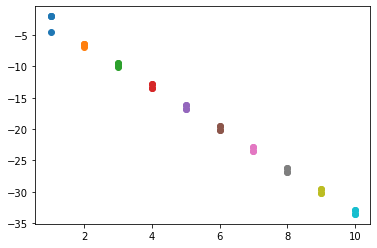

In [30]:
results = results_dict[f'PBC_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}']
for N in N_list:
    number = 4*N
    result_list = (results[N-1][0])
    print(np.array(result_list)/ number)
    plt.plot([N,N,N,N], result_list, 'o')

# X Phase

In [31]:
### Parameter Setup ###
Jx = 1.75
Jy = 0.25
Jz = 1.0
L = 20
k = 4
bc = 'periodic'

In [3]:
fDMRG_KL_low_lying(
    Jx = Jx,
    Jy = Jy,
    Jz = Jz,
    L = L,
    k = k,
    bc = bc,
)

finite DMRG, Kitaev ladder model, extracting the 4 lowest-lying states
L = 20, Jx = 1.00, Jy = 1.00, Jz = 1.00, 
Reading 'L'=20 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 40
Energy = -33.5522364579047618, S = nan, no

sweep 10, age = 40
Energy = -32.8772261259939143, S = nan, norm_err = 9.0e-08
Current memory usage 354.1 MB, time elapsed: 56.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7419e-09, max_E_trunc = 4.7086e-08
MPS bond dimensions: [2, 4, 8, 12, 19, 25, 39, 52, 77, 88, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 84, 73, 51, 37, 28, 22, 12, 8, 4, 2]
sweep 20, age = 40
Energy = -32.8772262111154348, S = nan, norm_err = 7.2e-08
Current memory usage 354.1 MB, time elapsed: 107.3 s
Delta E = -8.5122e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2317e-09, max_E_trunc = 2.6413e-08
MPS bond dimensions: [2, 4, 8, 12, 19, 30, 44, 50, 75, 89, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 86, 71, 47, 37, 25, 20, 13, 8, 4, 2]
sweep 30, age = 40
Energy = -32.8772262255073926, S = nan, norm_err = 5.4e-08
Current memory usage 354.5 MB, time elapsed: 158.3 s
Delta E = -1.439

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 60 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 2th state finished!
E = -32.8774239355443
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 75, 83, 52, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c975beb50>, <tenpy.networks.mps.MPS object at 0x7f9c98043990>, <tenpy.networks.mps.MPS object at 0x7f9c976651d0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config D

([-33.55223647534169,
  -33.55216229517616,
  -32.87742393554427,
  -32.87722627151166],
  <tenpy.networks.mps.MPS at 0x7f9cc7526cd0>])

So the function works (perhaps).
Let's try more different system sizes.

In [7]:
# The number of unit cell, 4 physical spins per cell
N_list = list(range(1, 11))
N_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [9]:
# ...
L_list = [2*N for N in N_list]
L_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [32]:
results_dict[f'PBC_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}'] = [fDMRG_KL_low_lying(Jx=Jx, Jy=Jy, Jz=Jz, L=L, k=k, bc=bc) for L in L_list]

finite DMRG, Kitaev ladder model, extracting the 4 lowest-lying states
L = 2, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 4
Energy = -4.4721359549995814, S = nan, norm

DMRG finished after 40 sweeps.
total size = 4, maximum chi = 4
The fDMRG run for 2th state finished!
E = -3.5000000000000
final bond dimensions:  [2, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<4 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8f744bd0>, <tenpy.networks.mps.MPS object at 0x7f9c8f780650>, <tenpy.networks.mps.MPS object at 0x7f9c8f749190>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config DMRG
Reading 'E_tol_to_trunc'=None for config DMRG
Reading 'N_sweeps_check'=10 for config DMRG
Reading 'min_sweeps'=15 for config DMRG
Reading 'max_sweeps'=1000 for co

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


sweep 10, age = 8
Energy = -7.8295557598225010, S = nan, norm_err = 3.1e-14
Current memory usage 531.7 MB, time elapsed: 1.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4188e-20, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 11, 8, 4, 2]
sweep 20, age = 8
Energy = -7.8295557598225072, S = nan, norm_err = 3.5e-14
Current memory usage 531.7 MB, time elapsed: 2.8 s
Delta E = -6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3925e-20, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -7.8295557598225010, S = 1.1986101384311585, norm_err = 3.9e-14
Current memory usage 531.7 MB, time elapsed: 3.6 s
Delta E = 6.2172e-16, Delta S = nan (per sweep)
max_trunc_err = 8.8588e-30, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 40, age = 8
Energy = -7.8295557598225010, S = 1.1986101384311585, norm_err = 5.

norm_tol=1.00e-05 not reached, norm_err=2.31e-01
DMRG finished after 140 sweeps.
total size = 8, maximum chi = 16
The fDMRG run for 1th state finished!
E = -7.6973248272899
final bond dimensions:  [2, 4, 8, 16, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<4 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8f75af50>, <tenpy.networks.mps.MPS object at 0x7f9c8f7b6cd0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config DMRG
Reading 'E_tol_to_trunc'=None for config DMRG
Reading 'N_sweeps_check'=10 for config DMRG
Reading 'min_sweeps'=15 for config DMRG
Reading 'max_sweeps

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -7.6973248272898980, S = nan, norm_err = 7.7e-14
Current memory usage 531.7 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2251e-20, max_E_trunc = 3.5527e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -7.6973248272898847, S = nan, norm_err = 8.1e-14
Current memory usage 531.7 MB, time elapsed: 6.1 s
Delta E = 1.3323e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2101e-20, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -7.6973248272898926, S = 1.2567969688720286, norm_err = 4.1e-03
Current memory usage 531.7 MB, time elapsed: 8.1 s
Delta E = -7.9936e-16, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -7.6973248272898962, S = 1.2567652606974560, norm_err = 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -7.6396666683274290, S = nan, norm_err = 9.0e-01
Current memory usage 531.7 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5063e-20, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -7.6396666683274175, S = nan, norm_err = 1.2e+00
Current memory usage 531.7 MB, time elapsed: 6.7 s
Delta E = 1.1546e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8956e-20, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -7.6396666683274299, S = 1.1651061051419445, norm_err = 6.1e-01
Current memory usage 531.7 MB, time elapsed: 9.0 s
Delta E = -1.2434e-15, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -7.6396666683274308, S = 1.0986097814680209, norm_err = 6

sweep 230, age = 8
Energy = -7.6396666683274193, S = 1.0250742345308217, norm_err = 1.3e+00
Current memory usage 531.7 MB, time elapsed: 55.9 s
Delta E = 8.8818e-17, Delta S = -1.3678e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 240, age = 8
Energy = -7.6396666683274166, S = 1.0879019814336028, norm_err = 4.9e-01
Current memory usage 531.7 MB, time elapsed: 58.3 s
Delta E = 2.6645e-16, Delta S = 6.2828e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 250, age = 8
Energy = -7.6396666683274308, S = 1.0814277047011107, norm_err = 1.1e+00
Current memory usage 531.7 MB, time elapsed: 60.5 s
Delta E = -1.4211e-15, Delta S = -6.4743e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.3323e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 260, age = 8
Energy = -7.6396666683274317, S = 1.0966330877546626, norm_err = 6.8e-01
Current memory us

sweep 450, age = 8
Energy = -7.6396666683274219, S = 1.0818163264624201, norm_err = 9.9e-01
Current memory usage 531.7 MB, time elapsed: 106.0 s
Delta E = 8.8818e-17, Delta S = 3.7015e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.5987e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 460, age = 8
Energy = -7.6396666683274237, S = 1.1734496740737832, norm_err = 5.9e-01
Current memory usage 531.7 MB, time elapsed: 108.3 s
Delta E = -1.7764e-16, Delta S = 9.1633e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 470, age = 8
Energy = -7.6396666683274201, S = 1.0725569834151145, norm_err = 5.6e-01
Current memory usage 531.7 MB, time elapsed: 110.6 s
Delta E = 3.5527e-16, Delta S = -1.0089e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.1546e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 480, age = 8
Energy = -7.6396666683274264, S = 0.9427810945347425, norm_err = 9.4e-01
Current memory 

sweep 670, age = 8
Energy = -7.6396666683274193, S = 1.0916909939929993, norm_err = 5.8e-01
Current memory usage 531.7 MB, time elapsed: 155.2 s
Delta E = 5.3291e-16, Delta S = 5.2214e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.6875e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 680, age = 8
Energy = -7.6396666683274193, S = 1.0346707652385743, norm_err = 9.8e-01
Current memory usage 531.7 MB, time elapsed: 157.5 s
Delta E = 0.0000e+00, Delta S = -5.7020e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.3323e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 690, age = 8
Energy = -7.6396666683274326, S = 1.1184084669203707, norm_err = 9.1e-01
Current memory usage 531.7 MB, time elapsed: 159.7 s
Delta E = -1.3323e-15, Delta S = 8.3738e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.8652e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 700, age = 8
Energy = -7.6396666683274184, S = 1.1530788992292800, norm_err = 8.2e-01
Current memory 

sweep 890, age = 8
Energy = -7.6396666683274210, S = 1.1609430708455937, norm_err = 9.0e-01
Current memory usage 531.7 MB, time elapsed: 204.4 s
Delta E = -1.7764e-16, Delta S = -2.2732e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 900, age = 8
Energy = -7.6396666683274228, S = 1.1822614129216931, norm_err = 4.6e-01
Current memory usage 531.7 MB, time elapsed: 206.6 s
Delta E = -1.7764e-16, Delta S = 2.1318e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 910, age = 8
Energy = -7.6396666683274237, S = 1.0523047376437853, norm_err = 1.3e+00
Current memory usage 531.7 MB, time elapsed: 208.9 s
Delta E = -8.8818e-17, Delta S = -1.2996e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 920, age = 8
Energy = -7.6396666683274317, S = 1.0255771473036654, norm_err = 1.2e+00
Current memo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


sweep 10, age = 12
Energy = -11.5738555647461112, S = nan, norm_err = 2.2e-12
Current memory usage 531.7 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3417e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 24, 16, 12, 8, 4, 2]
sweep 20, age = 12
Energy = -11.5738555647460988, S = nan, norm_err = 1.7e-13
Current memory usage 531.7 MB, time elapsed: 6.6 s
Delta E = 1.2434e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1819e-20, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 12, 19, 26, 22, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -11.5738555647460881, S = 1.3058138663994912, norm_err = 5.3e-14
Current memory usage 531.7 MB, time elapsed: 8.1 s
Delta E = 1.0658e-15, Delta S = nan (per sweep)
max_trunc_err = 1.8738e-30, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -11.5

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -11.4811099073388281, S = nan, norm_err = 8.6e-13
Current memory usage 531.7 MB, time elapsed: 7.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3601e-20, max_E_trunc = 1.5987e-14
MPS bond dimensions: [2, 4, 8, 14, 18, 23, 19, 12, 8, 4, 2]
sweep 20, age = 12
Energy = -11.4811099073388494, S = nan, norm_err = 4.7e-12
Current memory usage 531.7 MB, time elapsed: 12.2 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1458e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 11, 19, 25, 18, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -11.4811099073388512, S = 1.3062694222054001, norm_err = 6.8e-13
Current memory usage 531.7 MB, time elapsed: 14.7 s
Delta E = -1.7764e-16, Delta S = nan (per sweep)
max_trunc_err = 9.7039e-29, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -

sweep 140, age = 12
Energy = -11.4811099073388121, S = 1.3630494170227829, norm_err = 5.2e-01
Current memory usage 531.7 MB, time elapsed: 71.2 s
Delta E = 4.4409e-15, Delta S = -4.9861e-04 (per sweep)
max_trunc_err = 1.1071e-27, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 150, age = 12
Energy = -11.4811099073388352, S = 1.3710453053209881, norm_err = 1.9e-01
Current memory usage 531.7 MB, time elapsed: 76.7 s
Delta E = -2.3093e-15, Delta S = 7.9959e-04 (per sweep)
max_trunc_err = 3.6605e-25, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 160, age = 12
Energy = -11.4811099073388529, S = 1.3201288920258378, norm_err = 1.8e-02
Current memory usage 531.7 MB, time elapsed: 80.0 s
Delta E = -1.7764e-15, Delta S = -5.0916e-03 (per sweep)
max_trunc_err = 4.2363e-28, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 170, age = 12
Energy = -11.4811099073388352, S = 1.

sweep 350, age = 12
Energy = -11.4811099073388441, S = 1.3222702722915782, norm_err = 3.4e-03
Current memory usage 531.7 MB, time elapsed: 168.4 s
Delta E = -2.6645e-15, Delta S = -2.2105e-04 (per sweep)
max_trunc_err = 1.1917e-26, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 360, age = 12
Energy = -11.4811099073388281, S = 1.3724220380747829, norm_err = 4.7e-01
Current memory usage 531.7 MB, time elapsed: 172.6 s
Delta E = 1.5987e-15, Delta S = 5.0152e-03 (per sweep)
max_trunc_err = 4.5557e-25, max_E_trunc = 2.3093e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 370, age = 12
Energy = -11.4811099073388156, S = 1.3757234587699236, norm_err = 5.7e-02
Current memory usage 531.7 MB, time elapsed: 175.8 s
Delta E = 1.2434e-15, Delta S = 3.3014e-04 (per sweep)
max_trunc_err = 2.0364e-28, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 380, age = 12
Energy = -11.4811099073388405, S = 1

sweep 560, age = 12
Energy = -11.4811099073388192, S = 1.3476253160833247, norm_err = 8.2e-02
Current memory usage 531.7 MB, time elapsed: 266.1 s
Delta E = -8.8818e-16, Delta S = 2.7234e-03 (per sweep)
max_trunc_err = 4.3246e-25, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 570, age = 12
Energy = -11.4811099073388263, S = 1.3242422700611338, norm_err = 2.5e-01
Current memory usage 531.7 MB, time elapsed: 269.6 s
Delta E = -7.1054e-16, Delta S = -2.3383e-03 (per sweep)
max_trunc_err = 1.7441e-26, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 580, age = 12
Energy = -11.4811099073388192, S = 1.3427464305359562, norm_err = 5.2e-02
Current memory usage 531.7 MB, time elapsed: 273.6 s
Delta E = 7.1054e-16, Delta S = 1.8504e-03 (per sweep)
max_trunc_err = 5.6296e-29, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 590, age = 12
Energy = -11.4811099073388405, S = 

sweep 770, age = 12
Energy = -11.4811099073388245, S = 1.3192878831082859, norm_err = 6.8e-01
Current memory usage 531.7 MB, time elapsed: 361.3 s
Delta E = 1.9540e-15, Delta S = -4.5679e-03 (per sweep)
max_trunc_err = 1.1622e-28, max_E_trunc = 2.3093e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 780, age = 12
Energy = -11.4811099073388423, S = 1.3739295586816134, norm_err = 4.4e-01
Current memory usage 531.7 MB, time elapsed: 367.2 s
Delta E = -1.7764e-15, Delta S = 5.4642e-03 (per sweep)
max_trunc_err = 1.0625e-25, max_E_trunc = 1.9540e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 790, age = 12
Energy = -11.4811099073388423, S = 1.3557665434164263, norm_err = 3.8e-01
Current memory usage 531.7 MB, time elapsed: 370.5 s
Delta E = 0.0000e+00, Delta S = -1.8163e-03 (per sweep)
max_trunc_err = 5.7280e-29, max_E_trunc = 2.3093e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 800, age = 12
Energy = -11.4811099073388547, S = 

sweep 980, age = 12
Energy = -11.4811099073388316, S = 1.3729568070756462, norm_err = 2.1e-01
Current memory usage 531.7 MB, time elapsed: 459.2 s
Delta E = 1.0658e-15, Delta S = -1.1339e-04 (per sweep)
max_trunc_err = 2.6731e-29, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 990, age = 12
Energy = -11.4811099073388299, S = 1.3754183498450496, norm_err = 3.8e-02
Current memory usage 531.7 MB, time elapsed: 465.2 s
Delta E = 1.7764e-16, Delta S = 2.4615e-04 (per sweep)
max_trunc_err = 5.4448e-25, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
sweep 1000, age = 12
Energy = -11.4811099073388192, S = 1.3088607934041687, norm_err = 6.7e-01
Current memory usage 531.7 MB, time elapsed: 468.5 s
Delta E = 1.0658e-15, Delta S = -6.6558e-03 (per sweep)
max_trunc_err = 2.5259e-28, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 16, 16, 8, 8, 4, 2]
norm_tol=1.00e-05 not reached, norm_err=6.71e-01
DMRG f

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 16
Energy = -15.3724245309557013, S = nan, norm_err = 2.3e-09
Current memory usage 531.7 MB, time elapsed: 6.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8606e-20, max_E_trunc = 6.2172e-14
MPS bond dimensions: [2, 4, 8, 14, 24, 28, 44, 49, 36, 26, 16, 11, 8, 4, 2]
sweep 20, age = 16
Energy = -15.3724245309556977, S = nan, norm_err = 2.1e-13
Current memory usage 531.7 MB, time elapsed: 11.4 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2764e-20, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 11, 21, 26, 41, 47, 34, 24, 19, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -15.3724245309557457, S = 1.3603643227360069, norm_err = 1.6e-13
Current memory usage 531.7 MB, time elapsed: 13.7 s
Delta E = -4.7962e-15, Delta S = nan (per sweep)
max_trunc_err = 1.4568e-29, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 32, 16

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 16
Energy = -15.2996839611274869, S = nan, norm_err = 1.7e-12
Current memory usage 531.7 MB, time elapsed: 13.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8002e-20, max_E_trunc = 2.3093e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 27, 39, 43, 36, 27, 23, 13, 8, 4, 2]
sweep 20, age = 16
Energy = -15.2996839611274069, S = nan, norm_err = 9.2e-13
Current memory usage 531.7 MB, time elapsed: 20.5 s
Delta E = 7.9936e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8129e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [2, 4, 8, 12, 19, 28, 42, 47, 37, 25, 19, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -15.2996839611274424, S = 1.3570361721881021, norm_err = 1.2e-10
Current memory usage 531.7 MB, time elapsed: 24.4 s
Delta E = -3.5527e-15, Delta S = nan (per sweep)
max_trunc_err = 4.6292e-21, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 32, 1

sweep 10, age = 20
Energy = -19.1347920632510942, S = nan, norm_err = 1.1e-10
Current memory usage 531.7 MB, time elapsed: 30.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7430e-14, max_E_trunc = 5.3291e-13
MPS bond dimensions: [2, 4, 8, 16, 32, 52, 101, 124, 128, 83, 70, 47, 35, 23, 18, 11, 8, 4, 2]
sweep 20, age = 20
Energy = -19.1347920632510942, S = nan, norm_err = 1.7e-10
Current memory usage 531.7 MB, time elapsed: 43.5 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7969e-14, max_E_trunc = 2.1672e-13
MPS bond dimensions: [2, 4, 8, 16, 32, 51, 100, 127, 128, 80, 70, 46, 37, 25, 19, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -19.1347920632511084, S = 1.3861682539102782, norm_err = 9.5e-03
Current memory usage 531.7 MB, time elapsed: 49.7 s
Delta E = -1.4211e-15, Delta S = nan (per sweep)
max_trunc_err = 1.2391e-20, max_E_trunc = 7.8160e-14
MPS bond dimensio

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 20
Energy = -19.1347920632510835, S = nan, norm_err = 1.4e-09
Current memory usage 531.7 MB, time elapsed: 23.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7469e-13, max_E_trunc = 1.9078e-12
MPS bond dimensions: [2, 4, 8, 16, 32, 55, 102, 122, 128, 83, 68, 47, 37, 27, 20, 13, 8, 4, 2]
sweep 20, age = 20
Energy = -19.1347920632511155, S = nan, norm_err = 3.1e-10
Current memory usage 531.7 MB, time elapsed: 37.7 s
Delta E = -3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0147e-13, max_E_trunc = 1.2221e-12
MPS bond dimensions: [2, 4, 8, 16, 32, 55, 103, 119, 128, 86, 68, 45, 37, 26, 20, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -19.1347920632510373, S = 1.3859669132182502, norm_err = 5.8e-12
Current memory usage 531.7 MB, time elapsed: 45.1 s
Delta E = 7.8160e-15, Delta S = nan (per sweep)
max_trunc_err = 6.4810e-21, max_E_trunc = 4.2633e-14
MPS bond dimensio

DMRG finished after 40 sweeps.
total size = 24, maximum chi = 124
The fDMRG run for 0th state finished!
E = -23.0165190330659
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 64, 64, 124, 116, 124, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c96420350>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config DMRG
Reading 'E_tol_to_trunc'=None for config DMRG
Reading 'N_sweeps_check'=10 for config DMRG
Reading 'min_sweeps'=15 for config DMRG
Reading 'max_sweeps'=1000 for config DMRG
Reading '

sweep 10, age = 24
Energy = -22.9746516123571638, S = nan, norm_err = 2.4e-11
Current memory usage 531.7 MB, time elapsed: 43.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3592e-14, max_E_trunc = 7.7449e-13
MPS bond dimensions: [2, 4, 8, 16, 32, 41, 72, 87, 128, 122, 128, 102, 128, 88, 70, 45, 36, 26, 20, 13, 8, 4, 2]
sweep 20, age = 24
Energy = -22.9746516123571780, S = nan, norm_err = 2.8e-10
Current memory usage 531.7 MB, time elapsed: 65.9 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3160e-14, max_E_trunc = 2.0250e-13
MPS bond dimensions: [2, 4, 8, 16, 32, 43, 74, 88, 128, 118, 128, 106, 128, 80, 70, 46, 35, 24, 18, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 24
Energy = -22.9746514308621528, S = 1.4048578656616804, norm_err = 1.2e-03
Current memory usage 531.7 MB, time elapsed: 78.6 s
Delta E = 1.8150e-08, Delta S = nan (per sweep)
max_trunc_err = 1.2542e-19, max_E_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 28
Energy = -26.8468622650414339, S = nan, norm_err = 4.3e-08
Current memory usage 531.7 MB, time elapsed: 29.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8793e-12, max_E_trunc = 1.3348e-11
MPS bond dimensions: [2, 4, 8, 12, 19, 24, 36, 48, 74, 89, 128, 124, 128, 128, 128, 120, 128, 85, 76, 53, 36, 24, 17, 11, 8, 4, 2]
sweep 20, age = 28
Energy = -26.8468622650483582, S = nan, norm_err = 3.2e-09
Current memory usage 531.7 MB, time elapsed: 52.0 s
Delta E = -6.9242e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8574e-13, max_E_trunc = 9.7735e-12
MPS bond dimensions: [2, 4, 8, 12, 20, 28, 44, 53, 73, 84, 128, 119, 128, 128, 128, 117, 128, 85, 75, 51, 36, 26, 19, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 28
Energy = -26.8468622650610556, S = 1.4282500671890090, norm_err = 2.3e-09
Current memory usage 531.7 MB, time elapsed: 62.9 s
Delta E = -1.2697e-12, Delta S = nan (per swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 28
Energy = -26.8118842525607199, S = nan, norm_err = 1.1e-07
Current memory usage 531.7 MB, time elapsed: 27.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7143e-13, max_E_trunc = 2.2737e-12
MPS bond dimensions: [2, 4, 8, 10, 19, 24, 40, 49, 74, 82, 128, 115, 128, 128, 128, 117, 128, 79, 70, 46, 36, 24, 18, 12, 8, 4, 2]
sweep 20, age = 28
Energy = -26.8118842525623933, S = nan, norm_err = 2.5e-10
Current memory usage 531.7 MB, time elapsed: 53.3 s
Delta E = -1.6733e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3311e-13, max_E_trunc = 1.3998e-12
MPS bond dimensions: [2, 4, 8, 11, 19, 27, 38, 44, 72, 82, 127, 123, 128, 128, 128, 121, 127, 80, 71, 45, 36, 24, 18, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 28
Energy = -26.8118842525628871, S = 1.4063493806250122, norm_err = 1.9e-05
Current memory usage 531.7 MB, time elapsed: 71.1 s
Del

sweep 190, age = 28
Energy = -26.8118842525419261, S = 1.3811492823541422, norm_err = 9.5e-06
Current memory usage 531.7 MB, time elapsed: 371.0 s
Delta E = -1.1262e-13, Delta S = 1.6304e-04 (per sweep)
max_trunc_err = 5.1836e-13, max_E_trunc = 1.0548e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 124, 128, 128, 128, 128, 128, 112, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 200, age = 28
Energy = -26.8118842525470029, S = 1.3890541220494621, norm_err = 1.2e-05
Current memory usage 531.7 MB, time elapsed: 390.3 s
Delta E = -5.0768e-13, Delta S = 7.9048e-04 (per sweep)
max_trunc_err = 4.0002e-13, max_E_trunc = 8.1783e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 124, 128, 128, 128, 128, 128, 116, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 210, age = 28
Energy = -26.8118842525537744, S = 1.3987910384595539, norm_err = 2.9e-05
Current memory usage 531.7 MB, time elapsed: 409.5 s
Delta E = -6.7715e-13, Delta S = 9.7369e-04 (per sweep)
max_trunc_err = 2.3793e

sweep 30, age = 28
Energy = -26.8118842525628622, S = 1.4213457498257851, norm_err = 6.2e-08
Current memory usage 531.7 MB, time elapsed: 88.4 s
Delta E = -4.9845e-13, Delta S = nan (per sweep)
max_trunc_err = 4.9970e-14, max_E_trunc = 1.1831e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 30, 44, 64, 124, 119, 128, 128, 128, 128, 128, 104, 124, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 28
Energy = -26.8118842525628267, S = 1.4213457498270941, norm_err = 4.0e-08
Current memory usage 531.7 MB, time elapsed: 107.1 s
Delta E = 3.5527e-15, Delta S = 1.3090e-13 (per sweep)
max_trunc_err = 5.4270e-14, max_E_trunc = 1.1973e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 28, 40, 64, 124, 119, 128, 128, 128, 128, 128, 104, 124, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 28, maximum chi = 128
The fDMRG run for 3th state finished!
E = -26.8118842525628
final bond dimensions:  [2, 4, 8, 8, 16, 28, 40, 64, 124, 119, 128, 128, 128, 128, 128, 104, 124, 64, 64, 32, 3

sweep 10, age = 32
Energy = -30.6478357234164953, S = nan, norm_err = 1.4e-09
Current memory usage 540.8 MB, time elapsed: 37.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1302e-12, max_E_trunc = 6.1426e-12
MPS bond dimensions: [2, 4, 8, 13, 18, 23, 37, 70, 117, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 84, 69, 44, 36, 24, 20, 13, 8, 4, 2]
sweep 20, age = 32
Energy = -30.6478357234222472, S = nan, norm_err = 8.7e-10
Current memory usage 540.8 MB, time elapsed: 73.1 s
Delta E = -5.7518e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7194e-13, max_E_trunc = 4.4516e-12
MPS bond dimensions: [2, 4, 8, 12, 20, 28, 40, 67, 116, 115, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 127, 75, 70, 47, 34, 26, 19, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 32
Energy = -30.6478357234297505, S = 1.4168087810404519, norm_err = 3.3e-08
Current memory usage 540.8 MB, time elapsed: 94.1 s
De

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 36
Energy = -34.5126476552927386, S = nan, norm_err = 7.1e-09
Current memory usage 561.2 MB, time elapsed: 53.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4031e-11, max_E_trunc = 1.4483e-10
MPS bond dimensions: [2, 4, 8, 12, 18, 25, 43, 50, 76, 84, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 84, 77, 49, 40, 25, 20, 11, 8, 4, 2]
sweep 20, age = 36
Energy = -34.5126476553215724, S = nan, norm_err = 2.8e-09
Current memory usage 561.2 MB, time elapsed: 90.1 s
Delta E = -2.8834e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9439e-12, max_E_trunc = 5.3042e-11
MPS bond dimensions: [2, 4,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))



Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config DMRG
Reading 'E_tol_to_trunc'=None for config DMRG
Reading 'N_sweeps_check'=10 for config DMRG
Reading 'min_sweeps'=15 for config DMRG
Reading 'max_sweeps'=1000 for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'max_S_err'=1e-05 for config DMRG
Reading 'max_hours'=8760 for config DMRG
Reading 'norm_tol'=1e-05 for config DMRG
Reading 'diag_method'='default' for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 36
Energy = -34.4831396932081020, S = nan, norm_err = 3.5e-09
Current memory usage 586.5 MB, time elapsed: 46.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6943e-12, max_E_trunc = 1.7259e-11
MPS bond dimension

sweep 20, age = 40
Energy = -38.3466057485871943, S = nan, norm_err = 6.0e-09
Current memory usage 614.2 MB, time elapsed: 107.9 s
Delta E = -1.2214e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0370e-11, max_E_trunc = 5.7156e-11
MPS bond dimensions: [2, 4, 8, 12, 20, 28, 38, 49, 72, 86, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 79, 71, 46, 38, 29, 21, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 40
Energy = -38.3466057486807728, S = 1.4544127778798186, norm_err = 2.7e-08
Current memory usage 614.2 MB, time elapsed: 133.8 s
Delta E = -9.3578e-12, Delta S = nan (per sweep)
max_trunc_err = 2.1270e-12, max_E_trunc = 4.1666e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 73, 126, 118, 128, 124, 128, 124, 128, 128, 128, 128, 128, 128, 128, 124, 128, 128, 128, 122, 126, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 40
Energy = -38.3466057486784351, S = 1

sweep 40, age = 40
Energy = -38.3181083679330357, S = 1.4506404979421115, norm_err = 1.1e-09
Current memory usage 645.5 MB, time elapsed: 177.2 s
Delta E = -4.2633e-15, Delta S = -2.1658e-13 (per sweep)
max_trunc_err = 5.1159e-13, max_E_trunc = 9.6136e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 64, 116, 96, 128, 120, 128, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 118, 128, 108, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 2th state finished!
E = -38.3181083679330
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 64, 116, 96, 128, 120, 128, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 118, 128, 108, 128, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config D

sweep 130, age = 40
Energy = -38.3181046196247124, S = 1.4512981867439898, norm_err = 6.3e-02
Current memory usage 672.4 MB, time elapsed: 690.1 s
Delta E = -6.7463e-04, Delta S = 3.5355e-02 (per sweep)
max_trunc_err = 6.4954e-13, max_E_trunc = 2.0835e-09
MPS bond dimensions: [2, 4, 8, 11, 16, 32, 64, 77, 128, 124, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 112, 120, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 140, age = 40
Energy = -38.3181081354164874, S = 1.4513741677503542, norm_err = 1.4e-02
Current memory usage 672.4 MB, time elapsed: 743.0 s
Delta E = -3.5158e-07, Delta S = 7.5981e-06 (per sweep)
max_trunc_err = 6.3137e-13, max_E_trunc = 1.2044e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 64, 128, 122, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 128, 128, 128, 128, 112, 120, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 150, age = 40
Energy = -38.3181081232747616, S = 1.4515499236408451, norm_err = 2.1e-02
Current mem

sweep 290, age = 40
Energy = -38.3180475456740055, S = 1.4411634199462653, norm_err = 1.8e-01
Current memory usage 672.4 MB, time elapsed: 1509.5 s
Delta E = -2.6407e-03, Delta S = -7.6620e-04 (per sweep)
max_trunc_err = 2.1420e-12, max_E_trunc = 2.7015e-10
MPS bond dimensions: [2, 4, 8, 16, 16, 32, 64, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 115, 124, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 300, age = 40
Energy = -38.3152053652583504, S = 1.3599909022800249, norm_err = 4.3e-01
Current memory usage 672.4 MB, time elapsed: 1559.9 s
Delta E = 2.8422e-04, Delta S = -8.1173e-03 (per sweep)
max_trunc_err = 2.8724e-12, max_E_trunc = 6.7769e-10
MPS bond dimensions: [2, 4, 8, 16, 16, 32, 64, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 116, 124, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 310, age = 40
Energy = -38.3158274506692251, S = 1.3209914122117485, norm_err = 2.2e-01
Current

sweep 450, age = 40
Energy = -38.3181073840155690, S = 1.4514102545983565, norm_err = 3.0e-02
Current memory usage 672.4 MB, time elapsed: 2328.2 s
Delta E = -7.3462e-04, Delta S = 5.8435e-02 (per sweep)
max_trunc_err = 6.1479e-13, max_E_trunc = 4.3144e-11
MPS bond dimensions: [2, 4, 8, 12, 16, 32, 64, 64, 128, 124, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 128, 128, 128, 128, 111, 120, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 460, age = 40
Energy = -38.3181049258192701, S = 1.4503313335338854, norm_err = 4.6e-02
Current memory usage 672.4 MB, time elapsed: 2378.6 s
Delta E = 2.4582e-07, Delta S = -1.0789e-04 (per sweep)
max_trunc_err = 6.9094e-13, max_E_trunc = 9.1937e-11
MPS bond dimensions: [2, 4, 8, 10, 16, 32, 64, 64, 128, 122, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 114, 124, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 40
Energy = -38.3181082172732133, S = 1.4514302405515076, norm_err = 1.3e-02
Current 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 480 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 3th state finished!
E = -38.3181081125296
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 64, 128, 120, 128, 128, 128, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 108, 120, 64, 64, 32, 32, 16, 16, 8, 8, 4, 2]


[-1.11803399 -0.90138782 -0.875      -0.875     ]
[-0.97869447 -0.9621656  -0.9621656  -0.95495833]
[-0.96448796 -0.95675916 -0.95675916 -0.95675916]
[-0.96077653 -0.95623025 -0.95623025 -0.95623025]
[-0.95951169 -0.9567396  -0.9567396  -0.9567396 ]
[-0.95902163 -0.95727715 -0.95727715 -0.95727715]
[-0.95881651 -0.95756729 -0.95756729 -0.95756729]
[-0.95872607 -0.95774487 -0.95774487 -0.95774486]
[-0.95868466 -0.95786499 -0.95786499 -0.95786499]
[-0.95866514 -0.95795271 -0.95795271 -0.9579527 ]


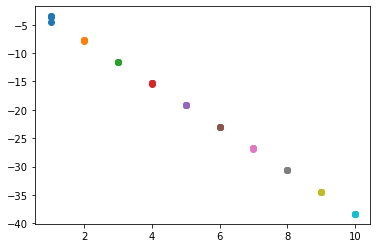

In [33]:
results = results_dict[f'PBC_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}']
for N in N_list:
    number = 4*N
    result_list = (results[N-1][0])
    print(np.array(result_list)/ number)
    plt.plot([N,N,N,N], result_list, 'o')

[0.         0.86658468 0.97213595 0.97213595]
[0.         0.13223093 0.13223093 0.18988909]
[0.         0.09274566 0.09274566 0.09274566]
[0.         0.07274057 0.07274057 0.07274057]
[0.         0.05544177 0.05544177 0.05544177]
[0.         0.04186742 0.04186742 0.04186742]
[0.         0.03497801 0.03497801 0.03497801]
[0.         0.03139846 0.03139846 0.03139853]
[0.         0.02950796 0.02950796 0.02950796]
[0.         0.02849738 0.02849738 0.02849764]


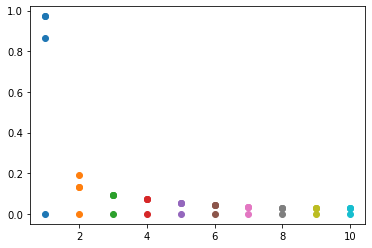

In [37]:
results = results_dict[f'PBC_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}']
for N in N_list:
    number = 4*N
    result_array = np.array(results[N-1][0])
    relative_energies = result_array - np.min(result_array)
    print(relative_energies)
    plt.plot([N,N,N,N], relative_energies, 'o')

# X Phase, OBC

In [6]:
### Parameter Setup ###
Jx = 1.75
Jy = 0.25
Jz = 1.0
L = 20
k = 10
bc = 'open'
bc_str = 'OBC'

So the function works (perhaps).
Let's try more different system sizes.

In [48]:
# The number of unit cell, 4 physical spins per cell
N_list = list(range(1, 21))
N_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [49]:
# ...
L_list = [2*N for N in N_list]
L_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

In [50]:
results_dict[f'{bc_str}_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}'] = [fDMRG_KL_low_lying(Jx=Jx, Jy=Jy, Jz=Jz, L=L, k=k, bc=bc) for L in L_list]

finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 2, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 4
Energy = -2.8284271247461907, S = nan, norm_er

DMRG finished after 40 sweeps.
total size = 4, maximum chi = 4
The fDMRG run for 2th state finished!
E = -2.5000000000000
final bond dimensions:  [2, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<4 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8e63d9d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e6eabd0>, <tenpy.networks.mps.MPS object at 0x7f9c8f4fc3d0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config DMRG
Reading 'E_tol_to_trunc'=None for config DMRG
Reading 'N_sweeps_check'=10 for config DMRG
Reading 'min_sweeps'=15 for config DMRG
Reading 'max_sweeps'=1000 for co

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 4
Energy = -2.0000000000000009, S = 0.9241962407465939, norm_err = 5.6e-16
Current memory usage 672.4 MB, time elapsed: 2.0 s
Delta E = -2.4425e-16, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 4.4409e-16
MPS bond dimensions: [2, 4, 2]
sweep 40, age = 4
Energy = -1.9999999999999982, S = 0.9241962407465939, norm_err = 2.6e-15
Current memory usage 672.4 MB, time elapsed: 2.6 s
Delta E = 2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -4.4409e-16
MPS bond dimensions: [2, 4, 2]
DMRG finished after 40 sweeps.
total size = 4, maximum chi = 4
The fDMRG run for 5th state finished!
E = -2.0000000000000
final bond dimensions:  [2, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<4 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'tru

sweep 10, age = 4
Energy = -0.0000000000000009, S = nan, norm_err = 1.9e+00
Current memory usage 672.4 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.9145e+00
MPS bond dimensions: [2, 4, 2]
sweep 20, age = 4
Energy = -0.0000000000000004, S = nan, norm_err = 6.9e-01
Current memory usage 672.4 MB, time elapsed: 2.0 s
Delta E = 5.5734e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.9419e+00
MPS bond dimensions: [2, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 4
Energy = -0.0000000000000010, S = 0.6332051368173401, norm_err = 5.5e-01
Current memory usage 672.4 MB, time elapsed: 2.8 s
Delta E = -6.2030e-17, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8223e+00
MPS bond dimensions: [2, 4, 2]
sweep 40, age = 4
Energy = -0.0000000000000007, S = 0.2422586165954984, norm_err = 2.0e-01
Current memory usage 672.4 MB

sweep 240, age = 4
Energy = -0.0000000000000011, S = 0.3300291422972411, norm_err = 6.1e-01
Current memory usage 672.4 MB, time elapsed: 20.6 s
Delta E = -5.1601e-17, Delta S = -9.4199e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -2.0604e+00
MPS bond dimensions: [2, 4, 2]
sweep 250, age = 4
Energy = -0.0000000000000006, S = 0.3772611860469022, norm_err = 1.1e+00
Current memory usage 672.4 MB, time elapsed: 21.4 s
Delta E = 5.4056e-17, Delta S = 4.7232e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -2.1305e+00
MPS bond dimensions: [2, 4, 2]
sweep 260, age = 4
Energy = -0.0000000000000010, S = 0.4537771578632244, norm_err = 3.4e-01
Current memory usage 672.4 MB, time elapsed: 22.3 s
Delta E = -4.5337e-17, Delta S = 7.6516e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7620e+00
MPS bond dimensions: [2, 4, 2]
sweep 270, age = 4
Energy = -0.0000000000000006, S = 0.4968101582559645, norm_err = 1.0e+00
Current memory usage 672.4 MB, time elapsed: 23.1 s
D

sweep 470, age = 4
Energy = -0.0000000000000005, S = 0.4823626235333672, norm_err = 1.2e+00
Current memory usage 672.4 MB, time elapsed: 40.0 s
Delta E = 2.1784e-16, Delta S = -9.1813e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -2.0428e+00
MPS bond dimensions: [2, 4, 2]
sweep 480, age = 4
Energy = -0.0000000000000007, S = 0.5480628000856034, norm_err = 7.0e-01
Current memory usage 672.4 MB, time elapsed: 40.9 s
Delta E = -1.3138e-17, Delta S = 6.5700e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8622e+00
MPS bond dimensions: [2, 4, 2]
sweep 490, age = 4
Energy = -0.0000000000000012, S = 0.2538417602495659, norm_err = 5.1e-01
Current memory usage 672.4 MB, time elapsed: 41.7 s
Delta E = -5.8235e-17, Delta S = -2.9422e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7198e+00
MPS bond dimensions: [2, 4, 2]
sweep 500, age = 4
Energy = -0.0000000000000013, S = 0.5351776575976183, norm_err = 6.6e-01
Current memory usage 672.4 MB, time elapsed: 42.6 s


sweep 700, age = 4
Energy = -0.0000000000000007, S = 0.2854219945111094, norm_err = 1.3e+00
Current memory usage 672.4 MB, time elapsed: 59.5 s
Delta E = 1.2967e-17, Delta S = -6.0359e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8026e+00
MPS bond dimensions: [2, 4, 2]
sweep 710, age = 4
Energy = -0.0000000000000007, S = 0.3524037229470756, norm_err = 1.0e+00
Current memory usage 672.4 MB, time elapsed: 60.3 s
Delta E = -1.2753e-18, Delta S = 6.6982e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7525e+00
MPS bond dimensions: [2, 4, 2]
sweep 720, age = 4
Energy = -0.0000000000000017, S = 0.3638882076474816, norm_err = 1.9e-01
Current memory usage 672.4 MB, time elapsed: 61.2 s
Delta E = -9.9801e-17, Delta S = 1.1484e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7554e+00
MPS bond dimensions: [2, 4, 2]
sweep 730, age = 4
Energy = -0.0000000000000005, S = 0.4307583743316741, norm_err = 2.5e-01
Current memory usage 672.4 MB, time elapsed: 62.0 s
D

sweep 930, age = 4
Energy = -0.0000000000000016, S = 0.3361055049738793, norm_err = 3.0e-01
Current memory usage 672.4 MB, time elapsed: 79.0 s
Delta E = -6.6571e-17, Delta S = -1.2850e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7847e+00
MPS bond dimensions: [2, 4, 2]
sweep 940, age = 4
Energy = -0.0000000000000013, S = 0.2207567879555767, norm_err = 1.2e+00
Current memory usage 672.4 MB, time elapsed: 79.8 s
Delta E = 2.2508e-17, Delta S = -1.1535e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8723e+00
MPS bond dimensions: [2, 4, 2]
sweep 950, age = 4
Energy = -0.0000000000000004, S = 0.4439809437226883, norm_err = 1.2e+00
Current memory usage 672.4 MB, time elapsed: 80.7 s
Delta E = 9.6841e-17, Delta S = 2.2322e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7561e+00
MPS bond dimensions: [2, 4, 2]
sweep 960, age = 4
Energy = -0.0000000000000002, S = 0.3511281517046663, norm_err = 1.8e+00
Current memory usage 672.4 MB, time elapsed: 81.5 s
D

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 4
Energy = -0.0000000000000018, S = nan, norm_err = 1.8e+00
Current memory usage 672.4 MB, time elapsed: 1.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5542e-21, max_E_trunc = -2.0556e+00
MPS bond dimensions: [2, 4, 2]
sweep 20, age = 4
Energy = -0.0000000000000014, S = nan, norm_err = 1.1e+00
Current memory usage 672.4 MB, time elapsed: 2.2 s
Delta E = 4.7581e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7833e+00
MPS bond dimensions: [2, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 4
Energy = -0.0000000000000005, S = 0.4149212141491463, norm_err = 3.1e-01
Current memory usage 672.4 MB, time elapsed: 3.1 s
Delta E = 8.1617e-17, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8355e+00
MPS bond dimensions: [2, 4, 2]
sweep 40, age = 4
Energy = -0.0000000000000006, S = 0.5391733232643124, norm_err = 9.6e-01
Current memory usage 672.4 MB,

sweep 240, age = 4
Energy = -0.0000000000000010, S = 0.5873158774828396, norm_err = 1.1e+00
Current memory usage 672.4 MB, time elapsed: 22.5 s
Delta E = -8.1130e-17, Delta S = 1.5513e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8822e+00
MPS bond dimensions: [2, 4, 2]
sweep 250, age = 4
Energy = -0.0000000000000005, S = 0.3794405776477192, norm_err = 4.1e-01
Current memory usage 672.4 MB, time elapsed: 23.5 s
Delta E = 4.8849e-17, Delta S = -2.0788e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8556e+00
MPS bond dimensions: [2, 4, 2]
sweep 260, age = 4
Energy = -0.0000000000000005, S = 0.3202434584855195, norm_err = 8.3e-01
Current memory usage 672.4 MB, time elapsed: 24.4 s
Delta E = 8.0357e-18, Delta S = -5.9197e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7645e+00
MPS bond dimensions: [2, 4, 2]
sweep 270, age = 4
Energy = -0.0000000000000022, S = 0.3659057325169592, norm_err = 6.3e-01
Current memory usage 672.4 MB, time elapsed: 25.3 s
D

sweep 470, age = 4
Energy = -0.0000000000000014, S = 0.2571733864143249, norm_err = 1.0e+00
Current memory usage 672.4 MB, time elapsed: 43.7 s
Delta E = -8.8070e-17, Delta S = -4.2560e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8592e+00
MPS bond dimensions: [2, 4, 2]
sweep 480, age = 4
Energy = -0.0000000000000008, S = 0.3942221205852278, norm_err = 1.1e+00
Current memory usage 672.4 MB, time elapsed: 44.6 s
Delta E = 6.6810e-17, Delta S = 1.3705e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7508e+00
MPS bond dimensions: [2, 4, 2]
sweep 490, age = 4
Energy = -0.0000000000000010, S = 0.4064538829343027, norm_err = 1.1e+00
Current memory usage 672.4 MB, time elapsed: 45.6 s
Delta E = -1.9313e-17, Delta S = 1.2232e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7964e+00
MPS bond dimensions: [2, 4, 2]
sweep 500, age = 4
Energy = -0.0000000000000005, S = 0.3372875575621188, norm_err = 1.4e+00
Current memory usage 672.4 MB, time elapsed: 46.5 s
D

sweep 700, age = 4
Energy = -0.0000000000000005, S = 0.6846643391012037, norm_err = 4.5e-01
Current memory usage 672.4 MB, time elapsed: 64.9 s
Delta E = 8.5286e-17, Delta S = 3.1475e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.9152e+00
MPS bond dimensions: [2, 4, 2]
sweep 710, age = 4
Energy = -0.0000000000000009, S = 0.4089467525070019, norm_err = 5.9e-01
Current memory usage 672.4 MB, time elapsed: 65.8 s
Delta E = -3.7161e-17, Delta S = -2.7572e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.7880e+00
MPS bond dimensions: [2, 4, 2]
sweep 720, age = 4
Energy = -0.0000000000000010, S = 0.5022107221724571, norm_err = 1.2e+00
Current memory usage 672.4 MB, time elapsed: 66.8 s
Delta E = -1.0907e-17, Delta S = 9.3264e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.8849e+00
MPS bond dimensions: [2, 4, 2]
sweep 730, age = 4
Energy = -0.0000000000000008, S = 0.4980191471702700, norm_err = 4.8e-01
Current memory usage 672.4 MB, time elapsed: 67.7 s
D

sweep 930, age = 4
Energy = -0.0000000000000005, S = 0.5745431116038849, norm_err = 9.2e-01
Current memory usage 672.4 MB, time elapsed: 86.3 s
Delta E = 4.6731e-18, Delta S = 6.6387e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -2.3632e+00
MPS bond dimensions: [2, 4, 2]
sweep 940, age = 4
Energy = -0.0000000000000014, S = 0.3510782835944433, norm_err = 6.3e-01
Current memory usage 672.4 MB, time elapsed: 87.2 s
Delta E = -8.7675e-17, Delta S = -2.2346e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -1.9007e+00
MPS bond dimensions: [2, 4, 2]
sweep 950, age = 4
Energy = -0.0000000000000002, S = 0.5712411515005816, norm_err = 1.1e+00
Current memory usage 672.4 MB, time elapsed: 88.1 s
Delta E = 1.1659e-16, Delta S = 2.2016e-02 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = -2.1931e+00
MPS bond dimensions: [2, 4, 2]
sweep 960, age = 4
Energy = -0.0000000000000003, S = 0.3786614307309805, norm_err = 8.9e-01
Current memory usage 672.4 MB, time elapsed: 89.1 s
De

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


sweep 10, age = 8
Energy = -6.5044056134844430, S = nan, norm_err = 5.5e-14
Current memory usage 672.4 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5278e-21, max_E_trunc = 9.7700e-15
MPS bond dimensions: [2, 4, 8, 11, 8, 4, 2]
sweep 20, age = 8
Energy = -6.5044056134844528, S = nan, norm_err = 1.0e-13
Current memory usage 672.4 MB, time elapsed: 3.4 s
Delta E = -9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0620e-21, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.5044056134844430, S = 1.0968407320334799, norm_err = 5.8e-14
Current memory usage 672.4 MB, time elapsed: 4.4 s
Delta E = 9.7700e-16, Delta S = nan (per sweep)
max_trunc_err = 2.5220e-29, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 40, age = 8
Energy = -6.5044056134844412, S = 1.0968407320334799, norm_err = 8.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.3877657849732925, S = nan, norm_err = 6.8e-14
Current memory usage 672.4 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0356e-21, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 12, 8, 4, 2]
sweep 20, age = 8
Energy = -6.3877657849732916, S = nan, norm_err = 4.8e-14
Current memory usage 672.4 MB, time elapsed: 5.9 s
Delta E = 8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0421e-20, max_E_trunc = 9.7700e-15
MPS bond dimensions: [2, 4, 8, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.3877657849732969, S = 1.1103821339942053, norm_err = 7.6e-03
Current memory usage 672.4 MB, time elapsed: 7.9 s
Delta E = -5.3291e-16, Delta S = nan (per sweep)
max_trunc_err = 4.0288e-28, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 40, age = 8
Energy = -6.3877657849732996, S = 1.1103764034400574, norm_err = 9.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.3268788639545468, S = nan, norm_err = 1.9e-01
Current memory usage 672.4 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0968e-21, max_E_trunc = 1.5987e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -6.3268788639545512, S = nan, norm_err = 4.4e-01
Current memory usage 672.4 MB, time elapsed: 7.0 s
Delta E = -4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.2034e-21, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.3268788639545397, S = 1.1708993696093084, norm_err = 6.4e-01
Current memory usage 672.4 MB, time elapsed: 9.6 s
Delta E = 1.1546e-15, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -6.3268788639545432, S = 1.1325075451830300, norm_err = 2

sweep 230, age = 8
Energy = -6.3268788639545521, S = 1.2107242768416355, norm_err = 8.0e-02
Current memory usage 672.4 MB, time elapsed: 63.0 s
Delta E = -1.7764e-16, Delta S = 4.2510e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 240, age = 8
Energy = -6.3268788639545583, S = 1.1554028729627277, norm_err = 1.9e-01
Current memory usage 672.4 MB, time elapsed: 65.6 s
Delta E = -6.2172e-16, Delta S = -5.5321e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 250, age = 8
Energy = -6.3268788639545495, S = 1.1988592551926307, norm_err = 4.5e-02
Current memory usage 672.4 MB, time elapsed: 68.3 s
Delta E = 8.8818e-16, Delta S = 4.3456e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 260, age = 8
Energy = -6.3268788639545521, S = 1.1241088228554643, norm_err = 7.9e-01
Current memory us

sweep 450, age = 8
Energy = -6.3268788639545432, S = 1.1692836160975737, norm_err = 9.0e-02
Current memory usage 672.4 MB, time elapsed: 120.3 s
Delta E = 7.1054e-16, Delta S = -6.5254e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 460, age = 8
Energy = -6.3268788639545539, S = 1.1745564328728613, norm_err = 6.8e-02
Current memory usage 672.4 MB, time elapsed: 122.9 s
Delta E = -1.0658e-15, Delta S = 5.2728e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 470, age = 8
Energy = -6.3268788639545583, S = 1.2172020482767845, norm_err = 3.4e-01
Current memory usage 672.4 MB, time elapsed: 125.5 s
Delta E = -4.4409e-16, Delta S = 4.2646e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 9.7700e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 480, age = 8
Energy = -6.3268788639545512, S = 1.2011808997197426, norm_err = 8.0e-02
Current memory

sweep 670, age = 8
Energy = -6.3268788639545459, S = 1.2089634333874446, norm_err = 3.6e-01
Current memory usage 672.4 MB, time elapsed: 176.6 s
Delta E = 1.0658e-15, Delta S = 6.5342e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.1546e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 680, age = 8
Energy = -6.3268788639545548, S = 1.2110098641082760, norm_err = 3.6e-01
Current memory usage 672.4 MB, time elapsed: 179.2 s
Delta E = -8.8818e-16, Delta S = 2.0464e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 690, age = 8
Energy = -6.3268788639545530, S = 1.2102285538613060, norm_err = 5.9e-03
Current memory usage 672.4 MB, time elapsed: 181.7 s
Delta E = 1.7764e-16, Delta S = -7.8131e-05 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 700, age = 8
Energy = -6.3268788639545486, S = 1.2154941385060636, norm_err = 1.2e-01
Current memory 

sweep 890, age = 8
Energy = -6.3268788639545566, S = 1.2117366854517413, norm_err = 3.7e-01
Current memory usage 672.4 MB, time elapsed: 232.6 s
Delta E = -7.1054e-16, Delta S = 6.7746e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 900, age = 8
Energy = -6.3268788639545495, S = 1.1578210461099270, norm_err = 3.9e-01
Current memory usage 672.4 MB, time elapsed: 235.2 s
Delta E = 7.1054e-16, Delta S = -5.3916e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 910, age = 8
Energy = -6.3268788639545548, S = 1.2148966989622518, norm_err = 2.7e-01
Current memory usage 672.4 MB, time elapsed: 237.7 s
Delta E = -5.3291e-16, Delta S = 5.7076e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 920, age = 8
Energy = -6.3268788639545530, S = 1.2101228731568063, norm_err = 4.8e-01
Current memory

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.3268788639545503, S = nan, norm_err = 2.6e-01
Current memory usage 672.4 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9416e-21, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -6.3268788639545503, S = nan, norm_err = 3.5e-01
Current memory usage 672.4 MB, time elapsed: 7.5 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0740e-21, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.3268788639545583, S = 1.1408189102934918, norm_err = 3.7e-01
Current memory usage 672.4 MB, time elapsed: 10.4 s
Delta E = -7.9936e-16, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -6.3268788639545575, S = 1.2120184375495886, norm_err = 

sweep 230, age = 8
Energy = -6.3268788639545557, S = 1.1680982807588138, norm_err = 2.4e-01
Current memory usage 672.4 MB, time elapsed: 68.0 s
Delta E = 2.6645e-16, Delta S = -5.0340e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.1546e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 240, age = 8
Energy = -6.3268788639545539, S = 1.1937305849570661, norm_err = 4.9e-02
Current memory usage 672.4 MB, time elapsed: 70.9 s
Delta E = 1.7764e-16, Delta S = 2.5632e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.1546e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 250, age = 8
Energy = -6.3268788639545539, S = 1.1969334814758346, norm_err = 1.9e-01
Current memory usage 672.4 MB, time elapsed: 73.8 s
Delta E = 0.0000e+00, Delta S = 3.2029e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.1546e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 260, age = 8
Energy = -6.3268788639545628, S = 1.1364499316422372, norm_err = 7.5e-01
Current memory usag

sweep 450, age = 8
Energy = -6.3268788639545397, S = 1.2061553998620675, norm_err = 1.5e-01
Current memory usage 672.4 MB, time elapsed: 131.7 s
Delta E = 1.5099e-15, Delta S = -7.3150e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 460, age = 8
Energy = -6.3268788639545477, S = 1.2189995435799930, norm_err = 2.2e-01
Current memory usage 672.4 MB, time elapsed: 134.7 s
Delta E = -7.9936e-16, Delta S = 1.2844e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 470, age = 8
Energy = -6.3268788639545503, S = 1.2007024350516300, norm_err = 2.9e-01
Current memory usage 672.4 MB, time elapsed: 137.7 s
Delta E = -2.6645e-16, Delta S = -1.8297e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.5099e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 480, age = 8
Energy = -6.3268788639545521, S = 1.2124066454240843, norm_err = 2.0e-01
Current memor

sweep 670, age = 8
Energy = -6.3268788639545566, S = 1.2127911226628538, norm_err = 9.3e-02
Current memory usage 672.4 MB, time elapsed: 196.1 s
Delta E = 2.6645e-16, Delta S = 3.1802e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.1054e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 680, age = 8
Energy = -6.3268788639545495, S = 1.2115187896173241, norm_err = 3.0e-02
Current memory usage 672.4 MB, time elapsed: 199.0 s
Delta E = 7.1054e-16, Delta S = -1.2723e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 690, age = 8
Energy = -6.3268788639545468, S = 1.2142880229970563, norm_err = 2.8e-02
Current memory usage 672.4 MB, time elapsed: 201.9 s
Delta E = 2.6645e-16, Delta S = 2.7692e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.5099e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 700, age = 8
Energy = -6.3268788639545477, S = 1.2025799284985985, norm_err = 1.4e-01
Current memory u

sweep 890, age = 8
Energy = -6.3268788639545468, S = 1.2135956789949989, norm_err = 3.4e-01
Current memory usage 672.4 MB, time elapsed: 260.3 s
Delta E = -1.7764e-16, Delta S = 6.3293e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 900, age = 8
Energy = -6.3268788639545503, S = 1.1658811775865232, norm_err = 1.7e-01
Current memory usage 672.4 MB, time elapsed: 263.2 s
Delta E = -3.5527e-16, Delta S = -4.7715e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.1546e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 910, age = 8
Energy = -6.3268788639545477, S = 1.2113889070370789, norm_err = 2.9e-01
Current memory usage 672.4 MB, time elapsed: 266.1 s
Delta E = 2.6645e-16, Delta S = 4.5508e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 9.7700e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 920, age = 8
Energy = -6.3268788639545566, S = 1.2122710980976137, norm_err = 2.4e-01
Current memory

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.3268788639545548, S = nan, norm_err = 4.6e-01
Current memory usage 672.4 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1036e-21, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -6.3268788639545468, S = nan, norm_err = 6.0e-02
Current memory usage 672.4 MB, time elapsed: 8.4 s
Delta E = 7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7830e-21, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.3268788639545486, S = 1.1487043753401598, norm_err = 1.1e-01
Current memory usage 672.4 MB, time elapsed: 11.7 s
Delta E = -1.7764e-16, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.5987e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -6.3268788639545459, S = 1.1465549285838745, norm_err = 

sweep 230, age = 8
Energy = -6.3268788639545512, S = 1.1547451058601741, norm_err = 5.9e-01
Current memory usage 672.4 MB, time elapsed: 76.5 s
Delta E = -3.5527e-16, Delta S = -6.2948e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 240, age = 8
Energy = -6.3268788639545335, S = 1.2103580855888543, norm_err = 4.9e-01
Current memory usage 672.4 MB, time elapsed: 79.8 s
Delta E = 1.7764e-15, Delta S = 5.5613e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 250, age = 8
Energy = -6.3268788639545468, S = 1.1642722363948061, norm_err = 5.6e-02
Current memory usage 672.4 MB, time elapsed: 83.0 s
Delta E = -1.3323e-15, Delta S = -4.6086e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 7.9936e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 260, age = 8
Energy = -6.3268788639545512, S = 1.1500216286719687, norm_err = 6.0e-01
Current memory u

sweep 450, age = 8
Energy = -6.3268788639545592, S = 1.2119995064433833, norm_err = 2.6e-01
Current memory usage 672.4 MB, time elapsed: 148.4 s
Delta E = -1.7764e-15, Delta S = -3.7071e-05 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 3.5527e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 460, age = 8
Energy = -6.3268788639545539, S = 1.2022082152860212, norm_err = 3.8e-01
Current memory usage 672.4 MB, time elapsed: 151.7 s
Delta E = 5.3291e-16, Delta S = -9.7913e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 470, age = 8
Energy = -6.3268788639545459, S = 1.1899933166466956, norm_err = 7.3e-03
Current memory usage 672.4 MB, time elapsed: 155.0 s
Delta E = 7.9936e-16, Delta S = -1.2215e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 480, age = 8
Energy = -6.3268788639545432, S = 1.1632392807251861, norm_err = 7.4e-02
Current memor

sweep 670, age = 8
Energy = -6.3268788639545495, S = 1.2183153583283448, norm_err = 3.3e-01
Current memory usage 672.4 MB, time elapsed: 220.5 s
Delta E = 1.6875e-15, Delta S = 2.8262e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 680, age = 8
Energy = -6.3268788639545450, S = 1.1945914126049770, norm_err = 5.2e-01
Current memory usage 672.4 MB, time elapsed: 223.7 s
Delta E = 4.4409e-16, Delta S = -2.3724e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 9.7700e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 690, age = 8
Energy = -6.3268788639545583, S = 1.1373751741933638, norm_err = 3.8e-01
Current memory usage 672.4 MB, time elapsed: 227.0 s
Delta E = -1.3323e-15, Delta S = -5.7216e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.1546e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 700, age = 8
Energy = -6.3268788639545539, S = 1.1285620189275425, norm_err = 6.4e-01
Current memory

sweep 890, age = 8
Energy = -6.3268788639545468, S = 1.1896654136377263, norm_err = 4.8e-01
Current memory usage 672.4 MB, time elapsed: 292.6 s
Delta E = 8.8818e-17, Delta S = 2.6645e-04 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 900, age = 8
Energy = -6.3268788639545503, S = 1.1772530943158246, norm_err = 5.0e-02
Current memory usage 672.4 MB, time elapsed: 295.8 s
Delta E = -3.5527e-16, Delta S = -1.2412e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 4.4409e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 910, age = 8
Energy = -6.3268788639545530, S = 1.2123274303405231, norm_err = 2.7e-01
Current memory usage 672.4 MB, time elapsed: 299.1 s
Delta E = -2.6645e-16, Delta S = 3.5074e-03 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 920, age = 8
Energy = -6.3268788639545566, S = 1.2030568702678901, norm_err = 3.4e-01
Current memory

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.3268788639545521, S = nan, norm_err = 3.5e-14
Current memory usage 672.4 MB, time elapsed: 4.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4479e-21, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 20, age = 8
Energy = -6.3268788639545521, S = nan, norm_err = 2.7e-14
Current memory usage 672.4 MB, time elapsed: 9.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6296e-21, max_E_trunc = 1.7764e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.3268788639545521, S = 1.1560801889489754, norm_err = 1.3e-02
Current memory usage 672.4 MB, time elapsed: 12.6 s
Delta E = 0.0000e+00, Delta S = nan (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 2.6645e-15
MPS bond dimensions: [2, 4, 8, 16, 8, 4, 2]
sweep 40, age = 8
Energy = -6.3268788639545530, S = 1.1561050522113414, norm_err = 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.2088327159508534, S = nan, norm_err = 4.4e-11
Current memory usage 672.4 MB, time elapsed: 4.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8206e-21, max_E_trunc = 6.2172e-15
MPS bond dimensions: [2, 4, 8, 12, 8, 4, 2]
sweep 20, age = 8
Energy = -6.2088327159508632, S = nan, norm_err = 3.4e-13
Current memory usage 672.4 MB, time elapsed: 9.4 s
Delta E = -9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0651e-21, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2, 4, 8, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.2088327109551997, S = 1.1435614006415002, norm_err = 1.6e-03
Current memory usage 672.4 MB, time elapsed: 13.0 s
Delta E = 4.9957e-10, Delta S = nan (per sweep)
max_trunc_err = 3.6338e-29, max_E_trunc = 5.9517e-12
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 40, age = 8
Energy = -6.2088326830710923, S = 1.1435633505044278, norm_err = 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 8
Energy = -6.2088327159508543, S = nan, norm_err = 2.1e-13
Current memory usage 672.4 MB, time elapsed: 5.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4493e-21, max_E_trunc = 1.8652e-14
MPS bond dimensions: [2, 4, 8, 12, 8, 4, 2]
sweep 20, age = 8
Energy = -6.2088327159508472, S = nan, norm_err = 1.9e-11
Current memory usage 672.4 MB, time elapsed: 10.1 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3525e-20, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 8
Energy = -6.2088326983907196, S = 1.1435526150091031, norm_err = 8.6e-03
Current memory usage 672.4 MB, time elapsed: 14.1 s
Delta E = 1.7560e-09, Delta S = nan (per sweep)
max_trunc_err = 1.3995e-28, max_E_trunc = 3.3158e-11
MPS bond dimensions: [2, 4, 8, 8, 8, 4, 2]
sweep 40, age = 8
Energy = -6.2088320514345536, S = 1.1435504143549229, norm_err = 9

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


sweep 10, age = 12
Energy = -10.2556264936824313, S = nan, norm_err = 1.1e-11
Current memory usage 672.4 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2568e-20, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 24, 19, 11, 8, 4, 2]
sweep 20, age = 12
Energy = -10.2556264936824046, S = nan, norm_err = 7.5e-13
Current memory usage 672.4 MB, time elapsed: 5.7 s
Delta E = 2.6645e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8255e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [2, 4, 8, 14, 19, 23, 18, 14, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.2556264936824100, S = 1.1965894599898059, norm_err = 9.1e-14
Current memory usage 672.4 MB, time elapsed: 7.1 s
Delta E = -5.3291e-16, Delta S = nan (per sweep)
max_trunc_err = 3.6154e-31, max_E_trunc = 5.3291e-15
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -10.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -10.1674227847832590, S = nan, norm_err = 1.6e-13
Current memory usage 672.4 MB, time elapsed: 5.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4348e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [2, 4, 8, 14, 18, 25, 17, 11, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1674227847832714, S = nan, norm_err = 1.4e-12
Current memory usage 672.4 MB, time elapsed: 10.0 s
Delta E = -1.2434e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1377e-20, max_E_trunc = 8.8818e-15
MPS bond dimensions: [2, 4, 8, 13, 19, 24, 21, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1674227847832945, S = 1.2103992398684096, norm_err = 1.5e-04
Current memory usage 672.4 MB, time elapsed: 14.6 s
Delta E = -2.3093e-15, Delta S = nan (per sweep)
max_trunc_err = 2.3569e-29, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -10.1169509996432101, S = nan, norm_err = 1.5e-12
Current memory usage 672.4 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9280e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 10, 20, 22, 17, 11, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1169509996432065, S = nan, norm_err = 2.0e-13
Current memory usage 672.4 MB, time elapsed: 14.0 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6166e-20, max_E_trunc = 3.3751e-14
MPS bond dimensions: [2, 4, 8, 13, 21, 24, 18, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1169509870576917, S = 1.2211620848837157, norm_err = 9.2e-03
Current memory usage 672.4 MB, time elapsed: 20.1 s
Delta E = 1.2586e-09, Delta S = nan (per sweep)
max_trunc_err = 7.7348e-29, max_E_trunc = 1.6392e-10
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -10

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -10.1674227847832910, S = nan, norm_err = 1.0e-11
Current memory usage 672.4 MB, time elapsed: 10.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4821e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [2, 4, 8, 11, 22, 24, 19, 12, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1674227847832928, S = nan, norm_err = 2.5e-12
Current memory usage 672.4 MB, time elapsed: 15.8 s
Delta E = -1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8025e-20, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 11, 19, 23, 17, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1674227847832643, S = 1.2103992416993763, norm_err = 2.7e-08
Current memory usage 672.4 MB, time elapsed: 21.1 s
Delta E = 2.8422e-15, Delta S = nan (per sweep)
max_trunc_err = 1.7136e-25, max_E_trunc = 1.9540e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -10.1169509996431835, S = nan, norm_err = 2.6e-13
Current memory usage 672.4 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3732e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 11, 21, 24, 18, 13, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1169509996431923, S = nan, norm_err = 1.3e-13
Current memory usage 672.4 MB, time elapsed: 15.3 s
Delta E = -8.8818e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7232e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 11, 18, 24, 18, 10, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1169509990386270, S = 1.2211350165193509, norm_err = 2.1e-03
Current memory usage 672.4 MB, time elapsed: 22.6 s
Delta E = 6.0457e-11, Delta S = nan (per sweep)
max_trunc_err = 2.7381e-28, max_E_trunc = 9.0807e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -10.1674227847832643, S = nan, norm_err = 3.2e-13
Current memory usage 672.4 MB, time elapsed: 11.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3023e-20, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 12, 20, 22, 17, 13, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1674227847832856, S = nan, norm_err = 1.5e-13
Current memory usage 672.4 MB, time elapsed: 18.0 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3244e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 23, 20, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1674227847831720, S = 1.2103989897387508, norm_err = 1.7e-03
Current memory usage 672.4 MB, time elapsed: 24.5 s
Delta E = 1.1369e-14, Delta S = nan (per sweep)
max_trunc_err = 1.0816e-27, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -10.1007681080468217, S = nan, norm_err = 4.3e-13
Current memory usage 672.4 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4686e-20, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 12, 22, 24, 19, 13, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1007681080468146, S = nan, norm_err = 3.2e-12
Current memory usage 672.4 MB, time elapsed: 16.4 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2222e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 13, 19, 22, 21, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1007681080463776, S = 1.2220910125730529, norm_err = 4.6e-03
Current memory usage 672.4 MB, time elapsed: 25.5 s
Delta E = 4.3698e-14, Delta S = nan (per sweep)
max_trunc_err = 3.6201e-27, max_E_trunc = 1.4211e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -10

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 12
Energy = -10.1007681080468199, S = nan, norm_err = 1.2e-13
Current memory usage 672.4 MB, time elapsed: 8.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7372e-20, max_E_trunc = 1.0658e-14
MPS bond dimensions: [2, 4, 8, 13, 18, 23, 17, 11, 8, 4, 2]
sweep 20, age = 12
Energy = -10.1007681080467933, S = nan, norm_err = 1.0e-13
Current memory usage 672.4 MB, time elapsed: 16.8 s
Delta E = 2.6645e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1944e-20, max_E_trunc = 1.2434e-14
MPS bond dimensions: [2, 4, 8, 13, 22, 25, 20, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 12
Energy = -10.1007681080451519, S = 1.2220855249870324, norm_err = 7.4e-03
Current memory usage 672.4 MB, time elapsed: 26.5 s
Delta E = 1.6414e-13, Delta S = nan (per sweep)
max_trunc_err = 1.9479e-28, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 16, 8, 8, 4, 2]
sweep 40, age = 12
Energy = -10

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 16
Energy = -14.0403766981711442, S = nan, norm_err = 3.7e-09
Current memory usage 672.4 MB, time elapsed: 4.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8224e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 12, 20, 27, 39, 47, 37, 26, 19, 11, 8, 4, 2]
sweep 20, age = 16
Energy = -14.0403766981711691, S = nan, norm_err = 3.4e-12
Current memory usage 672.4 MB, time elapsed: 9.0 s
Delta E = -2.4869e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2254e-20, max_E_trunc = 3.0198e-14
MPS bond dimensions: [2, 4, 8, 12, 21, 27, 39, 41, 35, 22, 19, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -14.0403766981711602, S = 1.2576646876325526, norm_err = 2.4e-13
Current memory usage 672.4 MB, time elapsed: 11.2 s
Delta E = 8.8818e-16, Delta S = nan (per sweep)
max_trunc_err = 5.3875e-30, max_E_trunc = 4.4409e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 32, 16,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 16
Energy = -13.9690992438548491, S = nan, norm_err = 1.3e-12
Current memory usage 672.4 MB, time elapsed: 7.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1287e-20, max_E_trunc = 3.5527e-14
MPS bond dimensions: [2, 4, 8, 12, 23, 24, 36, 43, 38, 27, 17, 13, 8, 4, 2]
sweep 20, age = 16
Energy = -13.9690992438548367, S = nan, norm_err = 8.9e-13
Current memory usage 672.4 MB, time elapsed: 14.1 s
Delta E = 1.2434e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3693e-20, max_E_trunc = 4.0856e-14
MPS bond dimensions: [2, 4, 8, 11, 22, 27, 40, 43, 37, 23, 17, 10, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -13.9740400584921094, S = 1.2679186540280158, norm_err = 2.6e-04
Current memory usage 672.4 MB, time elapsed: 20.1 s
Delta E = -4.9408e-04, Delta S = nan (per sweep)
max_trunc_err = 1.1653e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 32, 16

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 16
Energy = -13.9740400624006842, S = nan, norm_err = 6.5e-09
Current memory usage 672.4 MB, time elapsed: 16.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7251e-20, max_E_trunc = 5.8620e-14
MPS bond dimensions: [2, 4, 8, 12, 18, 24, 39, 47, 34, 22, 18, 10, 8, 4, 2]
sweep 20, age = 16
Energy = -13.9740400624007197, S = nan, norm_err = 1.0e-09
Current memory usage 672.4 MB, time elapsed: 26.3 s
Delta E = -3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4030e-20, max_E_trunc = 1.9540e-14
MPS bond dimensions: [2, 4, 8, 13, 18, 27, 37, 41, 36, 26, 18, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -13.9740400624007162, S = 1.2679186601269345, norm_err = 4.0e-07
Current memory usage 672.4 MB, time elapsed: 34.9 s
Delta E = 3.5527e-16, Delta S = nan (per sweep)
max_trunc_err = 2.3601e-27, max_E_trunc = 1.9540e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 32, 1

DMRG finished after 40 sweeps.
total size = 16, maximum chi = 32
The fDMRG run for 7th state finished!
E = -13.9690992438549
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c961e26d0>, <tenpy.networks.mps.MPS object at 0x7f9c8f6bf9d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e4fa750>, <tenpy.networks.mps.MPS object at 0x7f9c8f42ca50>, <tenpy.networks.mps.MPS object at 0x7f9c8e64e250>, <tenpy.networks.mps.MPS object at 0x7f9c8d84b410>, <tenpy.networks.mps.MPS object at 0x7f9c8f79a210>, <tenpy.networks.mps.MPS object at 0x7f9c8f762490>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for con

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 16
Energy = -13.9223025996500187, S = nan, norm_err = 1.1e-12
Current memory usage 672.4 MB, time elapsed: 12.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3882e-20, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 12, 19, 26, 37, 45, 35, 25, 19, 13, 8, 4, 2]
sweep 20, age = 16
Energy = -13.9223025996500169, S = nan, norm_err = 8.9e-13
Current memory usage 672.4 MB, time elapsed: 24.7 s
Delta E = 1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8165e-20, max_E_trunc = 3.0198e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 27, 38, 46, 37, 24, 20, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 16
Energy = -13.9223025994167866, S = 1.2821098650474021, norm_err = 9.3e-04
Current memory usage 672.4 MB, time elapsed: 39.2 s
Delta E = 2.3323e-11, Delta S = nan (per sweep)
max_trunc_err = 1.9433e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 44, 32, 32, 16

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 20
Energy = -17.8446017126188288, S = nan, norm_err = 4.0e-09
Current memory usage 672.4 MB, time elapsed: 8.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4184e-20, max_E_trunc = 3.1974e-14
MPS bond dimensions: [2, 4, 8, 12, 22, 27, 35, 43, 65, 61, 63, 43, 38, 25, 20, 12, 8, 4, 2]
sweep 20, age = 20
Energy = -17.8446017126188146, S = nan, norm_err = 4.7e-12
Current memory usage 672.4 MB, time elapsed: 14.8 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9611e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 11, 17, 25, 37, 47, 61, 54, 62, 45, 35, 27, 20, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -17.8446017126188217, S = 1.3006171071491515, norm_err = 3.3e-13
Current memory usage 672.4 MB, time elapsed: 18.2 s
Delta E = -7.1054e-16, Delta S = nan (per sweep)
max_trunc_err = 1.4882e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2,

sweep 50, age = 20
Energy = -17.7902768301869507, S = 1.3091008091939891, norm_err = 4.4e-03
Current memory usage 672.4 MB, time elapsed: 42.1 s
Delta E = -2.2545e-06, Delta S = 4.0518e-06 (per sweep)
max_trunc_err = 2.2811e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 52, 44, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 60, age = 20
Energy = -17.7947593690259147, S = 1.3066077161363545, norm_err = 3.7e-06
Current memory usage 672.4 MB, time elapsed: 49.8 s
Delta E = -4.4825e-04, Delta S = -2.4931e-04 (per sweep)
max_trunc_err = 9.0378e-21, max_E_trunc = 3.1974e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 44, 52, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 70, age = 20
Energy = -17.7947593690022146, S = 1.3066077161759655, norm_err = 1.1e-05
Current memory usage 672.4 MB, time elapsed: 57.3 s
Delta E = 2.3700e-12, Delta S = 3.9611e-12 (per sweep)
max_trunc_err = 8.9710e-21, max_E_trunc = 2.8422e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 44, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 20
Energy = -17.7947593690287391, S = nan, norm_err = 2.0e-12
Current memory usage 672.4 MB, time elapsed: 10.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5087e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [2, 4, 8, 13, 18, 27, 39, 44, 63, 59, 60, 46, 37, 26, 18, 11, 8, 4, 2]
sweep 20, age = 20
Energy = -17.7947593690286965, S = nan, norm_err = 1.1e-12
Current memory usage 672.4 MB, time elapsed: 20.3 s
Delta E = 4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3504e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2, 4, 8, 12, 20, 25, 38, 44, 63, 60, 60, 43, 36, 25, 19, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -17.7947593616895787, S = 1.3066077232387014, norm_err = 1.9e-04
Current memory usage 672.4 MB, time elapsed: 28.5 s
Delta E = 7.3391e-10, Delta S = nan (per sweep)
max_trunc_err = 9.0066e-21, max_E_trunc = 3.1974e-14
MPS bond dimensions: [2,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 20
Energy = -17.7448915121239565, S = nan, norm_err = 1.4e-12
Current memory usage 672.4 MB, time elapsed: 11.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0694e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 13, 20, 28, 37, 44, 57, 58, 60, 47, 34, 25, 17, 10, 8, 4, 2]
sweep 20, age = 20
Energy = -17.7448915121240134, S = nan, norm_err = 3.2e-10
Current memory usage 672.4 MB, time elapsed: 23.0 s
Delta E = -5.6843e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4030e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2, 4, 8, 13, 20, 28, 41, 44, 58, 53, 58, 44, 36, 24, 18, 10, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -17.7832519245332676, S = 1.3122433571152112, norm_err = 6.8e-07
Current memory usage 672.4 MB, time elapsed: 35.4 s
Delta E = -3.8360e-03, Delta S = nan (per sweep)
max_trunc_err = 7.2835e-21, max_E_trunc = 2.8422e-14
MPS bond dimensions: [

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 20
Energy = -17.7832519245331859, S = nan, norm_err = 5.0e-12
Current memory usage 672.4 MB, time elapsed: 12.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0206e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [2, 4, 8, 13, 20, 23, 39, 46, 63, 57, 62, 44, 37, 25, 18, 11, 8, 4, 2]
sweep 20, age = 20
Energy = -17.7832519245331895, S = nan, norm_err = 2.6e-12
Current memory usage 672.4 MB, time elapsed: 24.3 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5660e-20, max_E_trunc = 1.7764e-14
MPS bond dimensions: [2, 4, 8, 10, 19, 26, 38, 43, 64, 59, 62, 41, 34, 24, 18, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -17.7832519245332001, S = 1.3122433568737302, norm_err = 9.8e-05
Current memory usage 672.4 MB, time elapsed: 33.7 s
Delta E = -1.0658e-15, Delta S = nan (per sweep)
max_trunc_err = 7.2168e-21, max_E_trunc = 4.2633e-14
MPS bond dimensions: [

sweep 40, age = 20
Energy = -17.7957100477349712, S = 1.3058638109706651, norm_err = 7.7e-09
Current memory usage 672.4 MB, time elapsed: 57.2 s
Delta E = 6.0396e-15, Delta S = 1.6191e-12 (per sweep)
max_trunc_err = 1.0212e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 44, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 20, maximum chi = 56
The fDMRG run for 7th state finished!
E = -17.7957100477350
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 44, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8f5703d0>, <tenpy.networks.mps.MPS object at 0x7f9c96e59310>, <tenpy.networks.mps.MPS object

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 20
Energy = -17.7947593690287498, S = nan, norm_err = 2.3e-10
Current memory usage 672.4 MB, time elapsed: 32.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2610e-20, max_E_trunc = 3.1974e-14
MPS bond dimensions: [2, 4, 8, 11, 18, 25, 41, 43, 63, 58, 60, 42, 37, 26, 20, 11, 8, 4, 2]
sweep 20, age = 20
Energy = -17.7947593690287427, S = nan, norm_err = 2.2e-11
Current memory usage 672.4 MB, time elapsed: 53.4 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2490e-20, max_E_trunc = 3.1974e-14
MPS bond dimensions: [2, 4, 8, 11, 21, 26, 38, 48, 66, 64, 59, 41, 35, 24, 18, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 20
Energy = -17.7947593690287427, S = 1.3066077161359935, norm_err = 1.1e-09
Current memory usage 672.4 MB, time elapsed: 68.7 s
Delta E = 0.0000e+00, Delta S = nan (per sweep)
max_trunc_err = 3.7428e-20, max_E_

DMRG finished after 40 sweeps.
total size = 24, maximum chi = 72
The fDMRG run for 1th state finished!
E = -21.6607876764013
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 50, 72, 60, 72, 50, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8e53de10>, <tenpy.networks.mps.MPS object at 0x7f9c8f7bb9d0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config DMRG
Reading 'P_tol_max'=0.0001 for config DMRG
Reading 'E_tol_to_trunc'=None for config DMRG
Reading 'N_sweeps_check'=10 for config DMRG
Reading 'min_sweeps'=15 for config DMRG
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 24
Energy = -21.6183404850311938, S = nan, norm_err = 8.0e-12
Current memory usage 672.4 MB, time elapsed: 15.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0744e-19, max_E_trunc = 1.2079e-13
MPS bond dimensions: [2, 4, 8, 12, 18, 25, 40, 44, 62, 63, 80, 67, 77, 63, 61, 46, 36, 25, 20, 13, 8, 4, 2]
sweep 20, age = 24
Energy = -21.6183404850312222, S = nan, norm_err = 1.1e-11
Current memory usage 672.4 MB, time elapsed: 29.4 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3622e-19, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2, 4, 8, 13, 17, 25, 38, 42, 60, 66, 82, 61, 77, 61, 62, 46, 36, 24, 19, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 24
Energy = -21.6183404656700624, S = 1.3362349951288903, norm_err = 3.9e-04
Current memory usage 672.4 MB, time elapsed: 40.3 s
Delta E = 1.9361e-09, Delta S = nan (per sweep)
max_trunc_err = 5.1341e-20, max_E_trunc = 4.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 24
Energy = -21.6202011400613543, S = nan, norm_err = 1.7e-05
Current memory usage 672.4 MB, time elapsed: 38.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0744e-16, max_E_trunc = 2.8422e-14
MPS bond dimensions: [2, 4, 8, 12, 17, 24, 48, 75, 102, 128, 128, 111, 85, 56, 59, 46, 36, 24, 19, 10, 8, 4, 2]
sweep 20, age = 24
Energy = -21.6202037145175083, S = nan, norm_err = 1.1e-03
Current memory usage 672.4 MB, time elapsed: 75.0 s
Delta E = -2.5745e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3806e-12, max_E_trunc = 4.2633e-14
MPS bond dimensions: [2, 4, 8, 14, 21, 25, 47, 78, 128, 128, 128, 128, 128, 77, 63, 40, 36, 25, 18, 13, 8, 4, 2]
sweep 30, age = 24
Energy = -21.6205435808403834, S = nan, norm_err = 3.3e-03
Current memory usage 672.4 MB, time elapsed: 113.8 s
Delta E = -3.3987e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9333e-11, max_E_trunc = 2.8422e-14
MPS bond dimensions: [2, 4, 8, 12, 20, 38, 68, 80, 120, 128, 128,

sweep 10, age = 24
Energy = -21.6054228917977760, S = nan, norm_err = 8.4e-12
Current memory usage 672.4 MB, time elapsed: 22.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6272e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 27, 39, 48, 63, 64, 73, 74, 81, 63, 62, 46, 35, 25, 19, 11, 8, 4, 2]
sweep 20, age = 24
Energy = -21.6054228917977937, S = nan, norm_err = 7.0e-12
Current memory usage 672.4 MB, time elapsed: 41.5 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7079e-20, max_E_trunc = 3.9080e-14
MPS bond dimensions: [2, 4, 8, 12, 20, 27, 40, 44, 63, 62, 70, 75, 76, 63, 62, 46, 36, 24, 20, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 24
Energy = -21.6054228917977795, S = 1.3419749296505916, norm_err = 1.6e-07
Current memory usage 672.4 MB, time elapsed: 63.0 s
Delta E = 1.4211e-15, Delta S = nan (per sweep)
max_trunc_err = 4.5767e-20, max_E_trunc = 6.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 24
Energy = -21.6054228917978506, S = nan, norm_err = 1.0e-11
Current memory usage 672.4 MB, time elapsed: 21.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9033e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [2, 4, 8, 11, 18, 24, 40, 43, 64, 61, 68, 72, 77, 67, 61, 45, 35, 25, 20, 12, 8, 4, 2]
sweep 20, age = 24
Energy = -21.6054228917978364, S = nan, norm_err = 7.6e-12
Current memory usage 672.4 MB, time elapsed: 42.1 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9184e-20, max_E_trunc = 3.5527e-14
MPS bond dimensions: [2, 4, 8, 13, 19, 25, 38, 42, 62, 63, 70, 75, 79, 67, 61, 45, 36, 25, 18, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 24
Energy = -21.6054228917977191, S = 1.3419749150755569, norm_err = 6.0e-04
Current memory usage 672.4 MB, time elapsed: 57.1 s
Delta E = 1.1724e-14, Delta S = nan (per sweep)
ma

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 24
Energy = -21.6202011395712645, S = 1.3398301724368218, norm_err = 1.5e-07
Current memory usage 679.4 MB, time elapsed: 114.0 s
Delta E = -8.5265e-15, Delta S = nan (per sweep)
max_trunc_err = 5.6902e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 40, 64, 52, 84, 104, 92, 56, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 24
Energy = -21.6202011395713356, S = 1.3398301721872290, norm_err = 2.8e-08
Current memory usage 679.4 MB, time elapsed: 133.7 s
Delta E = -7.1054e-15, Delta S = -2.4959e-11 (per sweep)
max_trunc_err = 5.8046e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 40, 64, 54, 84, 104, 89, 53, 64, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 24, maximum chi = 104
The fDMRG run for 9th state finished!
E = -21.6202011395713
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 40, 64, 54, 84, 104, 89, 53, 6

sweep 10, age = 28
Energy = -25.4518313684684792, S = nan, norm_err = 1.4e-11
Current memory usage 679.4 MB, time elapsed: 25.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4204e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [2, 4, 8, 11, 18, 25, 39, 46, 64, 66, 84, 73, 96, 78, 99, 79, 84, 67, 63, 42, 34, 24, 20, 11, 8, 4, 2]
sweep 20, age = 28
Energy = -25.4518313684683832, S = nan, norm_err = 1.6e-11
Current memory usage 679.4 MB, time elapsed: 44.1 s
Delta E = 9.5923e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2579e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [2, 4, 8, 11, 21, 28, 38, 47, 62, 67, 82, 79, 93, 79, 95, 77, 86, 64, 63, 47, 37, 26, 19, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 28
Energy = -25.4518313684684152, S = 1.3698391442325435, norm_err = 1.5e-12
Current memory usage 679.4 MB, time elapsed: 53.5 s
Delta E = -3.1974e-15, Delta S = nan (per sweep)
max_trunc_er

sweep 40, age = 28
Energy = -25.4489873651308791, S = 1.3547328940197294, norm_err = 5.6e-03
Current memory usage 679.4 MB, time elapsed: 133.6 s
Delta E = -2.8041e-04, Delta S = -3.6589e-04 (per sweep)
max_trunc_err = 3.8404e-11, max_E_trunc = 7.8160e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 84, 82, 58, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 50, age = 28
Energy = -25.4493192432203763, S = 1.3559380293762433, norm_err = 1.1e-04
Current memory usage 679.4 MB, time elapsed: 169.0 s
Delta E = -3.3188e-05, Delta S = 1.2051e-04 (per sweep)
max_trunc_err = 3.9824e-15, max_E_trunc = 1.7764e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 36, 68, 128, 128, 128, 128, 128, 128, 128, 128, 95, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 60, age = 28
Energy = -25.4493197895753376, S = 1.3558518924130167, norm_err = 4.0e-04
Current memory usage 679.4 MB, time elapsed: 210.3 s
Delta E = -5.4635e-08, Delta S = -8.6137e-06 (per sweep)
max_trunc_err = 8.6904e-14,

sweep 10, age = 28
Energy = -25.4325932624901085, S = nan, norm_err = 1.3e-11
Current memory usage 689.3 MB, time elapsed: 34.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2671e-19, max_E_trunc = 3.1974e-14
MPS bond dimensions: [2, 4, 8, 12, 19, 25, 36, 46, 64, 66, 79, 73, 95, 75, 95, 79, 82, 64, 64, 47, 35, 27, 19, 13, 8, 4, 2]
sweep 20, age = 28
Energy = -25.4325932624900410, S = nan, norm_err = 1.9e-11
Current memory usage 689.3 MB, time elapsed: 60.6 s
Delta E = 6.7502e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1164e-19, max_E_trunc = 4.6185e-14
MPS bond dimensions: [2, 4, 8, 12, 21, 26, 39, 46, 64, 66, 79, 71, 95, 78, 98, 76, 84, 66, 62, 44, 34, 23, 18, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 28
Energy = -25.4475543089241221, S = 1.3577135724524676, norm_err = 9.2e-03
Current memory usage 689.3 MB, time elapsed: 107.0 s
Delta E = -1.4961e-03, Delta S = nan (per sweep)
max_trunc_e

sweep 10, age = 28
Energy = -25.4482597111013966, S = nan, norm_err = 7.2e-03
Current memory usage 709.0 MB, time elapsed: 71.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9154e-10, max_E_trunc = 3.1619e-13
MPS bond dimensions: [2, 4, 8, 12, 22, 42, 82, 128, 128, 128, 128, 128, 128, 126, 96, 70, 85, 64, 63, 40, 36, 23, 17, 11, 8, 4, 2]
sweep 20, age = 28
Energy = -25.4483279764341361, S = nan, norm_err = 5.6e-07
Current memory usage 709.0 MB, time elapsed: 106.3 s
Delta E = -6.8265e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0744e-17, max_E_trunc = 4.2633e-14
MPS bond dimensions: [2, 4, 8, 11, 19, 33, 58, 96, 128, 128, 128, 128, 118, 102, 102, 69, 75, 60, 61, 44, 35, 24, 19, 13, 8, 4, 2]
sweep 30, age = 28
Energy = -25.4483279790657058, S = nan, norm_err = 1.1e-10
Current memory usage 709.0 MB, time elapsed: 143.4 s
Delta E = -2.6316e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2000e-19, max_E_trunc = 4.9738e-14
MPS bond dimensions: [2, 4,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


sweep 10, age = 32
Energy = -29.3123985860449814, S = nan, norm_err = 8.3e-09
Current memory usage 716.1 MB, time elapsed: 25.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8562e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [2, 4, 8, 12, 20, 25, 41, 45, 67, 69, 84, 85, 103, 85, 107, 85, 106, 89, 101, 83, 86, 66, 70, 47, 36, 24, 19, 11, 8, 4, 2]
sweep 20, age = 32
Energy = -29.3123985860451768, S = nan, norm_err = 2.1e-11
Current memory usage 716.1 MB, time elapsed: 47.6 s
Delta E = -1.9540e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8973e-19, max_E_trunc = 7.4607e-14
MPS bond dimensions: [2, 4, 8, 12, 18, 25, 40, 49, 62, 65, 82, 73, 98, 81, 105, 84, 105, 86, 102, 77, 86, 61, 61, 49, 37, 25, 19, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 32
Energy = -29.3123985860450311, S = 1.3733599876520488, norm_err = 2.9e-12
Current memory usage 716.1 MB, time elapsed: 55.6 s
Delta E = 1.4566e-14,

sweep 40, age = 32
Energy = -29.2936628787886200, S = 1.3821814937558492, norm_err = 1.7e-12
Current memory usage 716.1 MB, time elapsed: 75.9 s
Delta E = 8.8818e-15, Delta S = -1.5543e-16 (per sweep)
max_trunc_err = 1.0068e-19, max_E_trunc = 6.3949e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 92, 68, 96, 68, 96, 68, 92, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 32, maximum chi = 96
The fDMRG run for 2th state finished!
E = -29.2936628787886
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 92, 68, 96, 68, 96, 68, 92, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0

sweep 70, age = 32
Energy = -29.2806238917809196, S = 1.3720473223927487, norm_err = 3.0e-04
Current memory usage 724.2 MB, time elapsed: 399.1 s
Delta E = -2.3843e-08, Delta S = -9.0757e-06 (per sweep)
max_trunc_err = 3.6121e-14, max_E_trunc = 1.8119e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 56, 112, 128, 128, 128, 128, 128, 128, 101, 97, 60, 72, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 80, age = 32
Energy = -29.2806246001697410, S = 1.3717739287857385, norm_err = 4.3e-04
Current memory usage 724.2 MB, time elapsed: 444.9 s
Delta E = -7.0839e-08, Delta S = -2.7339e-05 (per sweep)
max_trunc_err = 3.7056e-14, max_E_trunc = 9.5923e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 63, 108, 128, 128, 128, 128, 128, 128, 109, 100, 60, 78, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 90, age = 32
Energy = -29.2806281786779614, S = 1.3704186937828964, norm_err = 1.3e-03
Current memory usage 724.2 MB, time elapsed: 491.0 s
Delta E = -3.5785e-07, Delta S = -1.3552e-04 (per

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 32
Energy = -29.2807715496435605, S = 1.3720116334800854, norm_err = 9.1e-08
Current memory usage 724.2 MB, time elapsed: 97.1 s
Delta E = 1.2079e-14, Delta S = nan (per sweep)
max_trunc_err = 4.0767e-20, max_E_trunc = 7.4607e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 80, 58, 88, 64, 92, 66, 92, 64, 88, 58, 80, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 32
Energy = -29.2807715496413259, S = 1.3720116337212280, norm_err = 9.9e-06
Current memory usage 724.2 MB, time elapsed: 118.7 s
Delta E = 2.2347e-13, Delta S = 2.4114e-11 (per sweep)
max_trunc_err = 4.1427e-20, max_E_trunc = 1.2079e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 96, 58, 88, 64, 92, 66, 92, 64, 88, 58, 80, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 32, maximum chi = 96
The fDMRG run for 5th state finished!
E = -29.2807715496413
final bond dimensions:

sweep 50, age = 32
Energy = -29.2767438704087191, S = 1.3751833521392367, norm_err = 8.7e-05
Current memory usage 735.2 MB, time elapsed: 164.4 s
Delta E = 8.8796e-11, Delta S = 3.3799e-10 (per sweep)
max_trunc_err = 7.2816e-20, max_E_trunc = 5.0733e-12
MPS bond dimensions: [2, 4, 8, 10, 16, 16, 32, 32, 56, 52, 80, 60, 92, 68, 96, 68, 96, 68, 91, 63, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
norm_tol=1.00e-05 not reached, norm_err=8.67e-05
DMRG finished after 50 sweeps.
total size = 32, maximum chi = 96
The fDMRG run for 7th state finished!
E = -29.2767438704087
final bond dimensions:  [2, 4, 8, 10, 16, 16, 32, 32, 56, 52, 80, 60, 92, 68, 96, 68, 96, 68, 91, 63, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 32
Energy = -29.2796821159588738, S = nan, norm_err = 9.5e-03
Current memory usage 755.6 MB, time elapsed: 82.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9958e-10, max_E_trunc = 1.6590e-10
MPS bond dimensions: [2, 4, 8, 16, 30, 56, 80, 116, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 103, 70, 70, 47, 34, 26, 20, 14, 8, 4, 2]
sweep 20, age = 32
Energy = -29.2801153871190820, S = nan, norm_err = 5.8e-04
Current memory usage 761.4 MB, time elapsed: 158.9 s
Delta E = -4.3327e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1445e-12, max_E_trunc = 1.0267e-12
MPS bond dimensions: [2, 4, 8, 16, 30, 56, 103, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 119, 83, 87, 63, 62, 48, 36, 25, 21, 12, 8, 4, 2]
sweep 30, age = 32
Energy = -29.2801641197594513, S = nan, norm_err = 3.7e-03
Current memory usage 761.4 MB, time elapsed: 233.2 s
Delta E = -4.8733e-06, Delta S = 0.0000e+00 (per

sweep 70, age = 32
Energy = -29.2806235376095643, S = 1.3721777543706961, norm_err = 7.5e-04
Current memory usage 776.4 MB, time elapsed: 567.5 s
Delta E = -1.4874e-07, Delta S = 1.8360e-06 (per sweep)
max_trunc_err = 1.4193e-14, max_E_trunc = 1.8474e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 108, 128, 128, 128, 128, 128, 128, 128, 93, 107, 72, 92, 60, 68, 52, 56, 34, 32, 16, 16, 8, 8, 4, 2]
sweep 80, age = 32
Energy = -29.2806235516264373, S = 1.3721774953903987, norm_err = 3.1e-03
Current memory usage 776.4 MB, time elapsed: 629.1 s
Delta E = -1.4017e-09, Delta S = -2.5898e-08 (per sweep)
max_trunc_err = 1.5866e-16, max_E_trunc = 1.3404e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 31, 56, 96, 123, 128, 128, 128, 128, 128, 128, 78, 93, 68, 92, 60, 68, 52, 56, 33, 32, 16, 16, 8, 8, 4, 2]
norm_tol=1.00e-05 not reached, norm_err=3.11e-03
DMRG finished after 80 sweeps.
total size = 32, maximum chi = 128
The fDMRG run for 9th state finished!
E = -29.2806235516264
final bond dimensions:

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config DMRG
Reading 'orthogonal_to'=[] for config DMRG
Reading 'max_E_err'=1e-10 for config DMRG
Reading 'mixer'=True for config DMRG
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config DMRG
sweep 10, age = 36
Energy = -33.1431455813734033, S = nan, norm_err = 1.6e-08
Current memory usage 776.4 MB, time elapsed: 36.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0417e-19, max_E_trunc = 6.3949e-14
MPS bond dimensions: [2, 4, 8, 12, 17, 25, 38, 47, 71, 78, 90, 84, 107, 88, 115, 97, 121, 100, 118, 95, 116, 92, 112, 82, 85, 66, 65, 46, 37, 25, 18, 14, 8, 4, 2]
sweep 20, age = 36
Energy = -33.1431455813736733, S = nan, norm_err = 6.8e-11
Current memory usage 776.4 MB, time elapsed: 65.7 s
Delta E = -2.7001e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7637e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [2, 4, 8, 13, 

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 36
Energy = -33.1323424075125743, S = 1.3923238408352319, norm_err = 4.3e-12
Current memory usage 776.4 MB, time elapsed: 98.0 s
Delta E = -2.8422e-15, Delta S = nan (per sweep)
max_trunc_err = 7.2216e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 96, 72, 108, 72, 108, 72, 108, 72, 108, 72, 96, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 36
Energy = -33.1323424075125104, S = 1.3923238408352312, norm_err = 4.3e-12
Current memory usage 776.4 MB, time elapsed: 114.2 s
Delta E = 6.3949e-15, Delta S = -6.6613e-17 (per sweep)
max_trunc_err = 7.2216e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 96, 72, 108, 72, 108, 72, 108, 72, 108, 72, 96, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 36, maximum chi = 108
The fDMRG run for 2th state finished!
E

disable mixer after 50 sweeps, final amplitude 1.10e-08
sweep 50, age = 36
Energy = -33.1130009759829065, S = nan, norm_err = 1.1e-03
Current memory usage 776.4 MB, time elapsed: 435.3 s
Delta E = -5.5100e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0736e-12, max_E_trunc = 5.6843e-14
MPS bond dimensions: [2, 4, 8, 13, 19, 27, 36, 53, 81, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 84, 103, 82, 83, 68, 65, 46, 34, 24, 19, 11, 8, 4, 2]
sweep 60, age = 36
Energy = -33.1130229367465958, S = 1.3826686446479275, norm_err = 3.7e-03
Current memory usage 776.4 MB, time elapsed: 506.0 s
Delta E = -2.1961e-06, Delta S = nan (per sweep)
max_trunc_err = 1.0827e-11, max_E_trunc = 1.9185e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 32, 52, 89, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 109, 124, 121, 104, 87, 98, 82, 66, 42, 32, 20, 16, 8, 8, 4, 2]
sweep 70, age = 36
Energy = -33.1131083752604169, S = 1.3772515481906318, norm_err = 2.2e-03
Current memory usage 776.4

sweep 220, age = 36
Energy = -33.1133320507578617, S = 1.3841215580848640, norm_err = 4.7e-04
Current memory usage 776.4 MB, time elapsed: 1616.7 s
Delta E = -7.1313e-07, Delta S = 2.5745e-05 (per sweep)
max_trunc_err = 4.0237e-12, max_E_trunc = 1.5632e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 63, 100, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 108, 92, 63, 65, 57, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 36
Energy = -33.1133375425510152, S = 1.3843696548072044, norm_err = 3.1e-04
Current memory usage 776.4 MB, time elapsed: 1685.9 s
Delta E = -5.4918e-07, Delta S = 2.4810e-05 (per sweep)
max_trunc_err = 1.9710e-12, max_E_trunc = 2.5580e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 60, 92, 116, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 86, 81, 58, 61, 40, 32, 16, 16, 8, 8, 4, 2]
sweep 240, age = 36
Energy = -33.1133407002863791, S = 1.3845336255207388, norm_err = 2.7e-04
Current memory usage 776.4 MB, time elapsed: 1751.0 s
Del

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 36
Energy = -33.1133454555675826, S = nan, norm_err = 1.5e-05
Current memory usage 778.3 MB, time elapsed: 70.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5098e-15, max_E_trunc = 5.6843e-14
MPS bond dimensions: [2, 4, 8, 11, 21, 27, 40, 40, 63, 66, 74, 76, 104, 128, 128, 128, 128, 128, 128, 106, 105, 75, 96, 74, 76, 61, 63, 45, 37, 24, 17, 11, 8, 4, 2]
sweep 20, age = 36
Energy = -33.1133454591316649, S = nan, norm_err = 6.8e-06
Current memory usage 778.3 MB, time elapsed: 133.9 s
Delta E = -3.5641e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8987e-16, max_E_trunc = 6.3949e-14
MPS bond dimensions: [2, 4, 8, 12, 17, 24, 40, 47, 59, 62, 74, 71, 100, 93, 128, 128, 128, 128, 128, 89, 104, 76, 98, 70, 75, 61, 60, 43, 34, 23, 19, 11, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 36
Energy = -33.1133454595112084, S = 1.3848082481611648, norm_er

sweep 100, age = 36
Energy = -33.1132600821674927, S = 1.3846997112961861, norm_err = 4.8e-04
Current memory usage 808.5 MB, time elapsed: 993.7 s
Delta E = -2.3106e-06, Delta S = 6.1993e-05 (per sweep)
max_trunc_err = 2.2893e-12, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 38, 77, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 100, 79, 57, 58, 41, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 36
Energy = -33.1132659116378747, S = 1.3848750034781856, norm_err = 2.4e-04
Current memory usage 808.5 MB, time elapsed: 1076.8 s
Delta E = -5.8295e-07, Delta S = 1.7529e-05 (per sweep)
max_trunc_err = 2.9043e-13, max_E_trunc = 1.5632e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 34, 62, 77, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 106, 75, 77, 57, 56, 37, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 36
Energy = -33.1132667511219978, S = 1.3849007554104253, norm_err = 6.7e-05
Current memory usage 808.5 MB, time elapsed: 1155.0 s
Del

sweep 90, age = 36
Energy = -33.1130389671430194, S = 1.3848876763688813, norm_err = 1.4e-03
Current memory usage 821.5 MB, time elapsed: 860.8 s
Delta E = -3.6010e-06, Delta S = -2.7946e-05 (per sweep)
max_trunc_err = 2.1491e-11, max_E_trunc = 1.4211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 111, 111, 77, 84, 56, 62, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 100, age = 36
Energy = -33.1131428143507023, S = 1.3844879314510452, norm_err = 1.6e-03
Current memory usage 821.5 MB, time elapsed: 948.9 s
Delta E = -1.0385e-05, Delta S = -3.9974e-05 (per sweep)
max_trunc_err = 3.6090e-11, max_E_trunc = 1.2079e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 95, 100, 76, 63, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 36
Energy = -33.1132321570012564, S = 1.3846940939662851, norm_err = 7.0e-04
Current memory usage 821.5 MB, time elapsed: 1037.8 s
De

sweep 60, age = 36
Energy = -33.1129969338320009, S = 1.3852157739057926, norm_err = 9.7e-05
Current memory usage 838.6 MB, time elapsed: 635.1 s
Delta E = -4.9738e-07, Delta S = nan (per sweep)
max_trunc_err = 5.5931e-14, max_E_trunc = 2.0606e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 24, 32, 38, 68, 100, 128, 128, 128, 128, 128, 128, 128, 117, 122, 81, 101, 68, 99, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 70, age = 36
Energy = -33.1129969918100571, S = 1.3852170656939120, norm_err = 1.0e-05
Current memory usage 838.6 MB, time elapsed: 701.6 s
Delta E = -5.7978e-09, Delta S = 1.2918e-07 (per sweep)
max_trunc_err = 4.0128e-16, max_E_trunc = 1.0658e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 18, 32, 33, 60, 46, 88, 128, 128, 128, 128, 128, 128, 74, 101, 74, 96, 68, 96, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 80, age = 36
Energy = -33.1129969921165070, S = 1.3852170726098971, norm_err = 6.6e-07
Current memory usage 838.6 MB, time elapsed: 764.6 s
Delta E = -3.0645e-11, De

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 70 sweeps.
total size = 36, maximum chi = 128
The fDMRG run for 9th state finished!
E = -33.1129969912347
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 45, 88, 128, 128, 128, 128, 100, 104, 78, 100, 72, 96, 68, 96, 69, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 20, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=20 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Config(<3 options>, 'tr

sweep 10, age = 40
Energy = -36.9692596070852701, S = nan, norm_err = 2.2e-11
Current memory usage 853.2 MB, time elapsed: 59.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5536e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [2, 4, 8, 12, 18, 26, 39, 43, 62, 67, 80, 75, 108, 84, 115, 83, 118, 90, 120, 91, 117, 86, 116, 84, 115, 82, 104, 78, 86, 63, 61, 45, 34, 24, 17, 12, 8, 4, 2]
sweep 20, age = 40
Energy = -36.9692596070851067, S = nan, norm_err = 3.6e-11
Current memory usage 853.2 MB, time elapsed: 112.4 s
Delta E = 1.6342e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9536e-19, max_E_trunc = 7.1054e-14
MPS bond dimensions: [2, 4, 8, 13, 22, 29, 38, 48, 63, 64, 83, 77, 107, 88, 117, 86, 119, 88, 120, 90, 118, 92, 119, 91, 113, 84, 108, 75, 83, 63, 61, 47, 36, 26, 19, 13, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 40
Energy = -36.9692596070852133, S = 1.4007891171280182, norm_err = 1.0e-11


sweep 30, age = 40
Energy = -36.9456717281583593, S = nan, norm_err = 3.0e-03
Current memory usage 853.2 MB, time elapsed: 317.8 s
Delta E = -8.7518e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0885e-11, max_E_trunc = 9.2371e-14
MPS bond dimensions: [2, 4, 8, 14, 27, 55, 102, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 109, 80, 58, 33, 23, 13, 8, 4, 2]
sweep 40, age = 40
Energy = -36.9460431793039703, S = nan, norm_err = 3.1e-03
Current memory usage 853.2 MB, time elapsed: 423.1 s
Delta E = -3.7145e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2408e-10, max_E_trunc = 1.2079e-13
MPS bond dimensions: [2, 4, 8, 16, 28, 51, 73, 107, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 104, 56, 31, 16, 8, 4, 2]
disable mixer after 50 sweeps, final amplitude 1.10e-08
sweep 50, age = 40
Energy = -36.9462482091016895, S = nan, norm_err =

sweep 190, age = 40
Energy = -36.9466665316650733, S = 1.3841801414181272, norm_err = 1.6e-03
Current memory usage 853.2 MB, time elapsed: 1683.2 s
Delta E = -2.8977e-06, Delta S = 2.8367e-04 (per sweep)
max_trunc_err = 1.5708e-11, max_E_trunc = 2.6290e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 63, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 115, 128, 128, 128, 128, 128, 120, 97, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 200, age = 40
Energy = -36.9466852854791483, S = 1.3883307378368752, norm_err = 9.8e-04
Current memory usage 853.2 MB, time elapsed: 1770.1 s
Delta E = -1.8754e-06, Delta S = 4.1506e-04 (per sweep)
max_trunc_err = 4.4270e-12, max_E_trunc = 1.7053e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 123, 128, 118, 104, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 210, age = 40
Energy = -36.9466969420456763, S = 1.3914457184988265, norm_err = 7.3e-04
Current

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 280 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 4th state finished!
E = -36.9467093278175
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 56, 57, 68, 60, 95, 100, 128, 128, 128, 128, 128, 128, 128, 83, 112, 76, 100, 72, 100, 67, 76, 55, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8da00cd0>, <tenpy.networks.mps.MPS object at 0x7f9c8da05a50>, <tenpy.networks.mps.MPS object at 0x7f9c8e4919d0>, <tenpy.networks.mps.MPS object at 0x7f9c8f54f8d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db5cfd0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for c

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 40 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 5th state finished!
E = -36.9467093845410
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 72, 60, 97, 93, 128, 128, 128, 128, 128, 128, 128, 111, 113, 76, 104, 68, 100, 64, 76, 52, 60, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8da00cd0>, <tenpy.networks.mps.MPS object at 0x7f9c8da05a50>, <tenpy.networks.mps.MPS object at 0x7f9c8e4919d0>, <tenpy.networks.mps.MPS object at 0x7f9c8f54f8d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db5cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8f793410>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None f

sweep 140, age = 40
Energy = -36.9465651026016317, S = 1.3952617655643931, norm_err = 1.3e-04
Current memory usage 886.9 MB, time elapsed: 1439.5 s
Delta E = -3.2639e-08, Delta S = 5.2435e-06 (per sweep)
max_trunc_err = 1.0816e-14, max_E_trunc = 1.1369e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 23, 37, 42, 57, 56, 89, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 83, 109, 72, 104, 72, 100, 66, 76, 56, 56, 36, 32, 18, 16, 8, 8, 4, 2]
sweep 150, age = 40
Energy = -36.9465651306380494, S = 1.3952663337257210, norm_err = 2.3e-05
Current memory usage 886.9 MB, time elapsed: 1509.3 s
Delta E = -2.8036e-09, Delta S = 4.5682e-07 (per sweep)
max_trunc_err = 6.8925e-16, max_E_trunc = 1.2079e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 37, 60, 54, 82, 78, 128, 128, 128, 128, 128, 128, 128, 83, 111, 80, 104, 72, 104, 72, 100, 66, 76, 54, 56, 36, 32, 16, 16, 8, 8, 4, 2]
norm_tol=1.00e-05 not reached, norm_err=2.26e-05


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 150 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 6th state finished!
E = -36.9465651306380
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 37, 60, 54, 82, 78, 128, 128, 128, 128, 128, 128, 128, 83, 111, 80, 104, 72, 104, 72, 100, 66, 76, 54, 56, 36, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8da00cd0>, <tenpy.networks.mps.MPS object at 0x7f9c8da05a50>, <tenpy.networks.mps.MPS object at 0x7f9c8e4919d0>, <tenpy.networks.mps.MPS object at 0x7f9c8f54f8d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db5cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8f793410>, <tenpy.networks.mps.MPS object at 0x7f9c8d8b4c50>] for config DMRG
Reading '

sweep 140, age = 40
Energy = -36.9465648183370661, S = 1.3952149295752378, norm_err = 2.0e-04
Current memory usage 906.0 MB, time elapsed: 1498.8 s
Delta E = -2.4173e-07, Delta S = 3.7472e-05 (per sweep)
max_trunc_err = 2.0326e-13, max_E_trunc = 1.4921e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 34, 58, 62, 105, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 92, 113, 76, 104, 77, 100, 69, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 150, age = 40
Energy = -36.9465651182401018, S = 1.3952616212873208, norm_err = 6.9e-05
Current memory usage 906.0 MB, time elapsed: 1578.5 s
Delta E = -2.9990e-08, Delta S = 4.6692e-06 (per sweep)
max_trunc_err = 3.4975e-15, max_E_trunc = 7.1054e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 33, 56, 52, 87, 104, 128, 128, 128, 128, 128, 128, 128, 119, 123, 80, 104, 72, 104, 74, 100, 66, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 160, age = 40
Energy = -36.9465651373273900, S = 1.3952646181198740, norm_err = 1.4e-05
Current memory usage 906.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 160 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 7th state finished!
E = -36.9465651373274
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 33, 56, 52, 80, 59, 118, 128, 128, 128, 128, 128, 128, 88, 112, 78, 104, 72, 104, 73, 100, 66, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8da00cd0>, <tenpy.networks.mps.MPS object at 0x7f9c8da05a50>, <tenpy.networks.mps.MPS object at 0x7f9c8e4919d0>, <tenpy.networks.mps.MPS object at 0x7f9c8f54f8d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db5cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8f793410>, <tenpy.networks.mps.MPS object at 0x7f9c8d8b4c50>, <tenpy.networks.mps.MPS o

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 40
Energy = -36.9448151957139714, S = nan, norm_err = 1.9e-02
Current memory usage 944.8 MB, time elapsed: 192.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0983e-09, max_E_trunc = 1.2367e-10
MPS bond dimensions: [2, 4, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 116, 105, 87, 78, 48, 35, 22, 17, 12, 8, 4, 2]
sweep 20, age = 40
Energy = -36.9456546778383697, S = nan, norm_err = 1.4e-03
Current memory usage 944.8 MB, time elapsed: 313.2 s
Delta E = -8.3948e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2717e-12, max_E_trunc = 5.6843e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 122, 128, 124, 128, 126, 123, 100, 86, 54, 39, 26, 18, 12, 8, 4, 2]
sweep 30, age = 40
Energy = -36.9456572305221940, S = nan, norm_err = 3.4e-05
Current memory u

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 100 sweeps.
total size = 40, maximum chi = 128
The fDMRG run for 9th state finished!
E = -36.9462585106934
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 44, 88, 128, 128, 128, 128, 99, 124, 94, 115, 80, 104, 76, 112, 72, 108, 72, 96, 65, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 22, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=22 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for config DMRG
Subconfig 'trunc_params'=Conf

sweep 10, age = 44
Energy = -40.8051797208511147, S = nan, norm_err = 2.7e-11
Current memory usage 944.8 MB, time elapsed: 73.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.6129e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [2, 4, 8, 11, 19, 26, 39, 42, 64, 65, 85, 78, 105, 87, 117, 89, 121, 97, 121, 95, 121, 102, 118, 95, 120, 95, 123, 91, 116, 81, 108, 76, 84, 61, 62, 39, 36, 24, 20, 12, 8, 4, 2]
sweep 20, age = 44
Energy = -40.8051797208511715, S = nan, norm_err = 9.0e-11
Current memory usage 944.8 MB, time elapsed: 134.8 s
Delta E = -5.6843e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0670e-19, max_E_trunc = 1.2790e-13
MPS bond dimensions: [2, 4, 8, 12, 20, 27, 39, 46, 62, 70, 82, 82, 106, 81, 119, 88, 120, 89, 119, 98, 116, 95, 120, 96, 121, 93, 118, 87, 116, 90, 104, 78, 85, 62, 64, 46, 36, 24, 20, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 44
Energy = -40.8051797208511715, S = 1

sweep 20, age = 44
Energy = -40.7788380651324402, S = nan, norm_err = 6.9e-03
Current memory usage 944.8 MB, time elapsed: 268.6 s
Delta E = -7.5337e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1033e-09, max_E_trunc = 5.6843e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 61, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 78, 66, 45, 29, 15, 8, 4, 2]
sweep 30, age = 44
Energy = -40.7795455860314817, S = nan, norm_err = 2.9e-03
Current memory usage 944.8 MB, time elapsed: 384.6 s
Delta E = -7.0752e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2030e-10, max_E_trunc = 7.8160e-14
MPS bond dimensions: [2, 4, 8, 14, 27, 47, 93, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 120, 128, 124, 128, 128, 126, 119, 109, 79, 58, 36, 25, 14, 8, 4, 2]
sweep 40, age = 44
Energy = -40.7799684942584264, S = nan, norm_err = 2.5e-03
Current m

sweep 180, age = 44
Energy = -40.7803967138844072, S = 1.4036292089995179, norm_err = 5.4e-04
Current memory usage 944.8 MB, time elapsed: 1728.5 s
Delta E = -8.9415e-07, Delta S = -3.6034e-06 (per sweep)
max_trunc_err = 4.8126e-12, max_E_trunc = 2.7711e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 32, 36, 60, 58, 94, 115, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 99, 124, 98, 121, 87, 115, 76, 98, 74, 80, 58, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 190, age = 44
Energy = -40.7804125654207752, S = 1.4035708351640095, norm_err = 5.6e-04
Current memory usage 944.8 MB, time elapsed: 1816.2 s
Delta E = -1.5852e-06, Delta S = -5.8374e-06 (per sweep)
max_trunc_err = 5.4443e-12, max_E_trunc = 6.1107e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 21, 32, 34, 61, 64, 109, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 97, 115, 83, 113, 75, 99, 69, 81, 53, 61, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 200, age = 44
Energy = -40.7804360264611603, S = 1.4035032035532602, norm_

sweep 340, age = 44
Energy = -40.7805564473436064, S = 1.3985330451200968, norm_err = 7.9e-04
Current memory usage 944.8 MB, time elapsed: 3065.9 s
Delta E = -2.8318e-07, Delta S = -1.5280e-04 (per sweep)
max_trunc_err = 1.4538e-12, max_E_trunc = 2.4869e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 54, 76, 76, 93, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 93, 121, 89, 116, 83, 114, 76, 96, 74, 90, 62, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 44
Energy = -40.7805600416018308, S = 1.3966569798990640, norm_err = 7.6e-04
Current memory usage 944.8 MB, time elapsed: 3153.7 s
Delta E = -3.5943e-07, Delta S = -1.8761e-04 (per sweep)
max_trunc_err = 1.3312e-12, max_E_trunc = 1.4211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 90, 114, 88, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 102, 128, 93, 120, 88, 117, 94, 128, 125, 81, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 360, age = 44
Energy = -40.7805649209476044, S = 1.3942597895517901,

sweep 500, age = 44
Energy = -40.7806245428540493, S = 1.4028662545900499, norm_err = 2.1e-04
Current memory usage 944.8 MB, time elapsed: 4486.2 s
Delta E = -5.7658e-08, Delta S = 3.3575e-05 (per sweep)
max_trunc_err = 4.5165e-13, max_E_trunc = 1.4211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 32, 46, 72, 69, 85, 76, 104, 99, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 114, 76, 111, 74, 102, 69, 79, 64, 70, 43, 32, 16, 16, 8, 8, 4, 2]
sweep 510, age = 44
Energy = -40.7806249075099032, S = 1.4030791517490511, norm_err = 1.8e-04
Current memory usage 944.8 MB, time elapsed: 4563.2 s
Delta E = -3.6466e-08, Delta S = 2.1290e-05 (per sweep)
max_trunc_err = 6.2115e-14, max_E_trunc = 1.2790e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 40, 65, 61, 77, 67, 101, 78, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 87, 110, 74, 105, 72, 100, 64, 80, 58, 60, 37, 32, 16, 16, 8, 8, 4, 2]
sweep 520, age = 44
Energy = -40.7806251515253990, S = 1.4032220203216383, norm_err

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 550 sweeps.
total size = 44, maximum chi = 128
The fDMRG run for 4th state finished!
E = -40.7806253793801
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 57, 56, 76, 64, 88, 73, 103, 128, 128, 128, 128, 128, 128, 128, 128, 111, 118, 83, 110, 78, 104, 72, 99, 64, 84, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c6e20d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db539d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e4fe510>, <tenpy.networks.mps.MPS object at 0x7f9c8e3c4b90>, <tenpy.networks.mps.MPS object at 0x7f9c8d85b850>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 40 sweeps.
total size = 44, maximum chi = 128
The fDMRG run for 5th state finished!
E = -40.7806254084569
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 88, 72, 104, 78, 128, 128, 128, 128, 128, 128, 128, 85, 116, 80, 104, 72, 104, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c6e20d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db539d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e4fe510>, <tenpy.networks.mps.MPS object at 0x7f9c8e3c4b90>, <tenpy.networks.mps.MPS object at 0x7f9c8d85b850>, <tenpy.networks.mps.MPS object at 0x7f9c8e2b4dd0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 

sweep 130, age = 44
Energy = -40.7803887893512709, S = 1.4034381885380183, norm_err = 3.8e-03
Current memory usage 984.4 MB, time elapsed: 1482.9 s
Delta E = -5.3132e-07, Delta S = -9.9433e-06 (per sweep)
max_trunc_err = 3.1371e-12, max_E_trunc = 3.7659e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 18, 33, 40, 64, 108, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 90, 112, 87, 112, 75, 113, 73, 102, 69, 80, 60, 57, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 140, age = 44
Energy = -40.7804102771858226, S = 1.4025934593781577, norm_err = 1.4e-03
Current memory usage 984.4 MB, time elapsed: 1579.2 s
Delta E = -2.1488e-06, Delta S = -8.4473e-05 (per sweep)
max_trunc_err = 3.4189e-11, max_E_trunc = 1.3500e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 38, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 89, 115, 93, 115, 80, 110, 76, 102, 70, 84, 60, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 150, age = 44
Energy = -40.7804397142748840, S = 1.4018002407180226, n

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 260 sweeps.
total size = 44, maximum chi = 128
The fDMRG run for 6th state finished!
E = -40.7805476078841
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 75, 66, 97, 115, 128, 128, 128, 128, 128, 128, 128, 128, 128, 87, 109, 87, 117, 73, 108, 72, 100, 64, 76, 54, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c6e20d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db539d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e4fe510>, <tenpy.networks.mps.MPS object at 0x7f9c8e3c4b90>, <tenpy.networks.mps.MPS object at 0x7f9c8d85b850>, <tenpy.networks.mps.MPS object at 0x7f9c8e2b4dd0>, <tenpy.networks.mps.MPS object at 0x7f9c8d968590>] for co

sweep 130, age = 44
Energy = -40.7803835979456082, S = 1.4036816549522400, norm_err = 1.7e-05
Current memory usage 1009.3 MB, time elapsed: 1520.5 s
Delta E = -6.5133e-09, Delta S = 4.1967e-07 (per sweep)
max_trunc_err = 9.8023e-16, max_E_trunc = 1.3500e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 35, 56, 52, 83, 68, 128, 128, 128, 128, 128, 128, 128, 91, 117, 83, 104, 76, 112, 82, 112, 79, 116, 75, 100, 65, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 140, age = 44
Energy = -40.7803836003819100, S = 1.4036818703694522, norm_err = 5.3e-06
Current memory usage 1009.3 MB, time elapsed: 1599.8 s
Delta E = -2.4363e-10, Delta S = 2.1542e-08 (per sweep)
max_trunc_err = 1.7195e-16, max_E_trunc = 1.4921e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 33, 56, 52, 80, 60, 128, 128, 128, 128, 128, 128, 128, 84, 116, 82, 104, 76, 112, 82, 112, 79, 113, 75, 100, 65, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 140 sweeps.
total size = 44, maximum chi = 128
The fDMRG run for 7

sweep 110, age = 44
Energy = -40.7803809774015988, S = 1.4033121964334789, norm_err = 1.5e-03
Current memory usage 1031.4 MB, time elapsed: 1433.9 s
Delta E = -9.0000e-07, Delta S = 1.2614e-04 (per sweep)
max_trunc_err = 2.4190e-12, max_E_trunc = 4.8317e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 28, 36, 48, 82, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 108, 123, 92, 117, 87, 114, 82, 101, 69, 80, 53, 61, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 44
Energy = -40.7803832865579636, S = 1.4036379970645612, norm_err = 7.0e-04
Current memory usage 1031.4 MB, time elapsed: 1534.8 s
Delta E = -2.3092e-07, Delta S = 3.2580e-05 (per sweep)
max_trunc_err = 2.6318e-13, max_E_trunc = 1.6342e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 40, 61, 65, 116, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 97, 116, 87, 112, 81, 112, 93, 111, 79, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 130, age = 44
Energy = -40.7803835818893248, S = 1.4036793513312196, no

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 140 sweeps.
total size = 44, maximum chi = 128
The fDMRG run for 8th state finished!
E = -40.7803836075604
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 38, 56, 52, 81, 62, 124, 128, 128, 128, 128, 128, 128, 105, 114, 85, 104, 79, 112, 81, 112, 76, 116, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c6e20d0>, <tenpy.networks.mps.MPS object at 0x7f9c8db539d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e4fe510>, <tenpy.networks.mps.MPS object at 0x7f9c8e3c4b90>, <tenpy.networks.mps.MPS object at 0x7f9c8d85b850>, <tenpy.networks.mps.MPS object at 0x7f9c8e2b4dd0>, <tenpy.networks.mps.MPS object at 0x7f9c8d968590>, <tenpy

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 48
Energy = -44.6426048330794174, S = 1.4128828762190033, norm_err = 1.6e-11
Current memory usage 1051.0 MB, time elapsed: 164.0 s
Delta E = 2.7711e-14, Delta S = nan (per sweep)
max_trunc_err = 6.5710e-20, max_E_trunc = 9.2371e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 76, 112, 82, 112, 88, 116, 88, 116, 88, 116, 88, 116, 88, 112, 82, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 48
Energy = -44.6426048330795737, S = 1.4128828762190013, norm_err = 1.2e-11
Current memory usage 1051.0 MB, time elapsed: 185.6 s
Delta E = -1.5632e-14, Delta S = -1.9984e-16 (per sweep)
max_trunc_err = 6.9682e-20, max_E_trunc = 1.0658e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 76, 112, 82, 112, 88, 116, 88, 116, 88, 116, 88, 116, 88, 112, 82, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8,

sweep 40, age = 48
Energy = -44.6405315073337761, S = 1.4140348070562845, norm_err = 8.3e-12
Current memory usage 1051.0 MB, time elapsed: 214.8 s
Delta E = -2.8422e-15, Delta S = -3.7748e-16 (per sweep)
max_trunc_err = 7.0432e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 76, 112, 84, 112, 88, 116, 88, 116, 88, 116, 88, 116, 88, 112, 84, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 48, maximum chi = 116
The fDMRG run for 2th state finished!
E = -44.6405315073338
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 76, 112, 84, 112, 88, 116, 88, 116, 88, 116, 88, 116, 88, 112, 84, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'

sweep 50, age = 48
Energy = -44.6141968840339302, S = 1.4109204603921746, norm_err = 2.1e-04
Current memory usage 1051.0 MB, time elapsed: 570.2 s
Delta E = -4.4700e-07, Delta S = 3.1604e-05 (per sweep)
max_trunc_err = 1.8054e-13, max_E_trunc = 1.8474e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 18, 32, 43, 76, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 99, 115, 101, 120, 102, 127, 104, 124, 98, 121, 95, 113, 87, 90, 65, 61, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 60, age = 48
Energy = -44.6141971151606569, S = 1.4109309752157269, norm_err = 1.1e-04
Current memory usage 1051.0 MB, time elapsed: 648.2 s
Delta E = -2.3113e-08, Delta S = 1.0515e-06 (per sweep)
max_trunc_err = 2.8727e-14, max_E_trunc = 1.7764e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 34, 57, 58, 114, 128, 128, 128, 128, 128, 128, 121, 128, 92, 122, 90, 120, 94, 124, 93, 112, 92, 121, 93, 118, 93, 120, 87, 105, 76, 76, 54, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 70, age = 48
Energy = -44.614199073506

sweep 200, age = 48
Energy = -44.6146885892461356, S = 1.4103057962549195, norm_err = 2.1e-04
Current memory usage 1051.0 MB, time elapsed: 1961.4 s
Delta E = -1.8387e-07, Delta S = 2.8962e-05 (per sweep)
max_trunc_err = 3.8130e-13, max_E_trunc = 1.2079e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 24, 40, 49, 69, 63, 74, 74, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 126, 128, 90, 117, 92, 112, 85, 112, 83, 112, 75, 100, 72, 84, 53, 58, 33, 32, 16, 16, 8, 8, 4, 2]
sweep 210, age = 48
Energy = -44.6146891140235340, S = 1.4103887065428313, norm_err = 1.6e-04
Current memory usage 1051.0 MB, time elapsed: 2042.0 s
Delta E = -5.2478e-08, Delta S = 8.2910e-06 (per sweep)
max_trunc_err = 9.3755e-14, max_E_trunc = 1.4211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 36, 44, 65, 62, 74, 64, 125, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 97, 118, 86, 112, 84, 124, 80, 116, 79, 111, 76, 101, 72, 82, 53, 61, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 220, age = 48
Energy = -44.614689273828

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 230 sweeps.
total size = 48, maximum chi = 128
The fDMRG run for 4th state finished!
E = -44.6146893128802
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 56, 54, 72, 66, 100, 101, 128, 128, 128, 128, 128, 128, 128, 127, 127, 97, 112, 80, 112, 84, 112, 80, 112, 74, 112, 72, 100, 70, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8d8e50d0>, <tenpy.networks.mps.MPS object at 0x7f9c8d8c0ed0>, <tenpy.networks.mps.MPS object at 0x7f9c8f493950>, <tenpy.networks.mps.MPS object at 0x7f9c8e4a04d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e49df90>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DM

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 40 sweeps.
total size = 48, maximum chi = 128
The fDMRG run for 5th state finished!
E = -44.6146893718283
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 72, 60, 96, 92, 128, 128, 128, 128, 128, 128, 128, 123, 127, 88, 112, 88, 116, 88, 112, 80, 112, 74, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8d8e50d0>, <tenpy.networks.mps.MPS object at 0x7f9c8d8c0ed0>, <tenpy.networks.mps.MPS object at 0x7f9c8f493950>, <tenpy.networks.mps.MPS object at 0x7f9c8e4a04d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e49df90>, <tenpy.networks.mps.MPS object at 0x7f9c8c681590>] for config DMRG
Reading 'sweep_0'=0 for c

sweep 130, age = 48
Energy = -44.6145189621798508, S = 1.4105938297719840, norm_err = 1.8e-04
Current memory usage 1090.8 MB, time elapsed: 1643.4 s
Delta E = -1.1264e-07, Delta S = 1.4515e-05 (per sweep)
max_trunc_err = 3.7673e-13, max_E_trunc = 1.2790e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 36, 40, 57, 55, 95, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 101, 115, 83, 112, 88, 112, 86, 112, 90, 115, 90, 111, 81, 100, 73, 79, 60, 60, 34, 32, 16, 16, 8, 8, 4, 2]
sweep 140, age = 48
Energy = -44.6145191314440055, S = 1.4106158227221630, norm_err = 5.9e-05
Current memory usage 1090.8 MB, time elapsed: 1730.6 s
Delta E = -1.6926e-08, Delta S = 2.1993e-06 (per sweep)
max_trunc_err = 1.8455e-14, max_E_trunc = 1.3500e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 19, 32, 40, 56, 53, 89, 102, 128, 128, 128, 128, 128, 128, 128, 128, 128, 88, 111, 84, 112, 88, 116, 84, 112, 88, 112, 78, 111, 77, 100, 72, 78, 56, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 150, age = 48
Energy = -44.614519143666

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 150 sweeps.
total size = 48, maximum chi = 128
The fDMRG run for 6th state finished!
E = -44.6145191436669
final bond dimensions:  [2, 4, 8, 8, 16, 17, 32, 36, 56, 52, 83, 66, 128, 128, 128, 128, 128, 128, 128, 106, 120, 87, 108, 80, 120, 88, 120, 88, 112, 86, 112, 81, 112, 77, 100, 72, 76, 56, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8d8e50d0>, <tenpy.networks.mps.MPS object at 0x7f9c8d8c0ed0>, <tenpy.networks.mps.MPS object at 0x7f9c8f493950>, <tenpy.networks.mps.MPS object at 0x7f9c8e4a04d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e49df90>, <tenpy.networks.mps.MPS object at 0x7f9c8c681590>, <tenpy.networks.mps.MPS object at 0x7f9

sweep 130, age = 48
Energy = -44.6145169420800869, S = 1.4103371675603462, norm_err = 4.3e-04
Current memory usage 1115.4 MB, time elapsed: 1685.1 s
Delta E = -7.4892e-07, Delta S = 9.6897e-05 (per sweep)
max_trunc_err = 1.3692e-12, max_E_trunc = 3.4817e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 42, 70, 115, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 98, 118, 91, 120, 90, 113, 89, 111, 84, 111, 78, 104, 65, 77, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 140, age = 48
Energy = -44.6145189694882305, S = 1.4105976201586050, norm_err = 1.9e-04
Current memory usage 1115.4 MB, time elapsed: 1786.9 s
Delta E = -2.0274e-07, Delta S = 2.6045e-05 (per sweep)
max_trunc_err = 7.8668e-14, max_E_trunc = 2.4869e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 40, 59, 61, 109, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 123, 86, 114, 86, 116, 89, 112, 90, 112, 85, 112, 74, 102, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 150, age = 48
Energy = -44.61451913

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 48
Energy = -44.6103971706099784, S = nan, norm_err = 2.6e-02
Current memory usage 1161.7 MB, time elapsed: 245.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8698e-10, max_E_trunc = 2.5781e-09
MPS bond dimensions: [2, 4, 8, 16, 32, 64, 122, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 79, 82, 62, 61, 41, 37, 24, 19, 12, 8, 4, 2]
sweep 20, age = 48
Energy = -44.6135152617610302, S = nan, norm_err = 4.1e-03
Current memory usage 1165.5 MB, time elapsed: 454.5 s
Delta E = -3.1181e-04, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5480e-10, max_E_trunc = 3.1129e-11
MPS bond dimensions: [2, 4, 8, 16, 32, 59, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 98, 76, 49, 36, 25, 18, 14, 8, 4, 2]
sweep 30, age =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 80 sweeps.
total size = 48, maximum chi = 128
The fDMRG run for 9th state finished!
E = -44.6141970744174
final bond dimensions:  [2, 4, 8, 8, 16, 17, 32, 32, 56, 44, 88, 128, 128, 128, 128, 123, 119, 84, 116, 81, 104, 82, 112, 90, 112, 84, 112, 84, 112, 80, 112, 79, 112, 72, 100, 72, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 26, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=26 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'combine'=True for conf

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 52
Energy = -48.4755578532594669, S = nan, norm_err = 8.6e-11
Current memory usage 1165.5 MB, time elapsed: 100.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4473e-18, max_E_trunc = 2.1316e-13
MPS bond dimensions: [2, 4, 8, 13, 18, 26, 40, 42, 64, 67, 83, 80, 106, 83, 120, 87, 121, 95, 119, 99, 123, 101, 122, 101, 121, 105, 123, 100, 120, 99, 120, 98, 122, 96, 118, 86, 117, 83, 105, 78, 84, 65, 65, 45, 36, 26, 19, 12, 8, 4, 2]
sweep 20, age = 52
Energy = -48.4755578532594384, S = nan, norm_err = 1.4e-10
Current memory usage 1165.5 MB, time elapsed: 179.7 s
Delta E = 2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2295e-19, max_E_trunc = 2.4158e-13
MPS bond dimensions: [2, 4, 8, 13, 17, 26, 39, 43, 64, 66, 81, 79, 104, 84, 119, 87, 121, 97, 120, 99, 120, 96, 124, 99, 122, 102, 122, 98, 122, 101, 119, 97, 120, 98, 117, 87, 120, 87, 106, 80, 86, 65, 62, 45, 37, 26, 19, 12, 8, 4, 2]
Convergenc

sweep 10, age = 52
Energy = -48.4292314626946236, S = nan, norm_err = 4.2e-11
Current memory usage 1165.5 MB, time elapsed: 111.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7775e-18, max_E_trunc = 7.8160e-14
MPS bond dimensions: [2, 4, 8, 12, 17, 23, 37, 46, 65, 69, 89, 75, 112, 84, 119, 90, 120, 95, 120, 101, 122, 100, 126, 101, 123, 102, 122, 99, 122, 103, 123, 102, 121, 95, 120, 89, 116, 86, 106, 78, 85, 64, 62, 47, 36, 24, 20, 12, 8, 4, 2]
sweep 20, age = 52
Energy = -48.4292314626943039, S = nan, norm_err = 2.0e-10
Current memory usage 1165.5 MB, time elapsed: 201.4 s
Delta E = 3.1974e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.5320e-19, max_E_trunc = 1.0658e-13
MPS bond dimensions: [2, 4, 8, 12, 18, 24, 39, 42, 65, 71, 87, 81, 112, 87, 121, 93, 119, 94, 118, 98, 120, 98, 122, 99, 123, 99, 125, 100, 122, 104, 122, 102, 118, 95, 119, 93, 121, 88, 107, 81, 86, 64, 65, 42, 36, 25, 19, 12, 8, 4, 2]
Convergence criterium reached with enabled mixer.


sweep 150, age = 52
Energy = -48.4488562715283990, S = 1.4138128539294645, norm_err = 1.1e-03
Current memory usage 1165.5 MB, time elapsed: 1724.3 s
Delta E = -8.0707e-07, Delta S = -1.4910e-04 (per sweep)
max_trunc_err = 4.7084e-12, max_E_trunc = 1.7764e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 42, 44, 64, 110, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 107, 128, 105, 125, 102, 121, 100, 117, 94, 118, 84, 121, 90, 108, 81, 101, 85, 78, 55, 32, 16, 16, 8, 8, 4, 2]
sweep 160, age = 52
Energy = -48.4488724626846619, S = 1.4109588813182217, norm_err = 1.3e-03
Current memory usage 1165.5 MB, time elapsed: 1828.1 s
Delta E = -1.6191e-06, Delta S = -2.8540e-04 (per sweep)
max_trunc_err = 9.4468e-12, max_E_trunc = 5.1159e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 52, 59, 90, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 127, 102, 122, 106, 128, 104, 124, 95, 124, 88, 125, 96, 122, 94, 102, 74, 78, 59, 32, 16, 16, 8,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 270 sweeps.
total size = 52, maximum chi = 128
The fDMRG run for 4th state finished!
E = -48.4490149798315
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 56, 53, 72, 60, 93, 95, 128, 128, 128, 128, 128, 128, 128, 92, 118, 92, 108, 84, 116, 88, 116, 88, 112, 90, 112, 82, 112, 76, 112, 76, 100, 66, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c7a0fdc90>, <tenpy.networks.mps.MPS object at 0x7f9c8f48b450>, <tenpy.networks.mps.MPS object at 0x7f9c8e249910>, <tenpy.networks.mps.MPS object at 0x7f9c8c5b0a50>, <tenpy.networks.mps.MPS object at 0x7f9c8d888750>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=Non

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 40 sweeps.
total size = 52, maximum chi = 128
The fDMRG run for 5th state finished!
E = -48.4490149961837
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 72, 62, 92, 89, 128, 128, 128, 128, 128, 128, 128, 111, 120, 92, 108, 84, 116, 88, 116, 88, 112, 84, 112, 80, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c7a0fdc90>, <tenpy.networks.mps.MPS object at 0x7f9c8f48b450>, <tenpy.networks.mps.MPS object at 0x7f9c8e249910>, <tenpy.networks.mps.MPS object at 0x7f9c8c5b0a50>, <tenpy.networks.mps.MPS object at 0x7f9c8d888750>, <tenpy.networks.mps.MPS object at 0x7f9c8e635590>] for config DMRG
Reading

sweep 120, age = 52
Energy = -48.4488411261812502, S = 1.4162282723826469, norm_err = 4.8e-04
Current memory usage 1209.5 MB, time elapsed: 1684.3 s
Delta E = -4.1667e-07, Delta S = 4.9539e-05 (per sweep)
max_trunc_err = 1.2800e-12, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 19, 34, 45, 65, 97, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 128, 117, 128, 109, 128, 109, 128, 105, 128, 95, 121, 90, 124, 87, 115, 89, 110, 99, 89, 64, 44, 29, 16, 8, 8, 4, 2]
sweep 130, age = 52
Energy = -48.4488425712505730, S = 1.4164004965336556, norm_err = 2.2e-04
Current memory usage 1209.5 MB, time elapsed: 1790.3 s
Delta E = -1.4451e-07, Delta S = 1.7222e-05 (per sweep)
max_trunc_err = 1.6359e-13, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 40, 58, 57, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 128, 96, 117, 96, 124, 96, 114, 96, 112, 92, 113, 90, 112, 84, 114, 85, 110, 77, 84, 64, 64, 37, 32, 16, 16, 8, 8, 4, 2]


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 150 sweeps.
total size = 52, maximum chi = 128
The fDMRG run for 6th state finished!
E = -48.4488427903994
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 35, 56, 52, 81, 66, 128, 128, 128, 128, 128, 128, 128, 97, 116, 84, 112, 84, 116, 94, 116, 94, 116, 95, 112, 92, 112, 84, 112, 82, 112, 76, 103, 68, 77, 60, 60, 34, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c7a0fdc90>, <tenpy.networks.mps.MPS object at 0x7f9c8f48b450>, <tenpy.networks.mps.MPS object at 0x7f9c8e249910>, <tenpy.networks.mps.MPS object at 0x7f9c8c5b0a50>, <tenpy.networks.mps.MPS object at 0x7f9c8d888750>, <tenpy.networks.mps.MPS object at 0x7f9c8e635590>, <tenpy.networks.mps.MP

sweep 120, age = 52
Energy = -48.4488397492590792, S = 1.4163276304382020, norm_err = 5.8e-04
Current memory usage 1235.5 MB, time elapsed: 1785.0 s
Delta E = -8.6520e-07, Delta S = 2.7339e-05 (per sweep)
max_trunc_err = 1.6262e-12, max_E_trunc = 5.2580e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 98, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 128, 109, 126, 105, 124, 96, 121, 94, 117, 88, 115, 76, 104, 65, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 130, age = 52
Energy = -48.4488424863173250, S = 1.4164172979031244, norm_err = 1.9e-04
Current memory usage 1235.5 MB, time elapsed: 1892.2 s
Delta E = -2.7371e-07, Delta S = 8.9667e-06 (per sweep)
max_trunc_err = 1.2757e-13, max_E_trunc = 1.2790e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 59, 68, 112, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 104, 128, 103, 116, 92, 116, 92, 114, 86, 115, 84, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]


sweep 80, age = 52
Energy = -48.4485190783742183, S = 1.4167102249025976, norm_err = 3.0e-04
Current memory usage 1264.4 MB, time elapsed: 1343.9 s
Delta E = -3.6116e-07, Delta S = 1.2545e-05 (per sweep)
max_trunc_err = 3.4128e-13, max_E_trunc = 2.1316e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 24, 36, 48, 91, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 120, 128, 112, 128, 107, 115, 83, 113, 77, 112, 80, 104, 67, 80, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 90, age = 52
Energy = -48.4485193600806952, S = 1.4167201414332848, norm_err = 2.3e-05
Current memory usage 1264.4 MB, time elapsed: 1451.3 s
Delta E = -2.8171e-08, Delta S = 9.9165e-07 (per sweep)
max_trunc_err = 3.3847e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 32, 32, 61, 72, 104, 128, 128, 128, 128, 128, 128, 128, 128, 94, 116, 89, 122, 96, 118, 99, 118, 91, 116, 91, 120, 96, 112, 84, 112, 83, 112, 80, 104, 66, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 100 sweeps.
total size = 52, maximum chi = 128
The fDMRG run for 8th state finished!
E = -48.4485193639830
final bond dimensions:  [2, 4, 8, 8, 16, 18, 32, 32, 56, 45, 88, 128, 128, 128, 128, 128, 128, 87, 116, 80, 108, 82, 116, 96, 116, 98, 116, 92, 116, 89, 112, 92, 112, 82, 112, 76, 112, 76, 104, 66, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c7a0fdc90>, <tenpy.networks.mps.MPS object at 0x7f9c8f48b450>, <tenpy.networks.mps.MPS object at 0x7f9c8e249910>, <tenpy.networks.mps.MPS object at 0x7f9c8c5b0a50>, <tenpy.networks.mps.MPS object at 0x7f9c8d888750>, <tenpy.networks.mps.MPS object at 0x7f9c8e635590>, <tenpy.networks.mps.MP

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 90 sweeps.
total size = 52, maximum chi = 128
The fDMRG run for 9th state finished!
E = -48.4485193635930
final bond dimensions:  [2, 4, 8, 8, 16, 18, 32, 32, 60, 44, 88, 128, 128, 128, 128, 115, 120, 84, 116, 80, 104, 88, 120, 94, 119, 93, 117, 93, 117, 93, 112, 90, 112, 83, 112, 76, 112, 73, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 28, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=28 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  finite
Reading 'comb

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 56
Energy = -52.3103973080087741, S = nan, norm_err = 7.7e-10
Current memory usage 1290.7 MB, time elapsed: 110.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0743e-18, max_E_trunc = 1.1369e-13
MPS bond dimensions: [2, 4, 8, 12, 21, 25, 41, 47, 64, 66, 84, 77, 105, 82, 118, 90, 119, 93, 121, 99, 121, 98, 123, 103, 123, 101, 124, 107, 124, 103, 125, 105, 124, 99, 123, 100, 120, 91, 120, 90, 117, 82, 105, 73, 85, 63, 64, 43, 37, 25, 20, 12, 8, 4, 2]
sweep 20, age = 56
Energy = -52.3103973080084614, S = nan, norm_err = 9.8e-10
Current memory usage 1290.7 MB, time elapsed: 197.1 s
Delta E = 3.1264e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7789e-18, max_E_trunc = 9.9476e-14
MPS bond dimensions: [2, 4, 8, 12, 18, 25, 41, 49, 63, 69, 81, 80, 107, 89, 119, 89, 119, 95, 118, 94, 123, 98, 124, 100, 123, 104, 126, 104, 122, 100, 124, 103, 123, 102, 120, 101, 117, 96, 119, 87, 116, 89, 104, 75, 85, 64, 

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 56
Energy = -52.2639850550721761, S = nan, norm_err = 4.3e-10
Current memory usage 1290.7 MB, time elapsed: 125.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0482e-18, max_E_trunc = 7.1054e-14
MPS bond dimensions: [2, 4, 8, 11, 19, 24, 38, 47, 66, 69, 89, 78, 110, 84, 119, 90, 118, 96, 121, 100, 124, 102, 124, 103, 123, 107, 124, 108, 128, 107, 125, 103, 123, 101, 123, 95, 119, 94, 117, 91, 120, 85, 108, 74, 85, 62, 61, 43, 36, 25, 21, 12, 8, 4, 2]
sweep 20, age = 56
Energy = -52.2639850550718279, S = nan, norm_err = 2.2e-09
Current memory usage 1290.7 MB, time elapsed: 223.1 s
Delta E = 3.4817e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3940e-18, max_E_trunc = 9.9476e-14
MPS bond dimensions: [2, 4, 8, 11, 20, 26, 38, 41, 63, 70, 88, 76, 112, 87, 121, 94, 120, 100, 122, 101, 122, 100, 125, 103, 122, 109, 126, 109, 127, 103, 125, 103, 122, 102, 123, 96, 120, 98, 120, 97, 116, 91, 108, 81, 86, 

sweep 150, age = 56
Energy = -52.2833153583841650, S = 1.4208997009807409, norm_err = 1.3e-03
Current memory usage 1290.7 MB, time elapsed: 2080.6 s
Delta E = -2.3211e-06, Delta S = -2.7856e-05 (per sweep)
max_trunc_err = 2.7291e-11, max_E_trunc = 7.4749e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 25, 41, 43, 65, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 118, 128, 106, 128, 116, 128, 128, 128, 111, 128, 104, 120, 97, 116, 78, 126, 87, 113, 73, 86, 62, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 160, age = 56
Energy = -52.2833430370890326, S = 1.4206823649754052, norm_err = 1.5e-03
Current memory usage 1290.7 MB, time elapsed: 2184.0 s
Delta E = -2.7679e-06, Delta S = -2.1734e-05 (per sweep)
max_trunc_err = 1.0526e-11, max_E_trunc = 8.3134e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 31, 58, 58, 81, 94, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 119, 128, 117, 128, 107, 128, 102, 127, 96, 124, 91, 125, 96, 11

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 250 sweeps.
total size = 56, maximum chi = 128
The fDMRG run for 4th state finished!
E = -52.2834494465057
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 35, 56, 52, 72, 60, 92, 117, 128, 128, 128, 128, 128, 128, 128, 96, 119, 92, 114, 86, 116, 88, 120, 90, 116, 90, 116, 88, 116, 89, 112, 84, 112, 80, 112, 75, 100, 65, 76, 54, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c7a2c5390>, <tenpy.networks.mps.MPS object at 0x7f9c8db6aa90>, <tenpy.networks.mps.MPS object at 0x7f9c8e03dad0>, <tenpy.networks.mps.MPS object at 0x7f9c8c65d110>, <tenpy.networks.mps.MPS object at 0x7f9c8e0ed990>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Rea

disable mixer after 50 sweeps, final amplitude 1.10e-08
sweep 50, age = 56
Energy = -52.2829526494353729, S = nan, norm_err = 2.9e-05
Current memory usage 1339.9 MB, time elapsed: 1003.0 s
Delta E = -1.7152e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4996e-14, max_E_trunc = 8.5265e-14
MPS bond dimensions: [2, 4, 8, 14, 18, 26, 38, 40, 64, 80, 107, 128, 128, 128, 128, 128, 128, 128, 128, 128, 118, 101, 124, 104, 121, 101, 120, 101, 123, 98, 120, 102, 121, 103, 117, 98, 121, 97, 117, 86, 116, 84, 104, 74, 81, 65, 63, 40, 35, 24, 17, 12, 8, 4, 2]


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


norm_tol=1.00e-05 not reached, norm_err=2.90e-05
DMRG finished after 50 sweeps.
total size = 56, maximum chi = 128
The fDMRG run for 6th state finished!
E = -52.2829526494354
final bond dimensions:  [2, 4, 8, 8, 16, 19, 34, 32, 56, 53, 94, 127, 128, 128, 128, 128, 128, 128, 128, 128, 124, 101, 128, 101, 123, 99, 121, 92, 118, 90, 119, 93, 119, 91, 118, 88, 116, 86, 114, 81, 113, 76, 97, 67, 77, 56, 58, 35, 34, 18, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c7a2c5390>, <tenpy.networks.mps.MPS object at 0x7f9c8db6aa90>, <tenpy.networks.mps.MPS object at 0x7f9c8e03dad0>, <tenpy.networks.mps.MPS object at 0x7f9c8c65d110>, <tenpy.networks.mps.MPS object at 0x7f9c8e0ed990>, <ten

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 56
Energy = -52.2810451733361035, S = nan, norm_err = 9.6e-02
Current memory usage 1404.4 MB, time elapsed: 270.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3793e-09, max_E_trunc = 7.7240e-10
MPS bond dimensions: [2, 4, 8, 16, 32, 60, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 105, 91, 62, 64, 44, 35, 24, 17, 13, 8, 4, 2]
sweep 20, age = 56
Energy = -52.2816457720360646, S = nan, norm_err = 4.3e-02
Current memory usage 1404.4 MB, time elapsed: 541.1 s
Delta E = -6.0060e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1246e-10, max_E_trunc = 2.0854e-11
MPS bond dimensions: [2, 4, 8, 16, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 150, age = 56
Energy = -52.2832765782996916, S = 1.4213596080845778, norm_err = 6.3e-04
Current memory usage 1409.5 MB, time elapsed: 2420.1 s
Delta E = -2.7749e-09, Delta S = 5.7528e-08 (per sweep)
max_trunc_err = 1.9335e-15, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 38, 56, 52, 83, 74, 128, 128, 128, 128, 128, 128, 128, 118, 124, 92, 112, 90, 116, 90, 120, 88, 120, 92, 116, 88, 116, 88, 116, 88, 112, 84, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
norm_tol=1.00e-05 not reached, norm_err=6.35e-04


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 150 sweeps.
total size = 56, maximum chi = 128
The fDMRG run for 8th state finished!
E = -52.2832765782997
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 38, 56, 52, 83, 74, 128, 128, 128, 128, 128, 128, 128, 118, 124, 92, 112, 90, 116, 90, 120, 88, 120, 92, 116, 88, 116, 88, 116, 88, 112, 84, 112, 76, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c7a2c5390>, <tenpy.networks.mps.MPS object at 0x7f9c8db6aa90>, <tenpy.networks.mps.MPS object at 0x7f9c8e03dad0>, <tenpy.networks.mps.MPS object at 0x7f9c8c65d110>, <tenpy.networks.mps.MPS object at 0x7f9c8e0ed990>, <tenpy.networks.mps.MPS object at 0x7f9c8e5fc510>, <te

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 90 sweeps.
total size = 56, maximum chi = 128
The fDMRG run for 9th state finished!
E = -52.2829526348285
final bond dimensions:  [2, 4, 8, 8, 16, 18, 32, 34, 56, 44, 88, 128, 128, 128, 128, 128, 128, 98, 127, 92, 116, 93, 120, 89, 120, 91, 121, 91, 120, 90, 120, 88, 116, 88, 116, 90, 112, 84, 112, 76, 112, 74, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 30, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=30 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel
bc_MPS =  fi

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 60
Energy = -56.1451292469287182, S = nan, norm_err = 3.5e-09
Current memory usage 1439.1 MB, time elapsed: 124.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1658e-18, max_E_trunc = 1.1369e-13
MPS bond dimensions: [2, 4, 8, 13, 20, 22, 40, 48, 63, 66, 82, 76, 109, 87, 120, 90, 118, 93, 118, 102, 121, 101, 119, 104, 126, 107, 128, 101, 128, 104, 128, 100, 128, 106, 128, 104, 120, 100, 122, 97, 121, 96, 119, 93, 121, 85, 109, 78, 84, 62, 63, 47, 37, 24, 21, 13, 8, 4, 2]
sweep 20, age = 60
Energy = -56.1451292469285903, S = nan, norm_err = 3.4e-09
Current memory usage 1439.1 MB, time elapsed: 217.2 s
Delta E = 1.2790e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5343e-18, max_E_trunc = 9.9476e-14
MPS bond dimensions: [2, 4, 8, 12, 17, 26, 40, 46, 64, 67, 84, 80, 108, 86, 118, 94, 119, 99, 120, 104, 123, 103, 123, 105, 127, 107, 127, 100, 128, 104, 128, 101, 128, 108, 124, 107, 122, 105, 123, 102, 

Reading 'max_N_for_ED'=400 for config DMRG
sweep 10, age = 60
Energy = -56.0986675459763831, S = nan, norm_err = 3.7e-09
Current memory usage 1439.1 MB, time elapsed: 138.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3953e-18, max_E_trunc = 1.0658e-13
MPS bond dimensions: [2, 4, 8, 12, 20, 23, 38, 46, 67, 67, 93, 80, 111, 87, 119, 92, 116, 96, 120, 101, 120, 101, 123, 100, 128, 104, 128, 112, 128, 105, 128, 103, 128, 103, 128, 102, 126, 99, 120, 98, 122, 100, 117, 94, 118, 81, 109, 76, 86, 64, 64, 46, 37, 27, 18, 12, 8, 4, 2]
sweep 20, age = 60
Energy = -56.0986675459762196, S = nan, norm_err = 3.8e-09
Current memory usage 1439.1 MB, time elapsed: 249.1 s
Delta E = 1.6342e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5674e-18, max_E_trunc = 9.9476e-14
MPS bond dimensions: [2, 4, 8, 12, 17, 23, 37, 45, 65, 68, 90, 80, 108, 87, 119, 93, 120, 94, 117, 97, 120, 101, 122, 103, 125, 105, 125, 105, 128, 104, 128, 104, 128, 107, 128, 101, 122, 100, 122, 103, 1

norm_tol=1.00e-05 not reached, norm_err=3.68e-05


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 130 sweeps.
total size = 60, maximum chi = 128
The fDMRG run for 4th state finished!
E = -56.1177744329860
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 54, 81, 62, 122, 128, 128, 128, 128, 128, 128, 106, 119, 91, 112, 91, 118, 88, 120, 97, 121, 100, 125, 98, 124, 93, 120, 90, 116, 90, 116, 94, 119, 92, 118, 87, 113, 76, 101, 68, 78, 57, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8e2bd610>, <tenpy.networks.mps.MPS object at 0x7f9c8db42490>, <tenpy.networks.mps.MPS object at 0x7f9c8e261790>, <tenpy.networks.mps.MPS object at 0x7f9c8f75ad50>, <tenpy.networks.mps.MPS object at 0x7f9c8e54c650>] for config DMRG
Reading 'sweep_0'=0

sweep 120, age = 60
Energy = -56.1179463215788630, S = 1.4248050327029529, norm_err = 8.5e-04
Current memory usage 1441.2 MB, time elapsed: 1509.5 s
Delta E = -6.3926e-07, Delta S = 2.5491e-05 (per sweep)
max_trunc_err = 1.0346e-12, max_E_trunc = 3.4106e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 61, 85, 106, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 104, 128, 98, 122, 97, 128, 94, 127, 92, 128, 89, 119, 94, 124, 97, 128, 100, 128, 96, 115, 74, 93, 60, 63, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 130, age = 60
Energy = -56.1179492083335703, S = 1.4245805857953373, norm_err = 8.0e-04
Current memory usage 1441.2 MB, time elapsed: 1628.3 s
Delta E = -2.8868e-07, Delta S = -2.2445e-05 (per sweep)
max_trunc_err = 5.6125e-13, max_E_trunc = 4.6896e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 29, 45, 51, 67, 64, 93, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 104, 126, 100, 125, 95, 123, 92, 127, 90, 128, 91, 119, 91, 

sweep 260, age = 60
Energy = -56.1180405088123280, S = 1.4252143397563009, norm_err = 1.7e-04
Current memory usage 1441.2 MB, time elapsed: 3127.8 s
Delta E = -4.1047e-08, Delta S = 1.2860e-05 (per sweep)
max_trunc_err = 9.8080e-14, max_E_trunc = 2.2027e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 35, 40, 66, 62, 78, 67, 99, 76, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 95, 119, 96, 123, 92, 128, 91, 123, 92, 122, 88, 116, 87, 114, 83, 112, 78, 112, 76, 100, 66, 79, 56, 60, 32, 34, 17, 16, 8, 8, 4, 2]
sweep 270, age = 60
Energy = -56.1180407238848602, S = 1.4252818412013797, norm_err = 1.0e-04
Current memory usage 1441.2 MB, time elapsed: 3227.6 s
Delta E = -2.1507e-08, Delta S = 6.7501e-06 (per sweep)
max_trunc_err = 1.8338e-14, max_E_trunc = 2.1316e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 18, 32, 37, 64, 60, 80, 66, 97, 77, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 101, 122, 91, 120, 96, 126, 94, 123, 93, 120, 91, 116, 92, 113, 88, 112, 82, 112, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 290 sweeps.
total size = 60, maximum chi = 128
The fDMRG run for 5th state finished!
E = -56.1180408603528
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 56, 57, 76, 64, 88, 72, 111, 125, 128, 128, 128, 128, 128, 128, 128, 119, 126, 92, 116, 88, 120, 92, 120, 92, 120, 92, 120, 94, 116, 92, 116, 88, 112, 84, 112, 78, 112, 77, 100, 64, 76, 54, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8e2bd610>, <tenpy.networks.mps.MPS object at 0x7f9c8db42490>, <tenpy.networks.mps.MPS object at 0x7f9c8e261790>, <tenpy.networks.mps.MPS object at 0x7f9c8f75ad50>, <tenpy.networks.mps.MPS object at 0x7f9c8e54c650>, <tenpy.networks.mps.MPS object at 0x

sweep 110, age = 60
Energy = -56.1177451560830818, S = 1.4251413075268424, norm_err = 1.2e-03
Current memory usage 1501.4 MB, time elapsed: 2759.8 s
Delta E = -5.1904e-06, Delta S = 1.2584e-04 (per sweep)
max_trunc_err = 8.4822e-12, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 31, 50, 66, 103, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 128, 128, 112, 128, 108, 95, 58, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 60
Energy = -56.1177635847221481, S = 1.4254347789777666, norm_err = 8.5e-04
Current memory usage 1501.4 MB, time elapsed: 2908.8 s
Delta E = -1.8429e-06, Delta S = 2.9347e-05 (per sweep)
max_trunc_err = 3.2304e-12, max_E_trunc = 5.1870e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 51, 65, 98, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 160 sweeps.
total size = 60, maximum chi = 128
The fDMRG run for 6th state finished!
E = -56.1177744318473
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 40, 60, 52, 82, 62, 124, 128, 128, 128, 128, 128, 128, 126, 128, 95, 114, 88, 118, 94, 120, 98, 128, 106, 128, 113, 128, 107, 128, 106, 128, 107, 124, 102, 123, 96, 118, 89, 118, 88, 109, 78, 88, 62, 63, 37, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8e2bd610>, <tenpy.networks.mps.MPS object at 0x7f9c8db42490>, <tenpy.networks.mps.MPS object at 0x7f9c8e261790>, <tenpy.networks.mps.MPS object at 0x7f9c8f75ad50>, <tenpy.networks.mps.MPS object at 0x7f9c8e54c650>, <tenpy.networks.mps.MPS object

sweep 110, age = 60
Energy = -56.1175015702126672, S = 1.4312097496004750, norm_err = 2.4e-03
Current memory usage 1534.9 MB, time elapsed: 2610.6 s
Delta E = -4.9527e-06, Delta S = 4.9551e-04 (per sweep)
max_trunc_err = 6.6698e-11, max_E_trunc = 6.9633e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 105, 123, 90, 120, 88, 116, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 54, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 60
Energy = -56.1178254212987255, S = 1.4311518582277267, norm_err = 5.4e-03
Current memory usage 1534.9 MB, time elapsed: 2781.4 s
Delta E = -3.2385e-05, Delta S = -5.7891e-06 (per sweep)
max_trunc_err = 5.7062e-11, max_E_trunc = 7.1481e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 111, 125, 89, 118, 88, 116, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 160 sweeps.
total size = 60, maximum chi = 128
The fDMRG run for 7th state finished!
E = -56.1179475738576
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 59, 58, 77, 90, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 107, 128, 99, 128, 98, 128, 98, 128, 100, 128, 98, 127, 94, 126, 90, 124, 88, 120, 82, 116, 88, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8e2bd610>, <tenpy.networks.mps.MPS object at 0x7f9c8db42490>, <tenpy.networks.mps.MPS object at 0x7f9c8e261790>, <tenpy.networks.mps.MPS object at 0x7f9c8f75ad50>, <tenpy.networks.mps.MPS object at 0x7f9c8e54c650>, <tenpy.networks.mps.MPS object at

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 70 sweeps.
total size = 60, maximum chi = 128
The fDMRG run for 8th state finished!
E = -56.1174502590789
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 46, 88, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 94, 128, 100, 124, 101, 128, 101, 128, 102, 124, 92, 120, 90, 120, 92, 116, 92, 116, 88, 112, 87, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8e2bd610>, <tenpy.networks.mps.MPS object at 0x7f9c8db42490>, <tenpy.networks.mps.MPS object at 0x7f9c8e261790>, <tenpy.networks.mps.MPS object at 0x7f9c8f75ad50>, <tenpy.networks.mps.MPS object at 0x7f9c8e54c650>, <tenpy.networks.mps.MPS object a

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 80 sweeps.
total size = 60, maximum chi = 128
The fDMRG run for 9th state finished!
E = -56.1174502639002
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 63, 87, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 121, 128, 108, 128, 101, 122, 95, 120, 88, 116, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 32, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=32 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSna

DMRG finished after 40 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 1th state finished!
E = -59.9800288632575
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 120, 88, 124, 96, 128, 96, 127, 95, 127, 96, 127, 95, 124, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8dac0210>, <tenpy.networks.mps.MPS object at 0x7f9c8c6aa550>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for config D

DMRG finished after 40 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 3th state finished!
E = -59.9797992665960
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 120, 88, 124, 96, 128, 96, 128, 96, 127, 95, 127, 96, 124, 88, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8dac0210>, <tenpy.networks.mps.MPS object at 0x7f9c8c6aa550>, <tenpy.networks.mps.MPS object at 0x7f9c8f6bb310>, <tenpy.networks.mps.MPS object at 0x7f9c8c2b0f10>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=Non

sweep 110, age = 64
Energy = -59.9520398951680136, S = 1.4250600619747624, norm_err = 2.6e-02
Current memory usage 1614.3 MB, time elapsed: 2490.1 s
Delta E = -4.9904e-06, Delta S = -4.0727e-04 (per sweep)
max_trunc_err = 1.5345e-10, max_E_trunc = 1.1511e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 64
Energy = -59.9522493878120173, S = 1.4176110049787958, norm_err = 1.0e-02
Current memory usage 1614.3 MB, time elapsed: 2710.1 s
Delta E = -2.0949e-05, Delta S = -7.4491e-04 (per sweep)
max_trunc_err = 9.5915e-12, max_E_trunc = 8.1712e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 63, 98, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 240, age = 64
Energy = -59.9524805844031334, S = 1.4287663974387916, norm_err = 4.6e-04
Current memory usage 1614.3 MB, time elapsed: 5086.9 s
Delta E = -5.1185e-07, Delta S = 8.9713e-05 (per sweep)
max_trunc_err = 5.5940e-13, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 26, 44, 53, 74, 69, 83, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 114, 128, 111, 128, 107, 128, 114, 128, 122, 128, 128, 128, 121, 128, 110, 128, 113, 128, 107, 125, 103, 128, 97, 115, 87, 89, 64, 63, 40, 36, 26, 16, 8, 8, 4, 2]
sweep 250, age = 64
Energy = -59.9524820598439021, S = 1.4290201057307579, norm_err = 3.0e-04
Current memory usage 1614.3 MB, time elapsed: 5204.0 s
Delta E = -1.4754e-07, Delta S = 2.5371e-05 (per sweep)
max_trunc_err = 1.4837e-13, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 24, 34, 41, 66, 65, 78, 83, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 128, 128, 128, 106, 124, 98, 125, 102, 128,

sweep 370, age = 64
Energy = -59.9525689966322517, S = 1.4290409024011250, norm_err = 3.2e-04
Current memory usage 1614.3 MB, time elapsed: 6571.1 s
Delta E = -6.5306e-07, Delta S = -7.0101e-07 (per sweep)
max_trunc_err = 2.2144e-12, max_E_trunc = 5.4712e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 53, 82, 71, 107, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 105, 128, 97, 125, 94, 128, 96, 128, 95, 128, 93, 124, 90, 120, 88, 123, 94, 116, 85, 112, 90, 114, 83, 103, 68, 76, 52, 60, 32, 32, 17, 16, 8, 8, 4, 2]
sweep 380, age = 64
Energy = -59.9525726130021326, S = 1.4290333732959348, norm_err = 2.5e-04
Current memory usage 1614.3 MB, time elapsed: 6680.0 s
Delta E = -3.6164e-07, Delta S = -7.5291e-07 (per sweep)
max_trunc_err = 1.0272e-12, max_E_trunc = 4.5475e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 35, 60, 52, 82, 68, 106, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 112, 128, 100, 128, 95, 125, 94, 124, 94, 122, 

sweep 500, age = 64
Energy = -59.9525849456803286, S = 1.4242010180966445, norm_err = 5.7e-04
Current memory usage 1614.3 MB, time elapsed: 7937.4 s
Delta E = -3.6540e-07, Delta S = -1.8941e-04 (per sweep)
max_trunc_err = 1.9307e-12, max_E_trunc = 2.9132e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 80, 70, 105, 95, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 106, 128, 98, 128, 96, 128, 92, 126, 94, 124, 96, 120, 90, 120, 92, 116, 92, 116, 88, 112, 84, 112, 76, 104, 66, 80, 52, 60, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 510, age = 64
Energy = -59.9525899414473002, S = 1.4219451434983670, norm_err = 1.1e-03
Current memory usage 1614.3 MB, time elapsed: 8047.7 s
Delta E = -4.9958e-07, Delta S = -2.2559e-04 (per sweep)
max_trunc_err = 2.0166e-12, max_E_trunc = 3.0553e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 62, 52, 82, 64, 103, 92, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 118, 128, 103, 128, 96, 128, 94, 124, 94, 124, 92

sweep 630, age = 64
Energy = -59.9526265421706768, S = 1.4288031058234556, norm_err = 9.4e-05
Current memory usage 1614.3 MB, time elapsed: 9363.6 s
Delta E = -1.9671e-08, Delta S = 1.1555e-05 (per sweep)
max_trunc_err = 1.3742e-13, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 78, 112, 112, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 119, 125, 88, 122, 94, 125, 95, 123, 93, 122, 90, 120, 90, 120, 88, 116, 88, 112, 86, 112, 84, 112, 76, 100, 70, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 640, age = 64
Energy = -59.9526266645115626, S = 1.4288742634487910, norm_err = 9.3e-05
Current memory usage 1614.3 MB, time elapsed: 9462.9 s
Delta E = -1.2234e-08, Delta S = 7.1158e-06 (per sweep)
max_trunc_err = 1.4482e-14, max_E_trunc = 2.6290e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 66, 100, 84, 108, 85, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 107, 126, 88, 124, 96, 123, 95, 123, 93, 122, 90, 12

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 660 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 4th state finished!
E = -59.9526267765740
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 110, 84, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 92, 123, 88, 124, 94, 126, 94, 124, 90, 122, 88, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8dac0210>, <tenpy.networks.mps.MPS object at 0x7f9c8c6aa550>, <tenpy.networks.mps.MPS object at 0x7f9c8f6bb310>, <tenpy.networks.mps.MPS object at 0x7f9c8c2b0f10>, <tenpy.networks.mps.MPS object at 0x7f9c8dae1050>] for config DMRG
R

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 40 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 5th state finished!
E = -59.9526268447162
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 56, 52, 76, 64, 100, 72, 102, 83, 114, 127, 128, 128, 128, 128, 128, 128, 128, 111, 128, 94, 125, 98, 126, 93, 126, 95, 127, 92, 124, 88, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 18, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8dac0210>, <tenpy.networks.mps.MPS object at 0x7f9c8c6aa550>, <tenpy.networks.mps.MPS object at 0x7f9c8f6bb310>, <tenpy.networks.mps.MPS object at 0x7f9c8c2b0f10>, <tenpy.networks.mps.MPS object at 0x7f9c8dae1050>, <tenpy.networks.mp

sweep 110, age = 64
Energy = -59.9522299005587698, S = 1.4048864402822372, norm_err = 2.9e-03
Current memory usage 1682.2 MB, time elapsed: 3119.9 s
Delta E = -1.9502e-05, Delta S = -1.9332e-03 (per sweep)
max_trunc_err = 2.3429e-11, max_E_trunc = 1.2456e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 83, 54, 32, 16, 8, 8, 4, 2]
sweep 120, age = 64
Energy = -59.9523008369288064, S = 1.4274128826230275, norm_err = 2.4e-03
Current memory usage 1682.2 MB, time elapsed: 3389.6 s
Delta E = -7.0936e-06, Delta S = 2.2526e-03 (per sweep)
max_trunc_err = 3.5708e-12, max_E_trunc = 2.2737e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 240, age = 64
Energy = -59.9524741790621434, S = 1.4285664146393082, norm_err = 6.8e-04
Current memory usage 1682.2 MB, time elapsed: 5246.8 s
Delta E = -1.0776e-06, Delta S = 6.6552e-05 (per sweep)
max_trunc_err = 1.2268e-12, max_E_trunc = 3.0703e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 26, 43, 72, 110, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 119, 128, 114, 128, 109, 123, 92, 123, 100, 126, 105, 99, 58, 64, 40, 38, 29, 16, 8, 8, 4, 2]
sweep 250, age = 64
Energy = -59.9524792130279778, S = 1.4289067456416906, norm_err = 5.4e-04
Current memory usage 1682.2 MB, time elapsed: 5412.6 s
Delta E = -5.0340e-07, Delta S = 3.4033e-05 (per sweep)
max_trunc_err = 1.3870e-12, max_E_trunc = 3.1228e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 29, 50, 73, 99, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 300 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 6th state finished!
E = -59.9524825968740
final bond dimensions:  [2, 4, 8, 8, 16, 23, 39, 41, 67, 60, 77, 60, 99, 96, 128, 128, 128, 128, 128, 128, 128, 121, 128, 102, 120, 97, 128, 109, 128, 108, 128, 103, 128, 102, 128, 102, 128, 99, 120, 94, 120, 90, 116, 88, 116, 90, 116, 92, 115, 82, 106, 74, 80, 52, 59, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8dac0210>, <tenpy.networks.mps.MPS object at 0x7f9c8c6aa550>, <tenpy.networks.mps.MPS object at 0x7f9c8f6bb310>, <tenpy.networks.mps.MPS object at 0x7f9c8c2b0f10>, <tenpy.networks.mps.MPS object at 0x7f9c8dae1050>, <tenpy.networ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 70 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 7th state finished!
E = -59.9519851612980
final bond dimensions:  [2, 4, 8, 8, 16, 32, 50, 87, 111, 109, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 98, 121, 77, 104, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8dac0210>, <tenpy.networks.mps.MPS object at 0x7f9c8c6aa550>, <tenpy.networks.mps.MPS object at 0x7f9c8f6bb310>, <tenpy.networks.mps.MPS object at 0x7f9c8c2b0f10>, <tenpy.networks.mps.MPS object at 0x7f9c8dae1050>, <t

sweep 110, age = 64
Energy = -59.9524431638580495, S = 1.4271362652407691, norm_err = 1.7e-03
Current memory usage 1773.1 MB, time elapsed: 3182.7 s
Delta E = -4.6206e-06, Delta S = 1.3725e-04 (per sweep)
max_trunc_err = 1.7650e-11, max_E_trunc = 5.8265e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 89, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 117, 128, 104, 128, 117, 128, 123, 128, 96, 119, 86, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 64
Energy = -59.9524678503090769, S = 1.4284521832476600, norm_err = 1.8e-03
Current memory usage 1773.1 MB, time elapsed: 3371.3 s
Delta E = -2.4686e-06, Delta S = 1.3159e-04 (per sweep)
max_trunc_err = 1.2036e-11, max_E_trunc = 4.4764e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 29, 48, 80, 124, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 119,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 170 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 8th state finished!
E = -59.9524826036576
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 34, 61, 54, 72, 62, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 128, 115, 128, 98, 124, 100, 128, 94, 124, 100, 120, 90, 120, 92, 120, 92, 116, 88, 116, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8dac0210>, <tenpy.networks.mps.MPS object at 0x7f9c8c6aa550>, <tenpy.networks.mps.MPS object at 0x7f9c8f6bb310>, <tenpy.networks.mps.MPS object at 0x7f9c8c2b0f10>, <tenpy.networks.mps.MPS object at 0x7f9c8dae1050>, <tenpy.netwo

sweep 110, age = 64
Energy = -59.9523093004744538, S = 1.4290413954010557, norm_err = 3.7e-04
Current memory usage 1817.3 MB, time elapsed: 2906.4 s
Delta E = -3.2224e-08, Delta S = 2.1801e-04 (per sweep)
max_trunc_err = 8.8991e-14, max_E_trunc = 3.6238e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 91, 121, 88, 126, 90, 120, 88, 116, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 64
Energy = -59.9523093508143319, S = 1.4292614842190776, norm_err = 1.0e-04
Current memory usage 1817.3 MB, time elapsed: 3118.6 s
Delta E = -5.0340e-09, Delta S = 2.2009e-05 (per sweep)
max_trunc_err = 1.2170e-14, max_E_trunc = 3.4106e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 96, 128, 92, 123, 92, 124, 92

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 130 sweeps.
total size = 64, maximum chi = 128
The fDMRG run for 9th state finished!
E = -59.9523093588886
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 64, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 114, 128, 110, 128, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 34, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=34 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 f

DMRG finished after 40 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 1th state finished!
E = -63.8145660497278
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 122, 92, 126, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 125, 91, 121, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c753a5b10>, <tenpy.networks.mps.MPS object at 0x7f9c8c479110>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=

sweep 40, age = 68
Energy = -63.8144336029337964, S = 1.4343613431886399, norm_err = 9.3e-12
Current memory usage 1817.3 MB, time elapsed: 407.4 s
Delta E = 4.4054e-14, Delta S = -4.4409e-17 (per sweep)
max_trunc_err = 9.5505e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 122, 92, 126, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 126, 92, 122, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 3th state finished!
E = -63.8144336029338
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 122, 92, 126, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 126, 92, 122, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 70 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 4th state finished!
E = -63.7865414717742
final bond dimensions:  [2, 4, 8, 8, 16, 26, 39, 41, 68, 74, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 128, 105, 128, 110, 128, 128, 128, 123, 128, 128, 128, 109, 128, 113, 128, 112, 128, 109, 128, 105, 128, 96, 128, 98, 128, 101, 127, 105, 128, 114, 128, 102, 126, 102, 128, 88, 99, 75, 62, 37, 36, 20, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c753a5b10>, <tenpy.networks.mps.MPS object at 0x7f9c8c479110>, <tenpy.networks.mps.MPS object at 0x7f9c8e2d7cd0>, <tenpy.networks.mps.MPS object at 0x7f9c74649350>, <tenpy.networks.mps.MPS object at 0

sweep 110, age = 68
Energy = -63.7870384600533242, S = 1.4323348323392231, norm_err = 4.1e-04
Current memory usage 1849.0 MB, time elapsed: 3571.8 s
Delta E = -6.8078e-08, Delta S = 2.7700e-05 (per sweep)
max_trunc_err = 1.9359e-13, max_E_trunc = 2.6290e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 68
Energy = -63.7870388000327821, S = 1.4323709253475467, norm_err = 1.3e-04
Current memory usage 1849.0 MB, time elapsed: 3752.1 s
Delta E = -3.3998e-08, Delta S = 3.6093e-06 (per sweep)
max_trunc_err = 7.5525e-14, max_E_trunc = 4.9738e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 52, 63, 85, 81, 92, 100, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 150 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 5th state finished!
E = -63.7870390590446
final bond dimensions:  [2, 4, 8, 8, 16, 23, 37, 43, 66, 60, 73, 62, 97, 103, 128, 128, 128, 128, 128, 128, 128, 115, 128, 97, 120, 92, 128, 97, 128, 101, 128, 107, 128, 105, 128, 105, 128, 104, 128, 101, 128, 105, 128, 108, 128, 97, 120, 95, 128, 96, 124, 99, 128, 102, 124, 86, 101, 65, 69, 38, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c753a5b10>, <tenpy.networks.mps.MPS object at 0x7f9c8c479110>, <tenpy.networks.mps.MPS object at 0x7f9c8e2d7cd0>, <tenpy.networks.mps.MPS object at 0x7f9c74649350>, <tenpy.networks.mps.MPS object at 0x7f9c8

sweep 110, age = 68
Energy = -63.7865429707455718, S = 1.4290227763743835, norm_err = 7.5e-04
Current memory usage 1894.1 MB, time elapsed: 3815.6 s
Delta E = -1.6797e-07, Delta S = 1.0647e-03 (per sweep)
max_trunc_err = 5.6751e-13, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 108, 69, 39, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 68
Energy = -63.7865472146009864, S = 1.4289991300120806, norm_err = 3.8e-03
Current memory usage 1894.1 MB, time elapsed: 4089.0 s
Delta E = -4.2439e-07, Delta S = -2.3646e-06 (per sweep)
max_trunc_err = 3.4557e-12, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 240, age = 68
Energy = -63.7869680452351417, S = 1.3139334924332446, norm_err = 1.4e-02
Current memory usage 1894.1 MB, time elapsed: 7809.1 s
Delta E = -3.5259e-06, Delta S = -6.7032e-03 (per sweep)
max_trunc_err = 8.5796e-12, max_E_trunc = 1.2562e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 250, age = 68
Energy = -63.7869954615097257, S = 1.2522959539588685, norm_err = 8.6e-04
Current memory usage 1894.1 MB, time elapsed: 8136.7 s
Delta E = -2.7416e-06, Delta S = -6.1638e-03 (per sweep)
max_trunc_err = 8.0200e-12, max_E_trunc = 6.2528e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 370, age = 68
Energy = -63.7870425245080526, S = 1.4319955646876230, norm_err = 3.1e-04
Current memory usage 1894.1 MB, time elapsed: 10718.9 s
Delta E = -1.6947e-07, Delta S = -1.8762e-05 (per sweep)
max_trunc_err = 6.2274e-13, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 114, 128, 107, 128, 107, 128, 108, 128, 111, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 380, age = 68
Energy = -63.7870452826301673, S = 1.4317144706365099, norm_err = 5.3e-04
Current memory usage 1894.1 MB, time elapsed: 10865.4 s
Delta E = -2.7581e-07, Delta S = -2.8109e-05 (per sweep)
max_trunc_err = 2.4835e-12, max_E_trunc = 2.9132e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 117, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 500, age = 68
Energy = -63.7871507777718563, S = 1.4306857565993321, norm_err = 1.1e-03
Current memory usage 1894.1 MB, time elapsed: 12441.9 s
Delta E = -4.8207e-07, Delta S = -3.0989e-05 (per sweep)
max_trunc_err = 5.8664e-12, max_E_trunc = 1.9185e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 24, 41, 53, 75, 70, 103, 124, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 109, 128, 128, 128, 109, 128, 102, 128, 98, 128, 100, 128, 94, 128, 94, 124, 94, 123, 91, 128, 104, 128, 107, 126, 93, 111, 80, 88, 56, 60, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 510, age = 68
Energy = -63.7871557941523051, S = 1.4304768923126896, norm_err = 7.8e-04
Current memory usage 1894.1 MB, time elapsed: 12564.7 s
Delta E = -5.0164e-07, Delta S = -2.0886e-05 (per sweep)
max_trunc_err = 1.8017e-12, max_E_trunc = 3.0553e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 21, 34, 44, 68, 65, 91, 101, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 630, age = 68
Energy = -63.7871826819758851, S = 1.4321357380695632, norm_err = 1.6e-04
Current memory usage 1894.1 MB, time elapsed: 14021.0 s
Delta E = -3.2668e-08, Delta S = 4.7208e-06 (per sweep)
max_trunc_err = 1.0107e-13, max_E_trunc = 3.6238e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 37, 60, 58, 76, 65, 108, 108, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 128, 104, 128, 94, 128, 96, 127, 98, 127, 96, 128, 98, 128, 94, 124, 90, 124, 91, 122, 95, 120, 88, 116, 85, 112, 85, 112, 80, 100, 64, 76, 54, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 640, age = 68
Energy = -63.7871829269783035, S = 1.4321709725027409, norm_err = 2.6e-04
Current memory usage 1894.1 MB, time elapsed: 14132.7 s
Delta E = -2.4500e-08, Delta S = 3.5234e-06 (per sweep)
max_trunc_err = 9.6949e-14, max_E_trunc = 2.9132e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 35, 57, 56, 76, 65, 102, 88, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 111, 128, 97, 124, 92, 128, 96, 128, 102

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 680 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 6th state finished!
E = -63.7871833094409
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 56, 80, 64, 102, 78, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 97, 128, 92, 128, 92, 128, 96, 127, 95, 127, 96, 128, 96, 127, 95, 123, 88, 120, 88, 120, 92, 116, 88, 112, 84, 112, 80, 112, 74, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c753a5b10>, <tenpy.networks.mps.MPS object at 0x7f9c8c479110>, <tenpy.networks.mps.MPS object at 0x7f9c8e2d7cd0>, <tenpy.networks.mps.MPS object at 0x7f9c74649350>, <tenpy.networks.mps.MPS object at 0x7f9c8dfe3f90>,

sweep 110, age = 68
Energy = -63.7867466916724055, S = 1.2167295818651385, norm_err = 9.6e-03
Current memory usage 1944.8 MB, time elapsed: 2738.4 s
Delta E = -1.4736e-05, Delta S = -1.4185e-02 (per sweep)
max_trunc_err = 6.5830e-11, max_E_trunc = 4.1567e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 96, 125, 93, 116, 90, 114, 85, 112, 78, 110, 74, 100, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 68
Energy = -63.7868308892284261, S = 1.2514450185330577, norm_err = 3.3e-03
Current memory usage 1944.8 MB, time elapsed: 2937.0 s
Delta E = -8.4198e-06, Delta S = 3.4715e-03 (per sweep)
max_trunc_err = 1.2657e-11, max_E_trunc = 9.1660e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 240, age = 68
Energy = -63.7870524832416734, S = 1.4313387872772887, norm_err = 5.2e-04
Current memory usage 1944.8 MB, time elapsed: 5114.6 s
Delta E = -6.5502e-07, Delta S = -3.7642e-05 (per sweep)
max_trunc_err = 7.2876e-12, max_E_trunc = 3.4106e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 101, 122, 94, 121, 97, 122, 94, 122, 88, 120, 88, 120, 88, 114, 84, 112, 84, 112, 76, 104, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 250, age = 68
Energy = -63.7870621857112354, S = 1.4308668614610756, norm_err = 9.8e-04
Current memory usage 1944.8 MB, time elapsed: 5241.2 s
Delta E = -9.7025e-07, Delta S = -4.7193e-05 (per sweep)
max_trunc_err = 7.5809e-12, max_E_trunc = 2.2027e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 54, 86, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128

sweep 370, age = 68
Energy = -63.7871325164455953, S = 1.4322807705588403, norm_err = 1.4e-04
Current memory usage 1944.8 MB, time elapsed: 6801.7 s
Delta E = -1.4233e-08, Delta S = 4.6370e-07 (per sweep)
max_trunc_err = 1.3678e-13, max_E_trunc = 5.8265e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 41, 69, 62, 78, 70, 101, 110, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 128, 102, 128, 99, 127, 98, 128, 105, 128, 103, 128, 101, 123, 97, 120, 96, 120, 102, 116, 91, 116, 88, 116, 84, 112, 86, 112, 74, 104, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 380, age = 68
Energy = -63.7871326001691799, S = 1.4322789824705782, norm_err = 8.4e-05
Current memory usage 1944.8 MB, time elapsed: 6917.3 s
Delta E = -8.3724e-09, Delta S = -1.7881e-07 (per sweep)
max_trunc_err = 2.7764e-14, max_E_trunc = 2.1316e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 38, 64, 58, 83, 71, 105, 107, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 106, 128, 99, 128, 98, 128

sweep 500, age = 68
Energy = -63.7871390538234380, S = 1.4302837073057368, norm_err = 5.9e-04
Current memory usage 1944.8 MB, time elapsed: 8409.5 s
Delta E = -1.7830e-07, Delta S = -5.4368e-05 (per sweep)
max_trunc_err = 1.0345e-12, max_E_trunc = 4.5475e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 54, 83, 70, 106, 99, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 106, 128, 96, 128, 97, 128, 92, 128, 92, 124, 92, 128, 90, 128, 92, 124, 86, 120, 84, 120, 80, 112, 72, 104, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 510, age = 68
Energy = -63.7871415989695407, S = 1.4295683443968676, norm_err = 4.7e-04
Current memory usage 1944.8 MB, time elapsed: 8539.3 s
Delta E = -2.5451e-07, Delta S = -7.1536e-05 (per sweep)
max_trunc_err = 5.3684e-13, max_E_trunc = 3.1974e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 77, 67, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 128, 110, 128

sweep 630, age = 68
Energy = -63.7871794451966565, S = 1.4308765137831876, norm_err = 2.9e-04
Current memory usage 1944.8 MB, time elapsed: 10145.6 s
Delta E = -1.1584e-07, Delta S = 3.7304e-05 (per sweep)
max_trunc_err = 4.3400e-13, max_E_trunc = 1.2363e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 60, 57, 89, 100, 123, 116, 128, 122, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 104, 128, 97, 126, 94, 128, 112, 128, 101, 126, 88, 118, 86, 112, 80, 112, 72, 104, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 640, age = 68
Energy = -63.7871803171828802, S = 1.4311634994549107, norm_err = 3.2e-04
Current memory usage 1944.8 MB, time elapsed: 10277.2 s
Delta E = -8.7199e-08, Delta S = 2.8699e-05 (per sweep)
max_trunc_err = 3.7536e-13, max_E_trunc = 7.6028e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 19, 36, 47, 76, 87, 115, 106, 128, 117, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 117, 12

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 720 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 7th state finished!
E = -63.7871833356541
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 58, 80, 74, 100, 79, 108, 93, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 109, 122, 89, 124, 96, 128, 95, 128, 96, 128, 96, 126, 93, 123, 94, 120, 92, 120, 89, 120, 88, 116, 84, 112, 80, 112, 74, 100, 64, 76, 52, 60, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c753a5b10>, <tenpy.networks.mps.MPS object at 0x7f9c8c479110>, <tenpy.networks.mps.MPS object at 0x7f9c8e2d7cd0>, <tenpy.networks.mps.MPS object at 0x7f9c74649350>, <tenpy.networks.mps.MPS object at 0x7f9c8dfe3f90>

sweep 110, age = 68
Energy = -63.7868657883033592, S = 1.4318978425335565, norm_err = 1.7e-04
Current memory usage 2019.2 MB, time elapsed: 2744.1 s
Delta E = -9.8515e-09, Delta S = 2.2697e-04 (per sweep)
max_trunc_err = 7.6945e-15, max_E_trunc = 2.7711e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 104, 127, 99, 121, 95, 115, 83, 113, 76, 104, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 68
Energy = -63.7868658146608496, S = 1.4323319398687953, norm_err = 8.5e-05
Current memory usage 2019.2 MB, time elapsed: 2996.4 s
Delta E = -2.6357e-09, Delta S = 4.3410e-05 (per sweep)
max_trunc_err = 7.2934e-15, max_E_trunc = 2.4869e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 140 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 8th state finished!
E = -63.7868658845190
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 124, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 117, 128, 106, 128, 95, 119, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c753a5b10>, <tenpy.networks.mps.MPS object at 0x7f9c8c479110>, <tenpy.networks.mps.MPS object at 0x7f9c8e2d7cd0>, <tenpy.networks.mps.MPS object at 0x7f9c74649350>, <tenpy.networks.mps.MPS object at

sweep 110, age = 68
Energy = -63.7868096574306094, S = 1.3000422085101524, norm_err = 4.8e-03
Current memory usage 2056.1 MB, time elapsed: 2342.2 s
Delta E = -1.4829e-05, Delta S = -8.3120e-03 (per sweep)
max_trunc_err = 4.8028e-11, max_E_trunc = 7.0628e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 60, 108, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 116, 128, 113, 128, 99, 128, 100, 128, 96, 126, 96, 118, 96, 114, 90, 114, 84, 112, 78, 112, 74, 100, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 68
Energy = -63.7869092960197435, S = 1.2791908633914315, norm_err = 2.8e-03
Current memory usage 2056.1 MB, time elapsed: 2514.1 s
Delta E = -9.9639e-06, Delta S = -2.0851e-03 (per sweep)
max_trunc_err = 1.5319e-11, max_E_trunc = 1.7835e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 240, age = 68
Energy = -63.7870391946267574, S = 1.4323355446406441, norm_err = 2.0e-04
Current memory usage 2056.1 MB, time elapsed: 4684.7 s
Delta E = -9.8578e-09, Delta S = -2.6769e-06 (per sweep)
max_trunc_err = 3.7340e-14, max_E_trunc = 2.9843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 60, 89, 75, 124, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 102, 127, 97, 128, 100, 128, 94, 126, 96, 124, 92, 120, 92, 120, 88, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 250, age = 68
Energy = -63.7870393808321765, S = 1.4322785796541604, norm_err = 4.2e-04
Current memory usage 2056.1 MB, time elapsed: 4827.9 s
Delta E = -1.8621e-08, Delta S = -5.6965e-06 (per sweep)
max_trunc_err = 6.0147e-14, max_E_trunc = 2.4869e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 80, 65, 103, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 117, 128, 101, 128, 106, 126

sweep 370, age = 68
Energy = -63.7871278967327981, S = 1.4308111854294854, norm_err = 6.3e-04
Current memory usage 2056.1 MB, time elapsed: 6525.6 s
Delta E = -3.5598e-07, Delta S = 1.0739e-04 (per sweep)
max_trunc_err = 3.0337e-12, max_E_trunc = 2.4158e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 62, 56, 93, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 112, 128, 98, 124, 96, 128, 96, 120, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 380, age = 68
Energy = -63.7871300826270087, S = 1.4314788369672893, norm_err = 5.3e-04
Current memory usage 2056.1 MB, time elapsed: 6664.1 s
Delta E = -2.1859e-07, Delta S = 6.6765e-05 (per sweep)
max_trunc_err = 5.8740e-13, max_E_trunc = 2.0606e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 55, 88, 117, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 440 sweeps.
total size = 68, maximum chi = 128
The fDMRG run for 9th state finished!
E = -63.7871326028154
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 82, 64, 97, 82, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 102, 124, 96, 128, 103, 128, 104, 128, 106, 128, 96, 126, 92, 122, 94, 120, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 36, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=36 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'J

sweep 40, age = 72
Energy = -67.6491237713880622, S = 1.4370607733612684, norm_err = 4.8e-10
Current memory usage 2056.1 MB, time elapsed: 316.0 s
Delta E = 6.5370e-14, Delta S = -1.3323e-16 (per sweep)
max_trunc_err = 1.2151e-19, max_E_trunc = 2.1316e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 124, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 126, 94, 122, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 72, maximum chi = 128
The fDMRG run for 1th state finished!
E = -67.6491237713881
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 124, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 126, 94, 122, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56,

Convergence criterium reached with enabled mixer.
disable mixer and continue
sweep 30, age = 72
Energy = -67.6490473671639023, S = 1.4371075869311993, norm_err = 3.5e-11
Current memory usage 2056.1 MB, time elapsed: 308.7 s
Delta E = -3.9790e-14, Delta S = nan (per sweep)
max_trunc_err = 1.1593e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 122, 94, 127, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 128, 96, 127, 95, 123, 88, 119, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 40, age = 72
Energy = -67.6490473671636892, S = 1.4371075869311993, norm_err = 8.7e-12
Current memory usage 2056.1 MB, time elapsed: 366.7 s
Delta E = 2.1316e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2159e-19, max_E_trunc = 4.2633e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112,

sweep 90, age = 72
Energy = -67.6211120299364978, S = 1.4313236360751838, norm_err = 9.7e-02
Current memory usage 2056.1 MB, time elapsed: 2078.8 s
Delta E = -2.5222e-07, Delta S = 3.5649e-03 (per sweep)
max_trunc_err = 7.6749e-13, max_E_trunc = 5.4001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 100, age = 72
Energy = -67.6211175365301784, S = 1.4341509619663497, norm_err = 1.1e-02
Current memory usage 2056.1 MB, time elapsed: 2345.4 s
Delta E = -5.5066e-07, Delta S = 2.8273e-04 (per sweep)
max_trunc_err = 1.3016e-12, max_E_trunc = 4.4054e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 210, age = 72
Energy = -67.6214419331680290, S = 1.4352979361313589, norm_err = 6.8e-04
Current memory usage 2056.1 MB, time elapsed: 5024.1 s
Delta E = -4.6207e-07, Delta S = -9.4121e-06 (per sweep)
max_trunc_err = 1.7123e-12, max_E_trunc = 4.9738e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 52, 73, 90, 107, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 220, age = 72
Energy = -67.6214514857916242, S = 1.4349487401276442, norm_err = 2.3e-02
Current memory usage 2056.1 MB, time elapsed: 5198.7 s
Delta E = -9.5526e-07, Delta S = -3.4920e-05 (per sweep)
max_trunc_err = 3.4310e-12, max_E_trunc = 5.5422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 330, age = 72
Energy = -67.6216089290880831, S = 1.4349326611695106, norm_err = 9.8e-04
Current memory usage 2056.1 MB, time elapsed: 6989.3 s
Delta E = -7.5421e-08, Delta S = -1.4762e-05 (per sweep)
max_trunc_err = 8.3641e-13, max_E_trunc = 5.1159e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 97, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 340, age = 72
Energy = -67.6216104528549380, S = 1.4345568886828157, norm_err = 7.3e-03
Current memory usage 2056.1 MB, time elapsed: 7201.0 s
Delta E = -1.5238e-07, Delta S = -3.7577e-05 (per sweep)
max_trunc_err = 6.6006e-12, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 450, age = 72
Energy = -67.6216862253427422, S = 1.2843309956556552, norm_err = 8.2e-02
Current memory usage 2056.1 MB, time elapsed: 9995.5 s
Delta E = -5.5734e-07, Delta S = 9.1921e-03 (per sweep)
max_trunc_err = 3.4044e-12, max_E_trunc = 1.1369e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 460, age = 72
Energy = -67.6216911208742886, S = 1.3650848875498438, norm_err = 3.8e-01
Current memory usage 2056.1 MB, time elapsed: 10260.6 s
Delta E = -4.8955e-07, Delta S = 8.0754e-03 (per sweep)
max_trunc_err = 1.6632e-12, max_E_trunc = 2.4158e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

norm_tol=1.00e-05 not reached, norm_err=7.42e-05


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 560 sweeps.
total size = 72, maximum chi = 128
The fDMRG run for 4th state finished!
E = -67.6217014278862
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 38, 57, 54, 78, 78, 92, 77, 118, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 103, 124, 99, 128, 103, 128, 103, 128, 105, 128, 101, 128, 101, 128, 102, 128, 100, 127, 96, 126, 93, 127, 96, 124, 95, 128, 97, 124, 90, 116, 88, 113, 77, 104, 67, 79, 56, 60, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c3146d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e54cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8d98fed0>, <tenpy.networks.mps.MPS object at 0x7f9c79f64cd0>, <tenpy.networks.mps.MPS o

sweep 110, age = 72
Energy = -67.6217079458320995, S = 1.4345902551379390, norm_err = 3.4e-04
Current memory usage 2056.1 MB, time elapsed: 1248.0 s
Delta E = -2.0249e-07, Delta S = -1.7285e-05 (per sweep)
max_trunc_err = 4.3782e-13, max_E_trunc = 6.5370e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 36, 60, 57, 82, 80, 106, 95, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 102, 128, 100, 128, 96, 128, 96, 128, 95, 128, 95, 128, 93, 128, 88, 128, 90, 128, 88, 124, 88, 120, 86, 118, 82, 114, 80, 104, 68, 84, 52, 60, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 72
Energy = -67.6217103034733213, S = 1.4344081606318477, norm_err = 3.3e-04
Current memory usage 2056.1 MB, time elapsed: 1364.9 s
Delta E = -2.3576e-07, Delta S = -1.8209e-05 (per sweep)
max_trunc_err = 8.1578e-13, max_E_trunc = 2.9843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 45, 68, 70, 91, 90, 122, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 240, age = 72
Energy = -67.6217483303021822, S = 1.4347655285156313, norm_err = 2.6e-04
Current memory usage 2056.1 MB, time elapsed: 2829.2 s
Delta E = -1.5014e-07, Delta S = 1.4917e-05 (per sweep)
max_trunc_err = 6.6265e-13, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 40, 72, 64, 90, 69, 104, 99, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 113, 128, 108, 128, 101, 128, 99, 128, 104, 128, 100, 128, 95, 128, 92, 125, 93, 120, 105, 128, 113, 126, 110, 125, 107, 128, 102, 124, 90, 122, 85, 103, 64, 68, 36, 32, 16, 16, 8, 8, 4, 2]
sweep 250, age = 72
Energy = -67.6217496706308481, S = 1.4348822183249930, norm_err = 2.0e-04
Current memory usage 2056.1 MB, time elapsed: 2941.5 s
Delta E = -1.3403e-07, Delta S = 1.1669e-05 (per sweep)
max_trunc_err = 4.4428e-13, max_E_trunc = 6.5370e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 42, 63, 62, 81, 68, 104, 96, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 320 sweeps.
total size = 72, maximum chi = 128
The fDMRG run for 5th state finished!
E = -67.6217522186822
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 60, 76, 64, 104, 76, 108, 85, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 101, 128, 94, 128, 96, 128, 96, 128, 97, 127, 95, 127, 96, 128, 96, 126, 94, 122, 90, 120, 90, 120, 91, 116, 92, 114, 89, 112, 81, 112, 79, 104, 70, 76, 52, 60, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c3146d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e54cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8d98fed0>, <tenpy.networks.mps.MPS object at 0x7f9c79f64cd0>, <tenpy.networks.mps.MPS object 

sweep 100, age = 72
Energy = -67.6214009212712881, S = 0.9682015069762869, norm_err = 1.8e-03
Current memory usage 2114.7 MB, time elapsed: 2976.0 s
Delta E = -5.1719e-06, Delta S = -3.4235e-03 (per sweep)
max_trunc_err = 4.6082e-12, max_E_trunc = 6.9633e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 83, 60, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 72
Energy = -67.6214191879767128, S = 1.1129592450860806, norm_err = 3.5e-03
Current memory usage 2114.7 MB, time elapsed: 3264.6 s
Delta E = -1.8267e-06, Delta S = 1.4476e-02 (per sweep)
max_trunc_err = 2.0140e-12, max_E_trunc = 2.1743e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 190 sweeps.
total size = 72, maximum chi = 128
The fDMRG run for 6th state finished!
E = -67.6214346243560
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 109, 72, 41, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c3146d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e54cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8d98fed0>, <tenpy.networks.mps.MPS object at 0x7f9c79f64cd0>, <tenpy

sweep 110, age = 72
Energy = -67.6214448471673251, S = 1.4248056521397319, norm_err = 3.0e-03
Current memory usage 2159.5 MB, time elapsed: 2401.8 s
Delta E = -5.9276e-07, Delta S = 7.8146e-04 (per sweep)
max_trunc_err = 2.4201e-12, max_E_trunc = 2.5580e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 42, 74, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 97, 113, 88, 118, 92, 124, 94, 122, 90, 120, 90, 120, 88, 116, 88, 114, 86, 112, 78, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 120, age = 72
Energy = -67.6214561915128343, S = 1.4243816630142527, norm_err = 4.5e-03
Current memory usage 2159.5 MB, time elapsed: 2592.9 s
Delta E = -1.1344e-06, Delta S = -4.2399e-05 (per sweep)
max_trunc_err = 9.8421e-12, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 60, 84, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 240, age = 72
Energy = -67.6216083626743369, S = 1.4345836102443947, norm_err = 4.7e-04
Current memory usage 2159.5 MB, time elapsed: 4918.2 s
Delta E = -3.2757e-08, Delta S = 4.4666e-05 (per sweep)
max_trunc_err = 2.6705e-13, max_E_trunc = 4.8317e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 114, 128, 94, 126, 98, 124, 92, 124, 92, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 250, age = 72
Energy = -67.6216088918962441, S = 1.4346371574942260, norm_err = 9.8e-04
Current memory usage 2159.5 MB, time elapsed: 5104.3 s
Delta E = -5.2922e-08, Delta S = 5.3547e-06 (per sweep)
max_trunc_err = 6.2065e-13, max_E_trunc = 4.2633e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 89, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 370, age = 72
Energy = -67.6216967153135897, S = 1.4145166573719616, norm_err = 1.8e-03
Current memory usage 2159.5 MB, time elapsed: 7480.7 s
Delta E = -3.1113e-07, Delta S = 1.9926e-03 (per sweep)
max_trunc_err = 1.7909e-12, max_E_trunc = 6.2528e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 106, 128, 99, 122, 92, 122, 90, 120, 90, 118, 88, 116, 88, 116, 86, 112, 80, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 380, age = 72
Energy = -67.6216985415712060, S = 1.4234746910569775, norm_err = 1.3e-03
Current memory usage 2159.5 MB, time elapsed: 7672.9 s
Delta E = -1.8263e-07, Delta S = 8.9580e-04 (per sweep)
max_trunc_err = 1.0116e-12, max_E_trunc = 5.4001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 500, age = 72
Energy = -67.6217172657495098, S = 1.4245306476605961, norm_err = 1.3e-03
Current memory usage 2159.5 MB, time elapsed: 10190.7 s
Delta E = -3.8885e-07, Delta S = -2.4078e-04 (per sweep)
max_trunc_err = 2.2046e-12, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 128, 93, 120, 88, 118, 88, 122, 88, 118, 84, 112, 80, 112, 74, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 510, age = 72
Energy = -67.6217207421011608, S = 1.4225962232239593, norm_err = 6.9e-04
Current memory usage 2159.5 MB, time elapsed: 10403.5 s
Delta E = -3.4764e-07, Delta S = -1.9344e-04 (per sweep)
max_trunc_err = 1.1839e-12, max_E_trunc = 3.4106e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 630, age = 72
Energy = -67.6217520675490675, S = 1.4347100018614887, norm_err = 2.1e-04
Current memory usage 2159.5 MB, time elapsed: 12410.2 s
Delta E = -2.0917e-08, Delta S = 5.4517e-06 (per sweep)
max_trunc_err = 1.1261e-13, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 48, 76, 83, 104, 97, 122, 111, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 123, 128, 112, 128, 106, 128, 109, 128, 108, 128, 101, 122, 92, 124, 97, 120, 88, 120, 88, 116, 92, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 640, age = 72
Energy = -67.6217522245128464, S = 1.4347356734142989, norm_err = 1.6e-04
Current memory usage 2159.5 MB, time elapsed: 12548.9 s
Delta E = -1.5696e-08, Delta S = 2.5672e-06 (per sweep)
max_trunc_err = 2.1443e-13, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 46, 79, 82, 99, 88, 117, 102, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 760, age = 72
Energy = -67.6217562443149092, S = 1.4326590004454964, norm_err = 2.9e-04
Current memory usage 2159.5 MB, time elapsed: 14083.6 s
Delta E = -6.7561e-08, Delta S = -3.7483e-05 (per sweep)
max_trunc_err = 1.9522e-13, max_E_trunc = 2.5580e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 53, 79, 70, 104, 80, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 128, 104, 128, 100, 128, 98, 128, 96, 128, 96, 128, 96, 128, 94, 125, 96, 122, 96, 120, 92, 120, 88, 116, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 770, age = 72
Energy = -67.6217570392428371, S = 1.4322458045785935, norm_err = 5.1e-04
Current memory usage 2159.5 MB, time elapsed: 14215.7 s
Delta E = -7.9493e-08, Delta S = -4.1320e-05 (per sweep)
max_trunc_err = 6.4592e-13, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 56, 82, 70, 108, 76, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 890, age = 72
Energy = -67.6217734932284458, S = 1.4316221644773603, norm_err = 7.0e-04
Current memory usage 2159.5 MB, time elapsed: 15816.1 s
Delta E = -1.1669e-07, Delta S = 4.7991e-05 (per sweep)
max_trunc_err = 8.1364e-13, max_E_trunc = 2.9843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 57, 82, 64, 101, 87, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 108, 128, 99, 128, 98, 128, 96, 127, 94, 126, 94, 123, 92, 120, 92, 124, 92, 120, 92, 116, 88, 116, 84, 116, 80, 112, 74, 104, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 900, age = 72
Energy = -67.6217745931600831, S = 1.4321362081042721, norm_err = 3.3e-04
Current memory usage 2159.5 MB, time elapsed: 15947.8 s
Delta E = -1.0999e-07, Delta S = 5.1404e-05 (per sweep)
max_trunc_err = 2.7253e-13, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 54, 88, 64, 107, 90, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 1000 sweeps.
total size = 72, maximum chi = 128
The fDMRG run for 7th state finished!
E = -67.6217794711451
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 64, 101, 76, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 119, 128, 99, 128, 96, 127, 94, 127, 96, 128, 96, 124, 94, 122, 92, 120, 90, 125, 88, 124, 88, 120, 86, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c3146d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e54cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8d98fed0>, <tenpy.networks.mps.MPS object at 0x7f9c79f64cd0>, <tenpy.networks.mps.MPS obj

sweep 100, age = 72
Energy = -67.6214295346947836, S = 1.2345018298316397, norm_err = 7.4e-03
Current memory usage 2204.8 MB, time elapsed: 2673.2 s
Delta E = -1.0881e-06, Delta S = 3.2683e-02 (per sweep)
max_trunc_err = 6.4330e-13, max_E_trunc = 4.4054e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 119, 84, 110, 82, 115, 86, 114, 86, 112, 78, 110, 74, 98, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 72
Energy = -67.6214332388025809, S = 1.3794836899270670, norm_err = 4.3e-03
Current memory usage 2204.8 MB, time elapsed: 2919.5 s
Delta E = -3.7041e-07, Delta S = 1.4498e-02 (per sweep)
max_trunc_err = 2.9052e-13, max_E_trunc = 4.1211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 81, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 190 sweeps.
total size = 72, maximum chi = 128
The fDMRG run for 8th state finished!
E = -67.6214346180193
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 128, 107, 128, 92, 120, 92, 124, 92, 122, 88, 118, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c8c3146d0>, <tenpy.networks.mps.MPS object at 0x7f9c8e54cfd0>, <tenpy.networks.mps.MPS object at 0x7f9c8d98fed0>, <tenpy.networks.mps.MPS object at 0x7f9c79f64cd0>, <tenpy.networks.mps

sweep 100, age = 72
Energy = -67.6213257529710319, S = 1.4307863984021694, norm_err = 9.4e-03
Current memory usage 2253.4 MB, time elapsed: 2132.1 s
Delta E = -1.3013e-05, Delta S = 5.9228e-03 (per sweep)
max_trunc_err = 9.1745e-11, max_E_trunc = 1.3500e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 20, 32, 39, 67, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 128, 125, 128, 125, 128, 116, 128, 111, 128, 106, 128, 105, 128, 102, 128, 104, 128, 96, 120, 88, 120, 88, 114, 86, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 72
Energy = -67.6213786580939740, S = 1.4352738372966394, norm_err = 1.1e-03
Current memory usage 2253.4 MB, time elapsed: 2283.6 s
Delta E = -5.2905e-06, Delta S = 4.4874e-04 (per sweep)
max_trunc_err = 7.7819e-12, max_E_trunc = 6.2528e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 18, 32, 37, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 230, age = 72
Energy = -67.6216078402097907, S = 1.4326753716961109, norm_err = 1.3e-03
Current memory usage 2253.4 MB, time elapsed: 4349.4 s
Delta E = -1.1199e-08, Delta S = 3.3962e-04 (per sweep)
max_trunc_err = 2.2865e-14, max_E_trunc = 2.9843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 56, 112, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 95, 125, 96, 125, 92, 128, 96, 128, 94, 126, 96, 122, 88, 120, 88, 120, 88, 116, 88, 114, 86, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 240, age = 72
Energy = -67.6216079026730910, S = 1.4340855047586805, norm_err = 8.5e-04
Current memory usage 2253.4 MB, time elapsed: 4538.6 s
Delta E = -6.2463e-09, Delta S = 1.4101e-04 (per sweep)
max_trunc_err = 5.9008e-14, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 57, 56, 112, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 360, age = 72
Energy = -67.6216643995304310, S = 1.4246712020505217, norm_err = 2.5e-03
Current memory usage 2253.4 MB, time elapsed: 6740.0 s
Delta E = -1.5371e-06, Delta S = -1.0524e-04 (per sweep)
max_trunc_err = 4.5686e-12, max_E_trunc = 9.3792e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 62, 72, 122, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 99, 128, 98, 126, 94, 122, 94, 120, 88, 120, 88, 116, 88, 114, 86, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 370, age = 72
Energy = -67.6216775799442331, S = 1.4255539501916228, norm_err = 3.0e-03
Current memory usage 2253.4 MB, time elapsed: 6912.3 s
Delta E = -1.3180e-06, Delta S = 8.8275e-05 (per sweep)
max_trunc_err = 3.3806e-12, max_E_trunc = 9.5213e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 62, 69, 108, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 490, age = 72
Energy = -67.6217303148692821, S = 1.4183030141052433, norm_err = 5.1e-04
Current memory usage 2253.4 MB, time elapsed: 9077.0 s
Delta E = -4.5609e-07, Delta S = -1.0403e-05 (per sweep)
max_trunc_err = 1.2533e-12, max_E_trunc = 3.9790e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 62, 52, 82, 74, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 121, 128, 97, 126, 98, 126, 97, 124, 92, 120, 88, 120, 88, 116, 88, 114, 86, 112, 80, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 500, age = 72
Energy = -67.6217348252677937, S = 1.4197794006697606, norm_err = 7.5e-04
Current memory usage 2253.4 MB, time elapsed: 9276.1 s
Delta E = -4.5104e-07, Delta S = 1.4764e-04 (per sweep)
max_trunc_err = 1.8203e-12, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 57, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 620, age = 72
Energy = -67.6217539792861828, S = 1.4348461093785863, norm_err = 3.7e-03
Current memory usage 2253.4 MB, time elapsed: 11659.8 s
Delta E = -9.2080e-08, Delta S = 1.9487e-05 (per sweep)
max_trunc_err = 3.0549e-12, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 62, 54, 84, 67, 103, 84, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 110, 128, 103, 128, 95, 120, 92, 120, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 630, age = 72
Energy = -67.6217550035502342, S = 1.4349046557200300, norm_err = 2.5e-03
Current memory usage 2253.4 MB, time elapsed: 11805.9 s
Delta E = -1.0243e-07, Delta S = 5.8546e-06 (per sweep)
max_trunc_err = 2.5462e-12, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 66, 99, 76, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 750, age = 72
Energy = -67.6217785471082493, S = 1.4347441161880985, norm_err = 2.4e-03
Current memory usage 2253.4 MB, time elapsed: 13541.4 s
Delta E = -6.7175e-08, Delta S = 1.2638e-05 (per sweep)
max_trunc_err = 2.0895e-12, max_E_trunc = 3.6948e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 35, 60, 56, 79, 71, 104, 76, 115, 99, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 115, 128, 114, 128, 104, 128, 99, 128, 98, 128, 96, 128, 94, 120, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 760, age = 72
Energy = -67.6217791201127625, S = 1.4348673025706202, norm_err = 1.7e-03
Current memory usage 2253.4 MB, time elapsed: 13681.4 s
Delta E = -5.7300e-08, Delta S = 1.2319e-05 (per sweep)
max_trunc_err = 4.8844e-13, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 61, 52, 78, 70, 100, 76, 112, 87, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 810 sweeps.
total size = 72, maximum chi = 128
The fDMRG run for 9th state finished!
E = -67.6217799976363
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 58, 52, 77, 64, 104, 76, 112, 81, 121, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 107, 128, 94, 128, 98, 128, 96, 128, 100, 128, 96, 128, 96, 124, 92, 120, 89, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 38, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=38 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompa

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 60 sweeps.
total size = 76, maximum chi = 128
The fDMRG run for 0th state finished!
E = -71.4836933434191
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 39, 59, 56, 78, 68, 103, 74, 114, 82, 112, 84, 116, 89, 116, 88, 120, 90, 122, 94, 122, 95, 126, 97, 127, 97, 127, 99, 126, 99, 127, 101, 127, 99, 128, 99, 128, 99, 128, 104, 124, 94, 124, 95, 123, 90, 123, 90, 119, 90, 117, 87, 113, 81, 112, 72, 100, 66, 78, 54, 60, 32, 32, 20, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c746e4190>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for config DMRG
Reading 'P_tol_to_trunc'=0.05 for config DMRG
Reading 'P_tol_min'=1e-30 for con

sweep 40, age = 76
Energy = -71.4836492683180182, S = 1.4395660814604705, norm_err = 2.3e-07
Current memory usage 2253.4 MB, time elapsed: 370.4 s
Delta E = 1.1369e-14, Delta S = -3.7703e-14 (per sweep)
max_trunc_err = 1.6195e-19, max_E_trunc = 2.4158e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 124, 96, 128, 96, 128, 96, 128, 96, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 128, 96, 128, 96, 127, 95, 123, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 76, maximum chi = 128
The fDMRG run for 2th state finished!
E = -71.4836492683180
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 124, 96, 128, 96, 128, 96, 128, 96, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 128, 96, 128, 96, 127, 95, 123, 88, 120, 88, 116, 88, 1

sweep 30, age = 76
Energy = -71.4556864655530859, S = nan, norm_err = 6.2e-01
Current memory usage 2253.4 MB, time elapsed: 792.1 s
Delta E = -6.4067e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9459e-10, max_E_trunc = 2.8479e-11
MPS bond dimensions: [2, 4, 8, 16, 30, 54, 100, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 85, 47, 26, 13, 8, 4, 2]
sweep 40, age = 76
Energy = -71.4559461585752445, S = nan, norm_err = 1.9e-01
Current memory usage 2253.4 MB, time elapsed: 1088.9 s
Delta E = -2.5969e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3869e-11, max_E_trunc = 8.5265e-14
MPS bond dimensions: [2, 4, 8, 16, 32, 62, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 150, age = 76
Energy = -71.4560107924414467, S = 1.4379074851264584, norm_err = 2.9e-04
Current memory usage 2253.4 MB, time elapsed: 4258.3 s
Delta E = -1.1684e-08, Delta S = 8.7142e-06 (per sweep)
max_trunc_err = 2.0130e-14, max_E_trunc = 3.4106e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 60, 55, 86, 98, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 89, 57, 32, 16, 8, 8, 4, 2]
sweep 160, age = 76
Energy = -71.4560109746786907, S = 1.4378873496364899, norm_err = 1.4e-04
Current memory usage 2253.4 MB, time elapsed: 4534.9 s
Delta E = -1.8224e-08, Delta S = -2.0135e-06 (per sweep)
max_trunc_err = 7.9298e-14, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 270, age = 76
Energy = -71.4561735894349823, S = 0.9776729211377364, norm_err = 8.8e-03
Current memory usage 2253.4 MB, time elapsed: 7601.6 s
Delta E = -4.1802e-07, Delta S = 1.2272e-02 (per sweep)
max_trunc_err = 1.4333e-12, max_E_trunc = 1.9185e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 85, 52, 32, 16, 16, 8, 8, 4, 2]
sweep 280, age = 76
Energy = -71.4561774257172431, S = 1.1648672352431071, norm_err = 5.9e-03
Current memory usage 2253.4 MB, time elapsed: 7882.1 s
Delta E = -3.8363e-07, Delta S = 1.8719e-02 (per sweep)
max_trunc_err = 7.0259e-13, max_E_trunc = 6.5370e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 390, age = 76
Energy = -71.4561868875938444, S = 1.4370345027887681, norm_err = 9.1e-04
Current memory usage 2253.4 MB, time elapsed: 10765.6 s
Delta E = -1.3848e-07, Delta S = -4.6260e-05 (per sweep)
max_trunc_err = 1.2446e-12, max_E_trunc = 6.6791e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 102, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 400, age = 76
Energy = -71.4561881110798396, S = 1.4360513785688223, norm_err = 6.1e-03
Current memory usage 2253.4 MB, time elapsed: 10998.3 s
Delta E = -1.2235e-07, Delta S = -9.8312e-05 (per sweep)
max_trunc_err = 4.6229e-13, max_E_trunc = 6.1107e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 122, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 510, age = 76
Energy = -71.4562754069246324, S = 1.4341722380552342, norm_err = 1.4e-03
Current memory usage 2253.4 MB, time elapsed: 13902.5 s
Delta E = -7.7087e-08, Delta S = 4.9489e-04 (per sweep)
max_trunc_err = 1.2513e-12, max_E_trunc = 4.1211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 520, age = 76
Energy = -71.4562767366034848, S = 1.4369560471509770, norm_err = 1.8e-03
Current memory usage 2253.4 MB, time elapsed: 14156.8 s
Delta E = -1.3297e-07, Delta S = 2.7838e-04 (per sweep)
max_trunc_err = 1.5344e-12, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 560 sweeps.
total size = 76, maximum chi = 128
The fDMRG run for 4th state finished!
E = -71.4562773883878
final bond dimensions:  [2, 4, 8, 8, 16, 32, 63, 95, 113, 122, 128, 125, 128, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 128, 128, 128, 128, 128, 128, 113, 128, 111, 128, 128, 128, 128, 128, 128, 128, 128, 122, 64, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c746e4190>, <tenpy.networks.mps.MPS object at 0x7f9c8dfdbf10>, <tenpy.networks.mps.MPS object at 0x7f9c8e035b90>, <tenpy.networks.mps.MPS object at 0x7

sweep 30, age = 76
Energy = -71.4556703497739107, S = nan, norm_err = 1.5e-03
Current memory usage 2341.5 MB, time elapsed: 865.6 s
Delta E = -5.0379e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.6576e-12, max_E_trunc = 7.7449e-12
MPS bond dimensions: [2, 4, 8, 16, 32, 60, 116, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 117, 128, 121, 128, 119, 128, 126, 128, 128, 128, 126, 128, 116, 120, 106, 107, 88, 73, 45, 25, 13, 8, 4, 2]
sweep 40, age = 76
Energy = -71.4556770087293813, S = nan, norm_err = 4.1e-03
Current memory usage 2341.5 MB, time elapsed: 1180.0 s
Delta E = -6.6590e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6872e-12, max_E_trunc = 8.2423e-13
MPS bond dimensions: [2, 4, 8, 16, 30, 56, 103, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 150, age = 76
Energy = -71.4560094192958388, S = 1.3710784356706232, norm_err = 5.6e-03
Current memory usage 2341.5 MB, time elapsed: 4621.4 s
Delta E = -1.5993e-07, Delta S = 8.6976e-03 (per sweep)
max_trunc_err = 9.1746e-14, max_E_trunc = 4.9170e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 160, age = 76
Energy = -71.4560101017528382, S = 1.4051326555025809, norm_err = 4.8e-03
Current memory usage 2341.5 MB, time elapsed: 4945.0 s
Delta E = -6.8246e-08, Delta S = 3.4054e-03 (per sweep)
max_trunc_err = 1.0809e-13, max_E_trunc = 4.6896e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 270, age = 76
Energy = -71.4561268670462510, S = 1.2984436217108442, norm_err = 6.6e-03
Current memory usage 2341.5 MB, time elapsed: 8090.8 s
Delta E = -2.8619e-06, Delta S = -6.0467e-03 (per sweep)
max_trunc_err = 1.2341e-11, max_E_trunc = 6.9633e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 280, age = 76
Energy = -71.4561522305238270, S = 1.2489818208399661, norm_err = 2.5e-03
Current memory usage 2341.5 MB, time elapsed: 8362.3 s
Delta E = -2.5363e-06, Delta S = -4.9462e-03 (per sweep)
max_trunc_err = 5.7732e-12, max_E_trunc = 1.5206e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 115, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 390, age = 76
Energy = -71.4561856419569494, S = 1.4272255948546146, norm_err = 1.3e-03
Current memory usage 2341.5 MB, time elapsed: 10559.5 s
Delta E = -7.1041e-08, Delta S = 4.5878e-04 (per sweep)
max_trunc_err = 3.2199e-13, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 63, 87, 108, 116, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 113, 128, 103, 128, 101, 128, 106, 128, 114, 128, 110, 128, 106, 128, 101, 127, 98, 127, 101, 127, 104, 125, 98, 122, 94, 118, 88, 111, 82, 84, 63, 63, 36, 32, 21, 16, 8, 8, 4, 2]
sweep 400, age = 76
Energy = -71.4561867397732726, S = 1.4304103517044207, norm_err = 1.2e-03
Current memory usage 2341.5 MB, time elapsed: 10732.6 s
Delta E = -1.0978e-07, Delta S = 3.1848e-04 (per sweep)
max_trunc_err = 8.3452e-13, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 58, 60, 81, 87, 117, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 510, age = 76
Energy = -71.4562448752057691, S = 1.4377355963673859, norm_err = 3.1e-04
Current memory usage 2341.5 MB, time elapsed: 12372.3 s
Delta E = -3.2920e-07, Delta S = 2.6511e-06 (per sweep)
max_trunc_err = 7.0681e-13, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 34, 60, 52, 80, 68, 108, 125, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 108, 128, 102, 128, 100, 128, 100, 128, 100, 128, 100, 128, 99, 128, 98, 128, 98, 128, 98, 126, 94, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 520, age = 76
Energy = -71.4562471424164727, S = 1.4377459381232423, norm_err = 2.3e-04
Current memory usage 2341.5 MB, time elapsed: 12505.3 s
Delta E = -2.2672e-07, Delta S = 1.0342e-06 (per sweep)
max_trunc_err = 3.2406e-13, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 33, 60, 52, 80, 68, 105, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 630, age = 76
Energy = -71.4562537962061839, S = 1.4363840987539040, norm_err = 1.2e-03
Current memory usage 2341.5 MB, time elapsed: 13868.0 s
Delta E = -1.3438e-07, Delta S = -8.0921e-05 (per sweep)
max_trunc_err = 9.9636e-13, max_E_trunc = 2.4158e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 82, 64, 96, 81, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 103, 128, 102, 128, 100, 128, 100, 128, 100, 128, 98, 128, 98, 128, 98, 128, 98, 128, 100, 128, 96, 128, 92, 126, 94, 120, 90, 116, 86, 122, 80, 114, 76, 106, 64, 82, 52, 62, 38, 39, 22, 16, 8, 8, 4, 2]
sweep 640, age = 76
Energy = -71.4562561328497026, S = 1.4342383315643323, norm_err = 1.8e-03
Current memory usage 2341.5 MB, time elapsed: 13997.4 s
Delta E = -2.3366e-07, Delta S = -2.1458e-04 (per sweep)
max_trunc_err = 8.9857e-13, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 96, 80, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 750, age = 76
Energy = -71.4563217284579366, S = 1.2698194711083963, norm_err = 2.2e-03
Current memory usage 2341.5 MB, time elapsed: 15578.4 s
Delta E = -2.4675e-07, Delta S = 2.4036e-03 (per sweep)
max_trunc_err = 7.8052e-13, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 30, 48, 49, 72, 60, 86, 67, 101, 87, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 114, 128, 104, 128, 103, 128, 101, 128, 99, 128, 98, 128, 96, 128, 92, 127, 89, 123, 85, 114, 94, 112, 84, 112, 78, 100, 74, 84, 54, 63, 43, 41, 25, 16, 8, 8, 4, 2]
sweep 760, age = 76
Energy = -71.4563236124897685, S = 1.2977316041943612, norm_err = 3.0e-03
Current memory usage 2341.5 MB, time elapsed: 15733.1 s
Delta E = -1.8840e-07, Delta S = 2.7912e-03 (per sweep)
max_trunc_err = 9.8293e-13, max_E_trunc = 5.5422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 19, 33, 42, 62, 53, 79, 64, 101, 84, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 870, age = 76
Energy = -71.4563281498998606, S = 1.4313822430917207, norm_err = 1.4e-03
Current memory usage 2341.5 MB, time elapsed: 18112.1 s
Delta E = -7.3924e-09, Delta S = 3.0868e-04 (per sweep)
max_trunc_err = 3.4266e-14, max_E_trunc = 6.5370e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 60, 100, 110, 117, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 64, 32, 16, 8, 8, 4, 2]
sweep 880, age = 76
Energy = -71.4563282033025331, S = 1.4334284161689348, norm_err = 1.0e-03
Current memory usage 2341.5 MB, time elapsed: 18398.5 s
Delta E = -5.3403e-09, Delta S = 2.0462e-04 (per sweep)
max_trunc_err = 3.0586e-14, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 24, 41, 63, 92, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 950 sweeps.
total size = 76, maximum chi = 128
The fDMRG run for 6th state finished!
E = -71.4563283728847
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 109, 128, 105, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 82, 53, 37, 31, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c746e4190>, <tenpy.networks.mps.MPS object at 0x7f9c8dfdbf10>, <tenpy.networks.mps.MPS object at 0x7f9c8e035b90>, <tenpy.networks.mps.MPS object at 0x7

sweep 100, age = 76
Energy = -71.4563286635769686, S = 1.4371299032825664, norm_err = 1.1e-04
Current memory usage 2405.0 MB, time elapsed: 2072.4 s
Delta E = -5.8130e-09, Delta S = 3.8610e-05 (per sweep)
max_trunc_err = 3.3000e-14, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 81, 72, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 123, 128, 128, 128, 99, 121, 97, 122, 88, 128, 88, 120, 88, 116, 86, 112, 80, 112, 74, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 76
Energy = -71.4563287283329345, S = 1.4373196899371448, norm_err = 1.4e-04
Current memory usage 2405.0 MB, time elapsed: 2277.4 s
Delta E = -6.4756e-09, Delta S = 1.8979e-05 (per sweep)
max_trunc_err = 3.3623e-14, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 78, 72, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 220, age = 76
Energy = -71.4563310282635058, S = 1.4366756838746704, norm_err = 1.8e-04
Current memory usage 2405.0 MB, time elapsed: 4117.8 s
Delta E = -3.8729e-08, Delta S = -1.4019e-05 (per sweep)
max_trunc_err = 1.4100e-13, max_E_trunc = 5.2580e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 77, 66, 108, 90, 123, 109, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 128, 99, 128, 98, 128, 96, 126, 94, 124, 94, 122, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 76
Energy = -71.4563314822257212, S = 1.4365156851197483, norm_err = 2.2e-04
Current memory usage 2405.0 MB, time elapsed: 4290.3 s
Delta E = -4.5396e-08, Delta S = -1.6000e-05 (per sweep)
max_trunc_err = 1.8574e-13, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 54, 80, 67, 104, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 340, age = 76
Energy = -71.4563429107901698, S = 1.4346219448835442, norm_err = 3.9e-04
Current memory usage 2405.0 MB, time elapsed: 5884.4 s
Delta E = -1.9705e-07, Delta S = -1.7640e-06 (per sweep)
max_trunc_err = 1.1724e-12, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 64, 103, 82, 115, 101, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 106, 128, 103, 128, 108, 128, 105, 128, 107, 128, 95, 128, 96, 124, 96, 124, 92, 120, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 76
Energy = -71.4563447508966760, S = 1.4347264271535660, norm_err = 4.9e-04
Current memory usage 2405.0 MB, time elapsed: 6019.1 s
Delta E = -1.8401e-07, Delta S = 1.0448e-05 (per sweep)
max_trunc_err = 9.5154e-13, max_E_trunc = 5.5422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 67, 112, 77, 113, 95, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 460, age = 76
Energy = -71.4563538545233570, S = 1.4368566835088141, norm_err = 2.0e-04
Current memory usage 2405.0 MB, time elapsed: 7579.7 s
Delta E = -3.9872e-08, Delta S = 1.3675e-05 (per sweep)
max_trunc_err = 1.8719e-13, max_E_trunc = 3.8369e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 52, 88, 69, 107, 86, 121, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 113, 128, 114, 128, 115, 128, 118, 128, 108, 128, 96, 128, 94, 126, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 76
Energy = -71.4563541782138145, S = 1.4369724916083422, norm_err = 3.1e-04
Current memory usage 2405.0 MB, time elapsed: 7727.2 s
Delta E = -3.2369e-08, Delta S = 1.1581e-05 (per sweep)
max_trunc_err = 1.4111e-13, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 76, 80, 118, 108, 128, 121, 128, 128, 128, 128, 128, 128, 128, 128, 128

norm_tol=1.00e-05 not reached, norm_err=6.26e-05


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 570 sweeps.
total size = 76, maximum chi = 128
The fDMRG run for 7th state finished!
E = -71.4563558446228
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 80, 66, 104, 77, 110, 90, 121, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 115, 128, 101, 128, 99, 128, 101, 128, 106, 128, 102, 128, 100, 128, 100, 128, 96, 126, 96, 120, 92, 120, 91, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c746e4190>, <tenpy.networks.mps.MPS object at 0x7f9c8dfdbf10>, <tenpy.networks.mps.MPS object at 0x7f9c8e035b90>, <tenpy.networks.mps.MPS object at 0x7f9c8c5e2ed0>, <tenpy

sweep 100, age = 76
Energy = -71.4558203947031672, S = 1.1469403916646770, norm_err = 1.7e-02
Current memory usage 2488.0 MB, time elapsed: 2672.8 s
Delta E = -1.0834e-05, Delta S = -1.7464e-02 (per sweep)
max_trunc_err = 1.1509e-10, max_E_trunc = 3.0383e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 104, 128, 92, 118, 94, 122, 84, 116, 82, 112, 78, 108, 74, 98, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 76
Energy = -71.4559907696370118, S = 0.9005222676421772, norm_err = 4.3e-03
Current memory usage 2488.0 MB, time elapsed: 2913.2 s
Delta E = -1.7037e-05, Delta S = -2.4642e-02 (per sweep)
max_trunc_err = 2.8028e-11, max_E_trunc = 4.7059e-10
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 57, 82, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 220, age = 76
Energy = -71.4561826438390568, S = 1.3316260174890204, norm_err = 3.0e-03
Current memory usage 2488.0 MB, time elapsed: 5390.8 s
Delta E = -7.0051e-08, Delta S = 3.8864e-03 (per sweep)
max_trunc_err = 1.5175e-13, max_E_trunc = 3.4106e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 109, 128, 100, 128, 96, 128, 94, 128, 94, 126, 92, 124, 92, 124, 90, 118, 88, 116, 86, 114, 84, 112, 76, 112, 74, 100, 62, 74, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 76
Energy = -71.4561831975553332, S = 1.3605172208092422, norm_err = 2.8e-03
Current memory usage 2488.0 MB, time elapsed: 5603.2 s
Delta E = -5.5372e-08, Delta S = 2.8891e-03 (per sweep)
max_trunc_err = 2.0891e-13, max_E_trunc = 4.9738e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 340, age = 76
Energy = -71.4562135809090790, S = 1.4368525374864700, norm_err = 9.2e-04
Current memory usage 2488.0 MB, time elapsed: 7687.8 s
Delta E = -8.0606e-07, Delta S = 7.9680e-05 (per sweep)
max_trunc_err = 1.4438e-12, max_E_trunc = 5.6843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 83, 78, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 110, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 128, 100, 128, 92, 120, 88, 120, 88, 114, 86, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 76
Energy = -71.4562216687166227, S = 1.4373427096499796, norm_err = 7.8e-04
Current memory usage 2488.0 MB, time elapsed: 7856.3 s
Delta E = -8.0878e-07, Delta S = 4.9017e-05 (per sweep)
max_trunc_err = 4.5298e-12, max_E_trunc = 5.6843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 84, 76, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 460, age = 76
Energy = -71.4562506621648339, S = 1.4377746646402985, norm_err = 8.1e-05
Current memory usage 2488.0 MB, time elapsed: 9481.0 s
Delta E = -1.5696e-08, Delta S = -7.8694e-08 (per sweep)
max_trunc_err = 6.2595e-14, max_E_trunc = 2.4158e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 78, 64, 99, 79, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 105, 128, 113, 128, 100, 128, 100, 128, 100, 128, 101, 128, 97, 128, 98, 128, 98, 128, 98, 128, 94, 124, 92, 120, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 76
Energy = -71.4562507790467123, S = 1.4377739932564884, norm_err = 8.4e-05
Current memory usage 2488.0 MB, time elapsed: 9616.6 s
Delta E = -1.1688e-08, Delta S = -6.7138e-08 (per sweep)
max_trunc_err = 6.3681e-14, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 80, 64, 100, 80, 112, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 580, age = 76
Energy = -71.4562869837727845, S = 1.4074193789754690, norm_err = 1.4e-03
Current memory usage 2488.0 MB, time elapsed: 11256.7 s
Delta E = -1.0722e-06, Delta S = -1.2759e-03 (per sweep)
max_trunc_err = 3.2546e-12, max_E_trunc = 5.9686e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 66, 104, 88, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 105, 128, 101, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 126, 98, 126, 92, 120, 88, 118, 88, 114, 86, 112, 80, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 590, age = 76
Energy = -71.4562991577786448, S = 1.3929518840917283, norm_err = 9.5e-04
Current memory usage 2488.0 MB, time elapsed: 11416.4 s
Delta E = -1.2174e-06, Delta S = -1.4467e-03 (per sweep)
max_trunc_err = 2.4246e-12, max_E_trunc = 4.6896e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 86, 64, 104, 83, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 700, age = 76
Energy = -71.4563466998470460, S = 1.4004354070242802, norm_err = 3.3e-04
Current memory usage 2488.0 MB, time elapsed: 13296.3 s
Delta E = -1.2769e-07, Delta S = 2.3634e-04 (per sweep)
max_trunc_err = 2.2602e-13, max_E_trunc = 3.9790e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 81, 67, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 99, 128, 98, 128, 100, 128, 98, 128, 98, 128, 96, 124, 92, 122, 90, 120, 88, 116, 88, 114, 84, 112, 78, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 710, age = 76
Energy = -71.4563479286015166, S = 1.4037978909168607, norm_err = 3.7e-04
Current memory usage 2488.0 MB, time elapsed: 13471.6 s
Delta E = -1.2288e-07, Delta S = 3.3625e-04 (per sweep)
max_trunc_err = 3.1665e-13, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 80, 64, 104, 110, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 820, age = 76
Energy = -71.4563543445839571, S = 1.4354643656886519, norm_err = 7.6e-04
Current memory usage 2488.0 MB, time elapsed: 15587.8 s
Delta E = -2.5180e-08, Delta S = 7.1660e-05 (per sweep)
max_trunc_err = 6.2243e-14, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 111, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 97, 128, 96, 126, 96, 124, 92, 124, 96, 124, 88, 120, 88, 118, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 830, age = 76
Energy = -71.4563545724876974, S = 1.4359599297256727, norm_err = 4.6e-04
Current memory usage 2488.0 MB, time elapsed: 15807.1 s
Delta E = -2.2790e-08, Delta S = 4.9556e-05 (per sweep)
max_trunc_err = 1.1082e-13, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 77, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 910 sweeps.
total size = 76, maximum chi = 128
The fDMRG run for 8th state finished!
E = -71.4563555890468
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 79, 74, 113, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 104, 128, 100, 128, 105, 128, 106, 128, 99, 128, 98, 128, 94, 128, 94, 128, 94, 122, 88, 120, 88, 120, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c746e4190>, <tenpy.networks.mps.MPS object at 0x7f9c8dfdbf10>, <tenpy.networks.mps.MPS object at 0x7f9c8e035b90>, <tenpy.networks.mps.MPS object at 0x7f9c8c5e2ed0>, <tenpy

sweep 100, age = 76
Energy = -71.4557901990657172, S = 1.2488997559055484, norm_err = 1.8e-02
Current memory usage 2547.6 MB, time elapsed: 2978.3 s
Delta E = -8.0357e-06, Delta S = -1.6019e-02 (per sweep)
max_trunc_err = 3.9961e-11, max_E_trunc = 4.6342e-11
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 101, 125, 81, 114, 84, 116, 84, 112, 80, 110, 74, 98, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 76
Energy = -71.4559526693929143, S = 0.9326376562283245, norm_err = 1.9e-02
Current memory usage 2547.6 MB, time elapsed: 3251.5 s
Delta E = -1.6247e-05, Delta S = -3.1626e-02 (per sweep)
max_trunc_err = 1.6536e-11, max_E_trunc = 1.2506e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 220, age = 76
Energy = -71.4560313825918030, S = 1.4161204695740366, norm_err = 2.9e-03
Current memory usage 2547.6 MB, time elapsed: 6105.3 s
Delta E = -1.0707e-06, Delta S = -8.3172e-04 (per sweep)
max_trunc_err = 2.8231e-12, max_E_trunc = 3.5385e-12
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 124, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 110, 128, 95, 122, 90, 120, 90, 118, 88, 116, 88, 114, 86, 112, 80, 112, 74, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 76
Energy = -71.4560519839267556, S = 1.3930490194606029, norm_err = 9.9e-04
Current memory usage 2547.6 MB, time elapsed: 6352.5 s
Delta E = -2.0601e-06, Delta S = -2.3071e-03 (per sweep)
max_trunc_err = 6.7225e-12, max_E_trunc = 4.6896e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 340, age = 76
Energy = -71.4561834005721863, S = 1.4175279820144417, norm_err = 5.2e-04
Current memory usage 2547.6 MB, time elapsed: 8951.0 s
Delta E = -3.1756e-08, Delta S = 8.1403e-04 (per sweep)
max_trunc_err = 8.5358e-14, max_E_trunc = 3.8369e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 88, 120, 92, 124, 94, 126, 90, 120, 88, 116, 88, 114, 86, 112, 78, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 76
Energy = -71.4561835737458182, S = 1.4231201932662167, norm_err = 4.8e-04
Current memory usage 2547.6 MB, time elapsed: 9193.6 s
Delta E = -1.7317e-08, Delta S = 5.5922e-04 (per sweep)
max_trunc_err = 7.0080e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 460, age = 76
Energy = -71.4561842450481066, S = 1.4376998455515955, norm_err = 1.2e-04
Current memory usage 2547.6 MB, time elapsed: 11618.0 s
Delta E = -1.3821e-08, Delta S = 9.2715e-06 (per sweep)
max_trunc_err = 7.2994e-14, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 83, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 128, 114, 128, 98, 128, 99, 128, 98, 128, 100, 128, 98, 128, 96, 126, 92, 122, 88, 120, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 76
Energy = -71.4561844520142984, S = 1.4377515720021286, norm_err = 9.5e-05
Current memory usage 2547.6 MB, time elapsed: 11808.4 s
Delta E = -2.0697e-08, Delta S = 5.1726e-06 (per sweep)
max_trunc_err = 6.5324e-14, max_E_trunc = 2.9843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 72, 77, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 580, age = 76
Energy = -71.4562324592971976, S = 1.4378731327029144, norm_err = 4.2e-04
Current memory usage 2547.6 MB, time elapsed: 13754.7 s
Delta E = -7.7464e-07, Delta S = -1.9840e-06 (per sweep)
max_trunc_err = 1.8253e-12, max_E_trunc = 4.1211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 68, 118, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 111, 128, 104, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 128, 100, 128, 92, 120, 88, 120, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 590, age = 76
Energy = -71.4562381183886117, S = 1.4378503595918728, norm_err = 3.6e-04
Current memory usage 2547.6 MB, time elapsed: 13923.4 s
Delta E = -5.6591e-07, Delta S = -2.2773e-06 (per sweep)
max_trunc_err = 2.6154e-12, max_E_trunc = 6.5370e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 67, 112, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 700, age = 76
Energy = -71.4562538148910704, S = 1.4362889583063376, norm_err = 1.9e-03
Current memory usage 2547.6 MB, time elapsed: 15687.0 s
Delta E = -1.3035e-07, Delta S = -7.8820e-05 (per sweep)
max_trunc_err = 1.6216e-12, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 78, 67, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 113, 128, 104, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 128, 100, 128, 98, 128, 98, 126, 92, 120, 88, 120, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 710, age = 76
Energy = -71.4562558845360201, S = 1.4342649461868806, norm_err = 1.2e-03
Current memory usage 2547.6 MB, time elapsed: 15841.0 s
Delta E = -2.0696e-07, Delta S = -2.0240e-04 (per sweep)
max_trunc_err = 1.4429e-12, max_E_trunc = 3.1264e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 80, 67, 102, 119, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 820, age = 76
Energy = -71.4563237425863491, S = 1.2545243488304096, norm_err = 1.7e-03
Current memory usage 2547.6 MB, time elapsed: 17681.4 s
Delta E = -2.0735e-07, Delta S = 3.0211e-03 (per sweep)
max_trunc_err = 4.7354e-13, max_E_trunc = 5.1159e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 52, 78, 64, 104, 78, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 123, 128, 109, 128, 102, 128, 98, 128, 98, 128, 98, 128, 98, 128, 96, 126, 94, 124, 92, 118, 88, 116, 84, 114, 84, 112, 78, 108, 74, 100, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 830, age = 76
Energy = -71.4563251827595707, S = 1.2854530602145076, norm_err = 1.8e-03
Current memory usage 2547.6 MB, time elapsed: 17857.6 s
Delta E = -1.4402e-07, Delta S = 3.0929e-03 (per sweep)
max_trunc_err = 5.2057e-13, max_E_trunc = 4.8317e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 62, 52, 84, 64, 98, 76, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 940, age = 76
Energy = -71.4563288703527775, S = 1.4295294089534023, norm_err = 1.0e-03
Current memory usage 2547.6 MB, time elapsed: 19841.1 s
Delta E = -3.5519e-09, Delta S = 2.3856e-04 (per sweep)
max_trunc_err = 1.6298e-14, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 52, 80, 64, 106, 74, 114, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 128, 101, 128, 98, 128, 98, 128, 98, 128, 98, 128, 98, 124, 92, 122, 88, 118, 88, 116, 88, 114, 86, 112, 78, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 950, age = 76
Energy = -71.4563288950626259, S = 1.4312425053599185, norm_err = 9.0e-04
Current memory usage 2547.6 MB, time elapsed: 20025.8 s
Delta E = -2.4710e-09, Delta S = 1.7131e-04 (per sweep)
max_trunc_err = 1.0132e-14, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 80, 64, 102, 76, 117, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 1000 sweeps.
total size = 76, maximum chi = 128
The fDMRG run for 9th state finished!
E = -71.4563289458511
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 58, 52, 78, 64, 104, 77, 125, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 128, 104, 128, 98, 128, 98, 128, 98, 128, 98, 128, 98, 126, 94, 120, 88, 118, 88, 116, 88, 114, 86, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
finite DMRG, Kitaev ladder model, extracting the 10 lowest-lying states
L = 40, Jx = 1.75, Jy = 0.25, Jz = 1.00, 
Reading 'L'=40 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'order'='default' for config KitaevLadderSnakeCompactModel
Reading 'bc'='open' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='finite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


norm_tol=1.00e-05 not reached, norm_err=3.36e-02
DMRG finished after 50 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 0th state finished!
E = -75.3182697465855
final bond dimensions:  [2, 4, 8, 16, 32, 62, 120, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 109, 76, 50, 30, 16, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c74cda1d0>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_l

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 40 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 1th state finished!
E = -75.3182697530167
final bond dimensions:  [2, 4, 8, 8, 16, 30, 54, 46, 87, 67, 103, 77, 120, 95, 128, 99, 128, 106, 128, 112, 128, 115, 128, 110, 128, 115, 128, 121, 128, 114, 128, 116, 128, 117, 128, 119, 128, 114, 128, 111, 128, 118, 128, 116, 128, 112, 128, 108, 128, 106, 128, 104, 128, 102, 128, 99, 128, 101, 128, 98, 128, 95, 128, 91, 128, 82, 125, 77, 102, 66, 75, 44, 42, 23, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c74cda1d0>, <tenpy.networks.mps.MPS object at 0x7f9c72823e90>] for config DMRG
Reading 'sweep_0'=0 for config DMRG
Reading 'chi_list'=None for co

sweep 40, age = 80
Energy = -75.3182443275422173, S = 1.4417783219128197, norm_err = 7.4e-12
Current memory usage 2547.6 MB, time elapsed: 434.6 s
Delta E = -8.1002e-14, Delta S = -5.3291e-16 (per sweep)
max_trunc_err = 2.0200e-19, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 123, 95, 127, 96, 128, 96, 128, 96, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 128, 96, 127, 95, 126, 95, 123, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
DMRG finished after 40 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 3th state finished!
E = -75.3182443275422
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 72, 112, 80, 112, 84, 112, 88, 116, 88, 120, 88, 123, 95, 127, 96, 128, 96, 128, 96, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 100, 128, 96, 128, 96, 127, 

sweep 90, age = 80
Energy = -75.2905861310015752, S = 0.9773680476860834, norm_err = 4.4e-03
Current memory usage 2547.6 MB, time elapsed: 2693.7 s
Delta E = -2.4249e-07, Delta S = 1.5781e-02 (per sweep)
max_trunc_err = 3.9650e-13, max_E_trunc = 3.9790e-13
MPS bond dimensions: [2, 4, 8, 11, 16, 32, 64, 104, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 102, 60, 32, 16, 8, 8, 4, 2]
sweep 100, age = 80
Energy = -75.2905881954954452, S = 1.1717103104832607, norm_err = 9.3e-03
Current memory usage 2547.6 MB, time elapsed: 3000.0 s
Delta E = -2.0645e-07, Delta S = 1.9434e-02 (per sweep)
max_trunc_err = 5.9177e-13, max_E_trunc = 4.5475e-13
MPS bond dimensions: [2, 4, 8, 10, 16, 32, 64, 120, 128, 128, 128, 128, 128, 128, 128, 12

sweep 210, age = 80
Energy = -75.2905932090215373, S = 1.4397513366433037, norm_err = 7.1e-04
Current memory usage 2547.6 MB, time elapsed: 6266.8 s
Delta E = -1.1059e-07, Delta S = -1.5264e-05 (per sweep)
max_trunc_err = 1.9829e-13, max_E_trunc = 6.5370e-13
MPS bond dimensions: [2, 4, 8, 13, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 102, 79, 64, 36, 23, 16, 8, 8, 4, 2]
sweep 220, age = 80
Energy = -75.2905950468007035, S = 1.4389945946810545, norm_err = 2.0e-03
Current memory usage 2547.6 MB, time elapsed: 6577.6 s
Delta E = -1.8378e-07, Delta S = -7.5674e-05 (per sweep)
max_trunc_err = 5.5126e-13, max_E_trunc = 7.6739e-13
MPS bond dimensions: [2, 4, 8, 16, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 330, age = 80
Energy = -75.2907638679508580, S = 1.4316597001848694, norm_err = 2.1e-03
Current memory usage 2547.6 MB, time elapsed: 9927.2 s
Delta E = -1.0496e-08, Delta S = 8.0067e-04 (per sweep)
max_trunc_err = 9.9721e-15, max_E_trunc = 3.9790e-13
MPS bond dimensions: [2, 4, 8, 11, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 80, 48, 32, 16, 8, 8, 4, 2]
sweep 340, age = 80
Energy = -75.2907639219037463, S = 1.4352398520295824, norm_err = 1.5e-03
Current memory usage 2547.6 MB, time elapsed: 10237.1 s
Delta E = -5.3953e-09, Delta S = 3.5802e-04 (per sweep)
max_trunc_err = 4.1598e-15, max_E_trunc = 4.8317e-13
MPS bond dimensions: [2, 4, 8, 12, 16, 32, 64, 125, 128, 128, 128, 128, 128, 128, 128, 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 400 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 4th state finished!
E = -75.2907640782289
final bond dimensions:  [2, 4, 8, 12, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 89, 71, 45, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c74cda1d0>, <tenpy.networks.mps.MPS object at 0x7f9c72823e90>, <tenpy.networks.mps.MPS object at 0x7f9c75911810>, <tenpy.networks.m

sweep 100, age = 80
Energy = -75.2908179496429142, S = 1.0430982500118655, norm_err = 1.7e-02
Current memory usage 2547.6 MB, time elapsed: 3427.4 s
Delta E = -1.8222e-06, Delta S = -1.4082e-02 (per sweep)
max_trunc_err = 4.2449e-12, max_E_trunc = 4.6896e-13
MPS bond dimensions: [2, 4, 8, 13, 17, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 80
Energy = -75.2908330020345176, S = 0.9488774459963999, norm_err = 1.4e-02
Current memory usage 2547.6 MB, time elapsed: 3744.5 s
Delta E = -1.5052e-06, Delta S = -9.4221e-03 (per sweep)
max_trunc_err = 1.8652e-12, max_E_trunc = 3.6948e-13
MPS bond dimensions: [2, 4, 8, 10, 20, 33, 64, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 220, age = 80
Energy = -75.2908702349570120, S = 1.3254672288800593, norm_err = 2.9e-03
Current memory usage 2547.6 MB, time elapsed: 7218.0 s
Delta E = -3.5308e-07, Delta S = -2.6230e-03 (per sweep)
max_trunc_err = 6.1695e-13, max_E_trunc = 6.2528e-13
MPS bond dimensions: [2, 4, 8, 10, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 91, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 80
Energy = -75.2908746055989155, S = 1.2678638937301692, norm_err = 1.0e-02
Current memory usage 2547.6 MB, time elapsed: 7536.1 s
Delta E = -4.3706e-07, Delta S = -5.7603e-03 (per sweep)
max_trunc_err = 9.2834e-13, max_E_trunc = 4.8317e-13
MPS bond dimensions: [2, 4, 8, 14, 19, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 340, age = 80
Energy = -75.2909021931053388, S = 1.0271647036515352, norm_err = 2.2e-03
Current memory usage 2547.6 MB, time elapsed: 11471.6 s
Delta E = -8.3319e-08, Delta S = 5.4843e-03 (per sweep)
max_trunc_err = 2.7061e-13, max_E_trunc = 2.2737e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 77, 48, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 80
Energy = -75.2909030389714218, S = 1.0952754411495880, norm_err = 2.8e-03
Current memory usage 2547.6 MB, time elapsed: 11975.7 s
Delta E = -8.4587e-08, Delta S = 6.8111e-03 (per sweep)
max_trunc_err = 1.0630e-13, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128

sweep 460, age = 80
Energy = -75.2909076991714699, S = 1.4354658470429364, norm_err = 6.8e-04
Current memory usage 2547.6 MB, time elapsed: 15644.0 s
Delta E = -1.3192e-08, Delta S = 2.6527e-04 (per sweep)
max_trunc_err = 3.5849e-14, max_E_trunc = 4.4054e-13
MPS bond dimensions: [2, 4, 8, 10, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 118, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 80
Energy = -75.2909078162889926, S = 1.4370748217618814, norm_err = 7.0e-04
Current memory usage 2547.6 MB, time elapsed: 15964.6 s
Delta E = -1.1712e-08, Delta S = 1.6090e-04 (per sweep)
max_trunc_err = 7.0435e-14, max_E_trunc = 4.1211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 540 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 5th state finished!
E = -75.2909082425916
final bond dimensions:  [2, 4, 8, 8, 16, 32, 64, 99, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 120, 64, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c74cda1d0>, <tenpy.networks.mps.MPS object at 0x7f9c72823e90>, <tenpy.networks.mps.MPS object at 0x7f9c75911810>, <tenpy.networks.mp

sweep 100, age = 80
Energy = -75.2908934801030512, S = 1.3859930873637187, norm_err = 4.8e-04
Current memory usage 2547.6 MB, time elapsed: 3429.6 s
Delta E = -1.2176e-08, Delta S = -1.4412e-03 (per sweep)
max_trunc_err = 2.0682e-14, max_E_trunc = 5.8265e-13
MPS bond dimensions: [2, 4, 8, 9, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 64, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 80
Energy = -75.2908936450307351, S = 1.3666483015709716, norm_err = 7.4e-04
Current memory usage 2547.6 MB, time elapsed: 3763.2 s
Delta E = -1.6493e-08, Delta S = -1.9345e-03 (per sweep)
max_trunc_err = 4.1838e-14, max_E_trunc = 5.6843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 12

sweep 220, age = 80
Energy = -75.2909006807919496, S = 0.7935283043795015, norm_err = 4.5e-04
Current memory usage 2547.6 MB, time elapsed: 7414.7 s
Delta E = -5.6394e-08, Delta S = -1.0376e-03 (per sweep)
max_trunc_err = 1.8954e-13, max_E_trunc = 4.4054e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 44, 81, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 124, 128, 128, 128, 117, 113, 71, 68, 46, 52, 30, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 80
Energy = -75.2909015336066574, S = 0.8090289625764481, norm_err = 2.7e-03
Current memory usage 2547.6 MB, time elapsed: 7714.1 s
Delta E = -8.5281e-08, Delta S = 1.5501e-03 (per sweep)
max_trunc_err = 7.7192e-13, max_E_trunc = 3.6948e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 19, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 340, age = 80
Energy = -75.2909082951146758, S = 1.4289727050731700, norm_err = 2.2e-04
Current memory usage 2547.6 MB, time elapsed: 11356.1 s
Delta E = -3.1526e-09, Delta S = 3.8348e-04 (per sweep)
max_trunc_err = 7.0370e-15, max_E_trunc = 4.6896e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 121, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 80
Energy = -75.2909083177183192, S = 1.4317267652539114, norm_err = 3.5e-04
Current memory usage 2547.6 MB, time elapsed: 11686.2 s
Delta E = -2.2604e-09, Delta S = 2.7541e-04 (per sweep)
max_trunc_err = 2.6513e-15, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 117, 128, 128, 128, 128, 128, 128, 128, 128

sweep 460, age = 80
Energy = -75.2909083801709755, S = 1.4393043049703125, norm_err = 2.0e-04
Current memory usage 2547.6 MB, time elapsed: 15239.4 s
Delta E = -1.4210e-10, Delta S = 1.7276e-05 (per sweep)
max_trunc_err = 2.2860e-16, max_E_trunc = 3.8369e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 31, 56, 49, 91, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 126, 128, 117, 128, 118, 128, 122, 128, 123, 128, 121, 128, 114, 128, 112, 128, 113, 128, 114, 128, 112, 128, 103, 117, 90, 111, 76, 64, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 80
Energy = -75.2909083814276698, S = 1.4394570144747629, norm_err = 3.0e-04
Current memory usage 2547.6 MB, time elapsed: 15544.4 s
Delta E = -1.2567e-10, Delta S = 1.5271e-05 (per sweep)
max_trunc_err = 2.1563e-15, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 49, 90, 125, 128, 128, 128, 128, 128, 128, 128,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 490 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 6th state finished!
E = -75.2909083831808
final bond dimensions:  [2, 4, 8, 8, 16, 29, 45, 36, 59, 69, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 104, 125, 95, 128, 101, 128, 118, 128, 116, 128, 111, 128, 106, 128, 109, 128, 116, 128, 114, 128, 106, 128, 107, 128, 104, 127, 100, 128, 99, 125, 95, 121, 87, 118, 84, 110, 71, 79, 56, 56, 34, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c74cda1d0>, <tenpy.networks.mps.MPS object at 0x7f9c72823e90>, <tenpy.networks.mps.MPS object at 0x7f9c75911810>, <tenpy.networks.mps.MPS obje

sweep 100, age = 80
Energy = -75.2905886199964840, S = 1.2222487786141427, norm_err = 4.1e-03
Current memory usage 2598.0 MB, time elapsed: 2742.5 s
Delta E = -1.1501e-07, Delta S = 9.1102e-03 (per sweep)
max_trunc_err = 1.3026e-13, max_E_trunc = 4.6896e-13
MPS bond dimensions: [2, 4, 8, 12, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 102, 113, 90, 119, 90, 120, 94, 124, 94, 124, 93, 122, 92, 116, 96, 114, 84, 114, 82, 112, 78, 108, 74, 98, 62, 74, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 80
Energy = -75.2905892811203330, S = 1.2837633553953225, norm_err = 4.1e-03
Current memory usage 2598.0 MB, time elapsed: 2991.1 s
Delta E = -6.6112e-08, Delta S = 6.1515e-03 (per sweep)
max_trunc_err = 5.7271e-14, max_E_trunc = 3.6948e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 220, age = 80
Energy = -75.2905907033703130, S = 1.4351247884657392, norm_err = 1.0e-03
Current memory usage 2598.0 MB, time elapsed: 5715.8 s
Delta E = -5.1473e-09, Delta S = 2.2633e-04 (per sweep)
max_trunc_err = 1.1424e-14, max_E_trunc = 4.8317e-13
MPS bond dimensions: [2, 4, 8, 9, 17, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 103, 128, 92, 128, 98, 128, 94, 124, 94, 124, 92, 122, 88, 120, 88, 116, 88, 114, 86, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 80
Energy = -75.2905907905864638, S = 1.4367115010742633, norm_err = 7.0e-04
Current memory usage 2598.0 MB, time elapsed: 5960.6 s
Delta E = -8.7216e-09, Delta S = 1.5867e-04 (per sweep)
max_trunc_err = 4.8444e-14, max_E_trunc = 3.6948e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 121, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 340, age = 80
Energy = -75.2908485236386156, S = 0.8149910109120598, norm_err = 4.0e-04
Current memory usage 2598.0 MB, time elapsed: 8435.3 s
Delta E = -2.8788e-07, Delta S = -9.7119e-04 (per sweep)
max_trunc_err = 4.1555e-13, max_E_trunc = 2.4158e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 43, 68, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 116, 125, 92, 122, 88, 124, 92, 128, 98, 122, 92, 120, 88, 118, 88, 118, 88, 118, 88, 116, 88, 116, 84, 112, 82, 108, 78, 100, 78, 98, 74, 96, 68, 88, 58, 72, 48, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 80
Energy = -75.2908498157149069, S = 0.8231360050251345, norm_err = 3.1e-04
Current memory usage 2598.0 MB, time elapsed: 8631.7 s
Delta E = -1.2921e-07, Delta S = 8.1450e-04 (per sweep)
max_trunc_err = 4.1989e-13, max_E_trunc = 2.9843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 460, age = 80
Energy = -75.2908562321815396, S = 1.2955532490769084, norm_err = 1.1e-03
Current memory usage 2598.0 MB, time elapsed: 10726.3 s
Delta E = -3.4183e-08, Delta S = 3.8770e-03 (per sweep)
max_trunc_err = 7.5105e-14, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 119, 128, 104, 128, 96, 128, 98, 128, 96, 126, 96, 126, 96, 126, 96, 126, 92, 124, 92, 124, 92, 124, 90, 118, 88, 114, 86, 114, 84, 112, 78, 110, 74, 98, 62, 74, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 80
Energy = -75.2908565333177364, S = 1.3302046340287703, norm_err = 1.5e-03
Current memory usage 2598.0 MB, time elapsed: 10924.6 s
Delta E = -3.0114e-08, Delta S = 3.4651e-03 (per sweep)
max_trunc_err = 2.2853e-13, max_E_trunc = 4.1211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 34, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 580, age = 80
Energy = -75.2908574184570796, S = 1.4359119226374359, norm_err = 7.1e-05
Current memory usage 2598.0 MB, time elapsed: 13152.7 s
Delta E = -1.1245e-09, Delta S = 1.2805e-04 (per sweep)
max_trunc_err = 3.0552e-15, max_E_trunc = 2.7001e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 126, 128, 92, 126, 98, 128, 98, 128, 100, 128, 96, 128, 98, 128, 94, 124, 94, 124, 92, 122, 88, 118, 88, 116, 88, 114, 86, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 590, age = 80
Energy = -75.2908574279044274, S = 1.4369575406539721, norm_err = 7.5e-05
Current memory usage 2598.0 MB, time elapsed: 13362.1 s
Delta E = -9.4473e-10, Delta S = 1.0456e-04 (per sweep)
max_trunc_err = 1.6542e-15, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 680 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 7th state finished!
E = -75.2908574707103
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 64, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 125, 128, 99, 128, 92, 128, 96, 128, 92, 124, 96, 126, 94, 124, 92, 122, 88, 120, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c74cda1d0>, <tenpy.networks.mps.MPS object at 0x7f9c72823e90>, <tenpy.networks.mps.MPS object at 0x7f9c75911810>, <tenpy.networks.mps.MPS object at 0

sweep 100, age = 80
Energy = -75.2902642415724728, S = 1.1711917241871155, norm_err = 1.3e-03
Current memory usage 2653.1 MB, time elapsed: 2918.2 s
Delta E = -8.4921e-08, Delta S = 7.2043e-03 (per sweep)
max_trunc_err = 2.8001e-13, max_E_trunc = 1.9895e-13
MPS bond dimensions: [2, 4, 8, 11, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 84, 118, 92, 120, 92, 116, 90, 114, 86, 114, 82, 112, 78, 110, 74, 96, 62, 74, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 80
Energy = -75.2902654369971032, S = 1.2400773932054701, norm_err = 6.5e-04
Current memory usage 2653.1 MB, time elapsed: 3190.8 s
Delta E = -1.1954e-07, Delta S = 6.8886e-03 (per sweep)
max_trunc_err = 3.1440e-13, max_E_trunc = 8.5265e-13
MPS bond dimensions: [2, 4, 8, 12, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 220, age = 80
Energy = -75.2905871385631684, S = 1.0234695930676134, norm_err = 1.8e-03
Current memory usage 2653.1 MB, time elapsed: 5856.9 s
Delta E = -1.1747e-07, Delta S = 8.3562e-03 (per sweep)
max_trunc_err = 5.6619e-13, max_E_trunc = 6.2528e-13
MPS bond dimensions: [2, 4, 8, 10, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 99, 128, 96, 128, 99, 128, 94, 126, 94, 126, 94, 126, 96, 126, 94, 124, 90, 120, 88, 120, 88, 118, 84, 114, 82, 110, 80, 108, 78, 104, 72, 94, 62, 74, 50, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 80
Energy = -75.2905885724313606, S = 1.1228483560309885, norm_err = 2.5e-03
Current memory usage 2653.1 MB, time elapsed: 6071.3 s
Delta E = -1.4339e-07, Delta S = 9.9379e-03 (per sweep)
max_trunc_err = 1.1281e-12, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 340, age = 80
Energy = -75.2908518802863540, S = 0.9322784160541892, norm_err = 5.3e-04
Current memory usage 2653.1 MB, time elapsed: 8169.2 s
Delta E = -1.0358e-07, Delta S = 2.3160e-03 (per sweep)
max_trunc_err = 2.4491e-13, max_E_trunc = 4.5475e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 50, 69, 69, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 123, 128, 97, 128, 95, 128, 93, 127, 90, 120, 90, 120, 90, 120, 88, 118, 88, 116, 88, 114, 86, 112, 84, 110, 82, 108, 80, 106, 78, 104, 72, 94, 62, 72, 50, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 80
Energy = -75.2908526972096723, S = 0.9660877559444971, norm_err = 7.0e-04
Current memory usage 2653.1 MB, time elapsed: 8351.4 s
Delta E = -8.1692e-08, Delta S = 3.3809e-03 (per sweep)
max_trunc_err = 1.9484e-13, max_E_trunc = 3.4106e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 52, 74, 64, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128,

sweep 460, age = 80
Energy = -75.2908587697230871, S = 1.3363101655556140, norm_err = 9.9e-04
Current memory usage 2653.1 MB, time elapsed: 10353.5 s
Delta E = -7.3475e-08, Delta S = 2.5143e-03 (per sweep)
max_trunc_err = 2.4424e-13, max_E_trunc = 4.1211e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 76, 64, 101, 89, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 128, 124, 128, 102, 128, 100, 128, 98, 128, 98, 128, 98, 128, 98, 128, 98, 128, 96, 126, 92, 124, 92, 118, 88, 116, 86, 114, 84, 112, 76, 112, 72, 100, 62, 74, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 80
Energy = -75.2908596334688696, S = 1.3575772042133840, norm_err = 8.0e-04
Current memory usage 2653.1 MB, time elapsed: 10534.1 s
Delta E = -8.6375e-08, Delta S = 2.1267e-03 (per sweep)
max_trunc_err = 3.4593e-13, max_E_trunc = 6.1107e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 76, 64, 102, 95, 128, 128, 128, 128, 128, 128, 128, 1

sweep 580, age = 80
Energy = -75.2908853614447651, S = 1.4388243651789674, norm_err = 1.2e-03
Current memory usage 2653.1 MB, time elapsed: 12407.2 s
Delta E = -2.1495e-07, Delta S = 3.6900e-05 (per sweep)
max_trunc_err = 1.7709e-12, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 82, 64, 105, 83, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 114, 128, 101, 128, 105, 128, 100, 128, 96, 128, 100, 128, 96, 128, 100, 128, 96, 120, 88, 120, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 590, age = 80
Energy = -75.2908872734750361, S = 1.4390368860909524, norm_err = 1.6e-03
Current memory usage 2653.1 MB, time elapsed: 12572.0 s
Delta E = -1.9120e-07, Delta S = 2.1252e-05 (per sweep)
max_trunc_err = 2.1080e-12, max_E_trunc = 3.6948e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 88, 66, 104, 87, 128, 128, 128, 128, 128, 128, 12

sweep 700, age = 80
Energy = -75.2908929192582974, S = 1.4396847830949615, norm_err = 3.8e-04
Current memory usage 2653.1 MB, time elapsed: 14426.6 s
Delta E = -5.8207e-09, Delta S = 1.5388e-06 (per sweep)
max_trunc_err = 5.2575e-14, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 86, 64, 102, 79, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 125, 128, 110, 128, 96, 128, 100, 128, 96, 128, 100, 128, 98, 128, 98, 126, 96, 124, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
norm_tol=1.00e-05 not reached, norm_err=3.77e-04


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 700 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 8th state finished!
E = -75.2908929192583
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 60, 52, 86, 64, 102, 79, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 125, 128, 110, 128, 96, 128, 100, 128, 96, 128, 100, 128, 98, 128, 98, 126, 96, 124, 90, 120, 88, 120, 88, 116, 88, 112, 84, 112, 78, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
Reading 'active_sites'=2 for config DMRG
Reading 'combine'=True for config DMRG
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config DMRG
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config DMRG
Reading 'init_env_data'={} for config DMRG
Reading 'orthogonal_to'=[<tenpy.networks.mps.MPS object at 0x7f9c74cda1d0>, <tenpy.networks.mps.MPS object at 0x7f9c72823e90>, <tenpy.networks.mps.MPS object at 0x7f9c75911810>, <tenpy.networks.mps.MPS object at 0x7f

sweep 100, age = 80
Energy = -75.2906036871595177, S = 0.8194337707658150, norm_err = 9.6e-03
Current memory usage 2711.0 MB, time elapsed: 2627.1 s
Delta E = -1.4588e-06, Delta S = 7.2720e-04 (per sweep)
max_trunc_err = 1.1137e-11, max_E_trunc = 3.6948e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 49, 74, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 125, 125, 86, 114, 90, 116, 87, 116, 88, 116, 88, 116, 86, 114, 84, 112, 82, 110, 80, 102, 78, 98, 74, 96, 68, 88, 58, 72, 48, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 110, age = 80
Energy = -75.2906596743906533, S = 0.8976204008917587, norm_err = 1.2e-02
Current memory usage 2711.0 MB, time elapsed: 2868.5 s
Delta E = -5.5987e-06, Delta S = 7.8187e-03 (per sweep)
max_trunc_err = 2.2639e-11, max_E_trunc = 6.5370e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 18, 33, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 220, age = 80
Energy = -75.2907620737103116, S = 1.2184589814341409, norm_err = 1.4e-03
Current memory usage 2711.0 MB, time elapsed: 5237.6 s
Delta E = -4.0814e-08, Delta S = 4.2679e-03 (per sweep)
max_trunc_err = 1.5526e-13, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 90, 120, 90, 122, 92, 126, 94, 126, 94, 126, 96, 126, 94, 126, 94, 126, 94, 126, 92, 124, 92, 122, 92, 118, 88, 114, 84, 114, 82, 112, 78, 108, 74, 98, 62, 74, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 230, age = 80
Energy = -75.2907624231563233, S = 1.2567298863461545, norm_err = 1.1e-03
Current memory usage 2711.0 MB, time elapsed: 5446.4 s
Delta E = -3.4945e-08, Delta S = 3.8271e-03 (per sweep)
max_trunc_err = 6.4358e-14, max_E_trunc = 2.9843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 340, age = 80
Energy = -75.2907638653859976, S = 1.4240085111181968, norm_err = 4.3e-04
Current memory usage 2711.0 MB, time elapsed: 7708.6 s
Delta E = -3.8016e-09, Delta S = 4.0849e-04 (per sweep)
max_trunc_err = 1.1293e-14, max_E_trunc = 4.4054e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 58, 56, 106, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 97, 121, 92, 126, 98, 128, 96, 128, 100, 128, 96, 128, 98, 128, 96, 126, 94, 124, 94, 124, 92, 122, 88, 118, 88, 116, 88, 114, 86, 112, 78, 112, 72, 102, 64, 76, 52, 58, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 350, age = 80
Energy = -75.2907639002007727, S = 1.4273400685088269, norm_err = 7.3e-04
Current memory usage 2711.0 MB, time elapsed: 7909.9 s
Delta E = -3.4815e-09, Delta S = 3.3316e-04 (per sweep)
max_trunc_err = 2.5243e-14, max_E_trunc = 3.5527e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 55, 99, 121, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1

sweep 460, age = 80
Energy = -75.2907830737503900, S = 1.4436613995859786, norm_err = 1.1e-03
Current memory usage 2711.0 MB, time elapsed: 10124.6 s
Delta E = -9.4285e-07, Delta S = 1.5177e-04 (per sweep)
max_trunc_err = 5.0880e-12, max_E_trunc = 5.6843e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 60, 56, 94, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 122, 128, 115, 128, 104, 128, 100, 128, 100, 128, 100, 128, 98, 128, 98, 128, 98, 128, 98, 128, 94, 122, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 470, age = 80
Energy = -75.2908050561385807, S = 1.4452660186608259, norm_err = 1.2e-03
Current memory usage 2711.0 MB, time elapsed: 10307.8 s
Delta E = -2.1982e-06, Delta S = 1.6046e-04 (per sweep)
max_trunc_err = 2.6735e-11, max_E_trunc = 5.5422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 89, 116, 128, 128, 128, 128, 128, 128, 128, 128, 

sweep 580, age = 80
Energy = -75.2908928860167066, S = 1.4398179074327928, norm_err = 2.5e-04
Current memory usage 2711.0 MB, time elapsed: 12115.1 s
Delta E = -7.8020e-09, Delta S = 1.1084e-06 (per sweep)
max_trunc_err = 2.7834e-14, max_E_trunc = 3.2685e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 78, 112, 80, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 126, 128, 101, 128, 100, 128, 100, 128, 100, 128, 100, 128, 98, 128, 98, 128, 98, 128, 98, 128, 98, 128, 98, 124, 94, 124, 92, 122, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]
sweep 590, age = 80
Energy = -75.2908929544795740, S = 1.4398335848014419, norm_err = 1.6e-04
Current memory usage 2711.0 MB, time elapsed: 12266.7 s
Delta E = -6.8463e-09, Delta S = 1.5677e-06 (per sweep)
max_trunc_err = 2.4036e-14, max_E_trunc = 2.8422e-13
MPS bond dimensions: [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 76, 112, 90, 128, 128, 128, 128, 128, 128,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


DMRG finished after 590 sweeps.
total size = 80, maximum chi = 128
The fDMRG run for 9th state finished!
E = -75.2908929544796
final bond dimensions:  [2, 4, 8, 8, 16, 16, 32, 32, 56, 52, 76, 64, 100, 76, 112, 90, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 110, 128, 98, 128, 100, 128, 100, 128, 100, 128, 100, 128, 98, 128, 98, 128, 98, 128, 98, 128, 98, 128, 98, 124, 94, 124, 90, 122, 88, 120, 88, 116, 88, 112, 84, 112, 80, 112, 72, 100, 64, 76, 52, 56, 32, 32, 16, 16, 8, 8, 4, 2]


[-7.07106781e-01 -7.07106781e-01 -6.25000000e-01 -6.25000000e-01
 -5.00000000e-01 -5.00000000e-01 -3.75000000e-01 -3.75000000e-01
 -2.79787374e-16 -4.58368050e-16]


ValueError: x and y must have same first dimension, but have shapes (4,) and (10,)

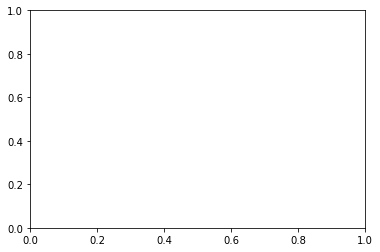

In [51]:
results = results_dict[f'{bc_str}_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}']
for N in N_list:
    number = 4*N
    result_list = (results[N-1][0])
    print(np.array(result_list)/ number)
    plt.plot([N,N,N,N], result_list, 'o')

In [ ]:
results = results_dict[f'{bc_str}_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}']
for N in N_list:
    number = 4*N
    result_array = np.array(results[N-1][0])
    relative_energies = result_array - np.min(result_array)
    print(relative_energies)
    plt.plot([N,N,N,N], relative_energies, 'o')

In [56]:
results_dict

{'PBC_Jx_1.0_Jy_1.0_Jz_1.0': [([-4.47213595499958,
    -2.0,
    -2.0,
    -1.9999999999999996],
    <tenpy.networks.mps.MPS at 0x7f9c97d58f90>]),
  ([-6.928203230275512,
    -6.472135954999581,
    -6.472135954999574,
    -6.47213595499958],
    <tenpy.networks.mps.MPS at 0x7f9c97f3bf90>]),
  ([-10.128990204491958,
    -9.999999999999998,
    -9.529886412257504,
    -9.529886412257506],
    <tenpy.networks.mps.MPS at 0x7f9c97ed6590>]),
  ([-13.4411324654609,
    -13.400339185275067,
    -12.792931716507024,
    -12.792931782963429],
    <tenpy.networks.mps.MPS at 0x7f9c97f8d0d0>]),
  ([-16.782870103700553,
    -16.76929224070585,
    -16.117528749274683,
    -16.11752874912562],
    <tenpy.networks.mps.MPS at 0x7f9c97634710>]),
  ([-20.133644221361827,
    -20.12899020449204,
    -19.46221291427074,
    -19.45067887597415],
    <tenpy.networks.mps.MPS at 0x7f9c975d2910>]),
  ([-23.487352253967362,
    -23.485726298733116,
    -22.813730238005032,
    -22.8137303650569],
    <tenpy.net

In [ ]:
import pickle
# dict = {'Python' : '.py', 'C++' : '.cpp', 'Java' : '.java'}
f = open("DegeneracyData.pkl","wb")
pickle.dump(results_dict,f)
f.close()

In [4]:
import pickle
f = open("DegeneracyData.pkl","rb")
dictfrompickle = pickle.load(f)

In [5]:
dictfrompickle.keys()

dict_keys(['PBC_Jx_1.0_Jy_1.0_Jz_1.0', 'PBC_Jx_1.75_Jy_0.25_Jz_1.0', 'OBC_Jx_1.75_Jy_0.25_Jz_1.0'])

In [6]:
x_lim_OBC = dictfrompickle['OBC_Jx_1.75_Jy_0.25_Jz_1.0']

In [10]:
four_psi = x_lim_OBC[-1][1][:4]

In [21]:
for psi in four_psi:
    print('The number of spins: ', psi.L)
    total_4N = psi.L
    N2 = psi.L//2
    for n in range(N2):
        D_term_list = [('Sigmax', 2*n % total_4N), ('Sigmay', (2*n+1) % total_4N), ('Sigmay', (2*n+2) % total_4N), ('Sigmax', (2*n+3) % total_4N)]
        print(f'The D_{n+1} = ', np.round(psi.expectation_value_term(D_term_list), decimals=3))

The number of spins:  80
The D_1 =  1.0
The D_2 =  1.0
The D_3 =  1.0
The D_4 =  1.0
The D_5 =  1.0
The D_6 =  1.0
The D_7 =  1.0
The D_8 =  1.0
The D_9 =  1.0
The D_10 =  1.0
The D_11 =  1.0
The D_12 =  1.0
The D_13 =  1.0
The D_14 =  1.0
The D_15 =  1.0
The D_16 =  1.0
The D_17 =  1.0
The D_18 =  1.0
The D_19 =  1.0
The D_20 =  1.0
The D_21 =  1.0
The D_22 =  1.0
The D_23 =  1.0
The D_24 =  1.0
The D_25 =  1.0
The D_26 =  1.0
The D_27 =  1.0
The D_28 =  1.0
The D_29 =  1.0
The D_30 =  1.0
The D_31 =  1.0
The D_32 =  1.0
The D_33 =  1.0
The D_34 =  1.0
The D_35 =  1.0
The D_36 =  1.0
The D_37 =  1.0
The D_38 =  1.0
The D_39 =  1.0
The D_40 =  0.999
The number of spins:  80
The D_1 =  1.0
The D_2 =  1.0
The D_3 =  1.0
The D_4 =  1.0
The D_5 =  1.0
The D_6 =  1.0
The D_7 =  1.0
The D_8 =  1.0
The D_9 =  1.0
The D_10 =  1.0
The D_11 =  1.0
The D_12 =  1.0
The D_13 =  1.0
The D_14 =  1.0
The D_15 =  1.0
The D_16 =  1.0
The D_17 =  1.0
The D_18 =  1.0
The D_19 =  1.0
The D_20 =  1.0
The D_

In [15]:
N_list = list(range(1, 21))
low_lying_e_list = [np.sort(data[0]) for data in x_lim_OBC]

In [18]:
relative_low_lying_e_list = [e_list - np.min(e_list) for e_list in low_lying_e_list]

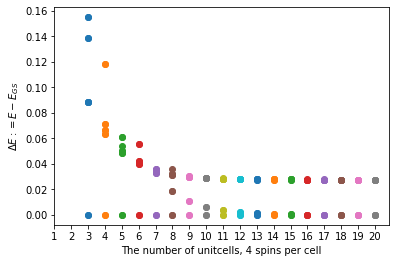

In [24]:
for i in range(2, len(N_list)):
    N = N_list[i]
    relative_e_list = relative_low_lying_e_list[i]
    x_list = [N for i in range(len(relative_e_list))]
    plt.plot(x_list, relative_e_list, 'o')
    
# set the plot details
plt.xticks(N_list)
plt.xlabel('The number of unitcells, 4 spins per cell')
plt.ylabel(r'$\Delta E := E-E_{GS}$')
plt.show()

In [25]:
relative_low_lying_e_list[-1]

array([0.00000000e+00, 6.43120757e-09, 2.54190844e-05, 2.54254745e-05,
       2.73613698e-02, 2.73615104e-02, 2.73767985e-02, 2.73768338e-02,
       2.74122823e-02, 2.75056748e-02])

Utilize the script `Majorana` to calculate the analytic results!

In [26]:
from Majorana import get_Majorana_spectrum

In [47]:
N = 20
spec = get_Majorana_spectrum(Jx=Jx, Jy=Jy, Jz=Jz,N=N,SigmaY=1,D_list=[1 for i in range(2*N)], bc='open')

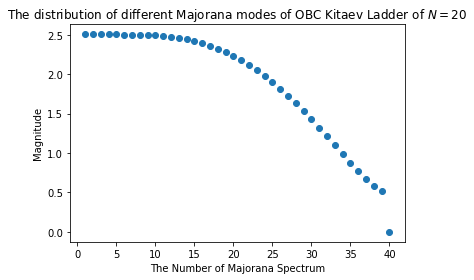

In [43]:
# plt.plot(spec, 'o')
x_list = np.arange(2*N)+1
plt.plot(x_list, -spec, 'o')
plt.xlabel('The Number of Majorana Spectrum')
plt.ylabel('Magnitude')
plt.title(fr'The distribution of different Majorana modes of OBC Kitaev Ladder of $N={N}$')
plt.show()

Here apparently there is a Majorana zero mode, corresponding to the eigenvalue near `0` in the end, for the OBC Kitaev ladder with unitcells `N=20` (`80` spins in total).

### The energies given by fDMRG

In [33]:
x_lim_OBC[-1]

([-75.31826974658553,
  -75.31826975301674,
  -75.31824433393234,
  -75.31824432754222,
  -75.29076407822888,
  -75.2909082425916,
  -75.29090838318076,
  -75.2908574707103,
  -75.2908929192583,
  -75.29089295447957],
  <tenpy.networks.mps.MPS at 0x7f09cecda450>])

### The energies given by the analytic method

In [4]:
from Majorana import get_Majorana_spectrum

In [7]:
N = 20
D_list=[1 for i in range(2*N)]
spec = get_Majorana_spectrum(Jx=Jx, Jy=Jy, Jz=Jz,N=N,SigmaY=1,D_list=D_list, bc='open')
print('The GS energy, deg=2')
print(np.sum(spec))

# the first excited state will be given by 'exciting' the Majorana mode with the smallest energy in magnitude
# here in the output the values are all negative so simply substrating the maximum value gives the result of our interest
print('The 1st ES energy, deg=2')
print(np.sum(spec) - 2*np.max(spec))


The GS energy, deg=2
-75.31826975302204
The 1st ES energy, deg=2
-75.31824432753679


There should be many `1-particle` excitations.
Let's have a look at them.

In [54]:
GS_energy = np.sum(spec)
for mode in spec[::-1]:
    print(f'mode = {mode}')
    print(f'\tEnergy: {GS_energy - 2*mode}\n')

mode = -1.2712742621159112e-05
	Energy: -75.31824432753679

mode = -0.5222978446293361
	Energy: -74.27367406376337

mode = -0.5826876354770205
	Energy: -74.15289448206799

mode = -0.6683696555327986
	Energy: -73.98153044195644

mode = -0.7686891681567043
	Energy: -73.78089141670863

mode = -0.8768072533978111
	Energy: -73.56465524622641

mode = -0.9885469742457672
	Energy: -73.34117580453051

mode = -1.1012723030396714
	Energy: -73.1157251469427

mode = -1.2132201156664155
	Energy: -72.8918295216892

mode = -1.3231389225474657
	Energy: -72.67199190792711

mode = -1.4300942102638377
	Energy: -72.45808133249436

mode = -1.5333610420478951
	Energy: -72.25154766892625

mode = -1.6323630099182789
	Energy: -72.05354373318548

mode = -1.7266365365648353
	Energy: -71.86499667989237

mode = -1.8158094835844132
	Energy: -71.6866507858532

mode = -1.8995880643251135
	Energy: -71.5190936243718

mode = -1.977748682098427
	Energy: -71.36277238882518

mode = -2.05013272209067
	Energy: -71.21800430884

So apparently, the `D=1` branch corresponds to the degenerate ground states.
And any fermionic excitation will cause a rather huge energy gap.

To find the value corresponding to the results given by fDMRG, we need to take another `D`.

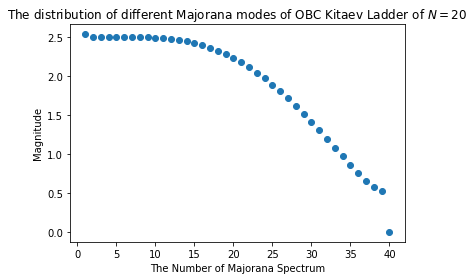

D_list =  [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
GS E =  -75.23133113052941


mode = -7.254281295198294e-06
	Energy: -75.23131662196683

mode = -0.5206199244875456
	Energy: -74.19009128155432

mode = -0.5771630176081893
	Energy: -74.07700509531303

mode = -0.6587545697278049
	Energy: -73.9138219910738

mode = -0.7557847332483972
	Energy: -73.71976166403262

mode = -0.861691158538264
	Energy: -73.50794881345288

mode = -0.9722383764498529
	Energy: -73.28685437762971

mode = -1.084628741802889
	Energy: -73.06207364692364

mode = -1.1969247601668
	Energy: -72.83748161019581

mode = -1.3077172795948633
	Energy: -72.61589657133969

mode = -1.4159373743513404
	Energy: -72.39945638182674

mode = -1.5207477056351153
	Energy: -72.18983571925918

mode = -1.621478164795741
	Energy: -71.98837480093793

mode = -1.7175868118790587
	Energy: -71.7961575067713

mode = -1.8086356671353767
	Energy: -71.61405979625866

mode

In [72]:
Jx = 1.75
Jy = 0.25
Jz = 1.0

N = 20
D_list = [1 for i in range(2*N)]

SigmaY = 1

bc = 'open'

# change the value of D_1, i.e. D_list[0]
D_list[0] *= -1

spec = get_Majorana_spectrum(Jx=Jx, Jy=Jy, Jz=Jz,N=N,SigmaY=1,D_list=D_list, bc='open')

# Plot the distri
x_list = np.arange(2*N)+1
plt.plot(x_list, -spec, 'o')
plt.xlabel('The Number of Majorana Spectrum')
plt.ylabel('Magnitude')
plt.title(fr'The distribution of different Majorana modes of OBC Kitaev Ladder of $N={N}$')
plt.show()

# consider the GS and the 1-particle states
GS_energy = np.sum(spec)
print("D_list = ", D_list)
print("GS E = ", GS_energy)
print("\n")
for mode in spec[::-1]:
    print(f'mode = {mode}')
    print(f'\tEnergy: {GS_energy - 2*mode}\n')

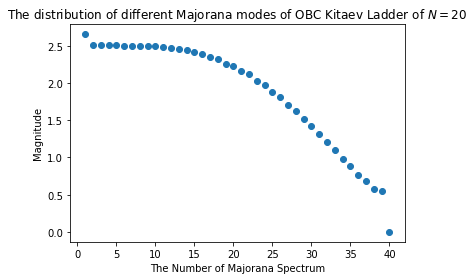

D_list =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
GS E =  -75.29096979927279


mode = -7.666119747860522e-06
	Energy: -75.29095446703329

mode = -0.5436463889601986
	Energy: -74.20367702135239

mode = -0.579058557465093
	Energy: -74.1328526843426

mode = -0.6870018771129486
	Energy: -73.91696604504689

mode = -0.7602160895948658
	Energy: -73.77053762008306

mode = -0.8865643879867978
	Energy: -73.5178410232992

mode = -0.9776330651157239
	Energy: -73.33570366904134

mode = -1.102333512196696
	Energy: -73.0863027748794

mode = -1.202016732208792
	Energy: -72.8869363348552

mode = -1.3164202030915662
	Energy: -72.65812939308965

mode = -1.4201079994012518
	Energy: -72.45075380047028

mode = -1.5200902667847933
	Energy: -72.2507892657032

mode = -1.6245336205792542
	Energy: -72.04190255811427

mode = -1.708327386269304
	Energy: -71.87431502673418

mode = -1.8105811670919727
	Energy: -71.66980746508884

mode 

In [71]:
Jx = 1.75
Jy = 0.25
Jz = 1.0

N = 20
D_list = [1 for i in range(2*N)]

SigmaY = 1

bc = 'open'

# change the value of D_1, i.e. D_list[0]
D_list[N] *= -1

spec = get_Majorana_spectrum(Jx=Jx, Jy=Jy, Jz=Jz,N=N,SigmaY=1,D_list=D_list, bc='open')

# Plot the distri
x_list = np.arange(2*N)+1
plt.plot(x_list, -spec, 'o')
plt.xlabel('The Number of Majorana Spectrum')
plt.ylabel('Magnitude')
plt.title(fr'The distribution of different Majorana modes of OBC Kitaev Ladder of $N={N}$')
plt.show()

# consider the GS and the 1-particle states
GS_energy = np.sum(spec)
print("D_list = ", D_list)
print("GS E = ", GS_energy)
print("\n")
for mode in spec[::-1]:
    print(f'mode = {mode}')
    print(f'\tEnergy: {GS_energy - 2*mode}\n')

Try a longer Kitaev ladder

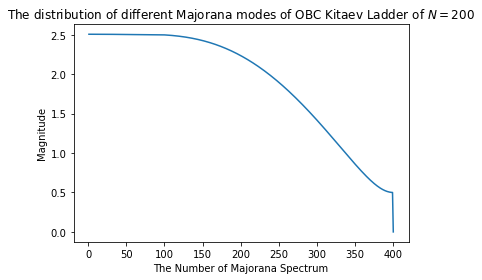

In [73]:
N = 200
spec = get_Majorana_spectrum(Jx=Jx, Jy=Jy, Jz=Jz,N=N,SigmaY=1,D_list=[1 for i in range(2*N)], bc='open')
# plt.plot(spec, 'o')
x_list = np.arange(2*N)+1
plt.plot(
    x_list, 
    -spec, 
#     'o',
)
plt.xlabel('The Number of Majorana Spectrum')
plt.ylabel('Magnitude')
plt.title(fr'The distribution of different Majorana modes of OBC Kitaev Ladder of $N={N}$')
plt.show()

In [45]:
spec[-1]

-3.9968028886505635e-15

In [46]:
spec[-2]

-0.5002030869346263

Let's have a look at the `Z`-phase

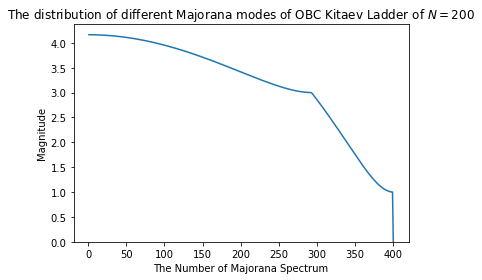

In [68]:
N = 200
Jx = 3
Jy = 1
Jz = 1
spec = get_Majorana_spectrum(Jx=Jx, Jy=Jy, Jz=Jz,N=N,SigmaY=1,D_list=[1 for i in range(2*N)], bc='open')
# plt.plot(spec, 'o')
x_list = np.arange(2*N)+1
plt.plot(x_list, -spec)
plt.xlabel('The Number of Majorana Spectrum')
plt.ylabel('Magnitude')
plt.ylim(bottom=0)
plt.title(fr'The distribution of different Majorana modes of OBC Kitaev Ladder of $N={N}$')
plt.show()